Importamos aquellas librerías que vamos a necesitar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import joypy

Cargamos los ficheros

In [2]:
# Dataset con contenido potencialmente lgtbiq+fobico
file_path_orgullo = 'colectivo.csv'
# Dataset con contenido aleatorio
file_path_aleatorio = 'aleatorio.csv'

# cargamos ambos ficheros
df_aleatorio = pd.read_csv(file_path_aleatorio)
df_orgullo = pd.read_csv(file_path_orgullo)

Modificamos el formato de la fecha para que nos sea más sencillo el estudio temporal

In [3]:
# Convertir la columna 'createdAt' a tipo datetime
df_orgullo['createdAt'] = pd.to_datetime(df_orgullo['createdAt'], errors='coerce')
df_aleatorio['createdAt'] = pd.to_datetime(df_aleatorio['createdAt'], errors='coerce')

# Crear una columna 'year' a partir de la columna 'createdAt'
df_orgullo['year'] = df_orgullo['createdAt'].dt.year
df_aleatorio['year'] = df_aleatorio['createdAt'].dt.year

C:\Users\mar\AppData\Local\Temp\ipykernel_3544\2928859594.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orgullo['createdAt'] = pd.to_datetime(df_orgullo['createdAt'], errors='coerce')
C:\Users\mar\AppData\Local\Temp\ipykernel_3544\2928859594.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_aleatorio['createdAt'] = pd.to_datetime(df_aleatorio['createdAt'], errors='coerce')


In [4]:
# Agrupar los tuits por día y obtener las distribuciones de toxicidad
distribuciones_toxicidad = [df_orgullo[df_orgullo['year'] == year]['toxicity'].values for year in df_orgullo['year'].unique()]
distribuciones_muytoxicidad = [df_orgullo[df_orgullo['year'] == year]['severe_toxicity'].values for year in df_orgullo['year'].unique()]

distribucion

<Figure size 1000x800 with 0 Axes>

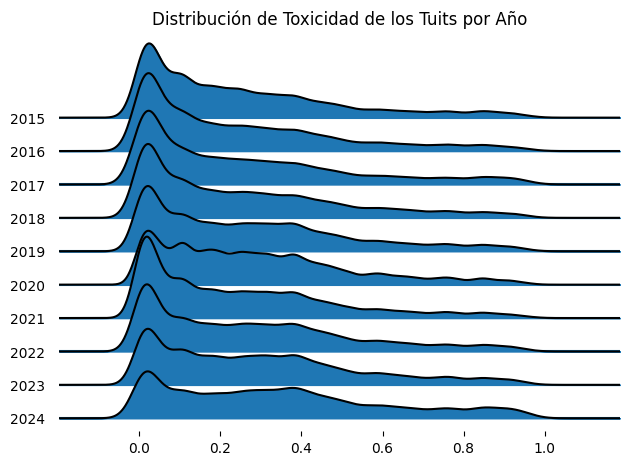

In [5]:
# Crear el gráfico de distribuciones superpuestas con JoyPy
plt.figure(figsize=(10, 8))  # Tamaño 
joypy.joyplot(distribuciones_toxicidad, 
        labels=[str(year) for year in df_orgullo['year'].unique()],  # Etiquetas de los días
        title="Distribución de Toxicidad de los Tuits por Año")  # Título del gráfico

# Mostrar el gráfico
plt.show()

<Figure size 1000x800 with 0 Axes>

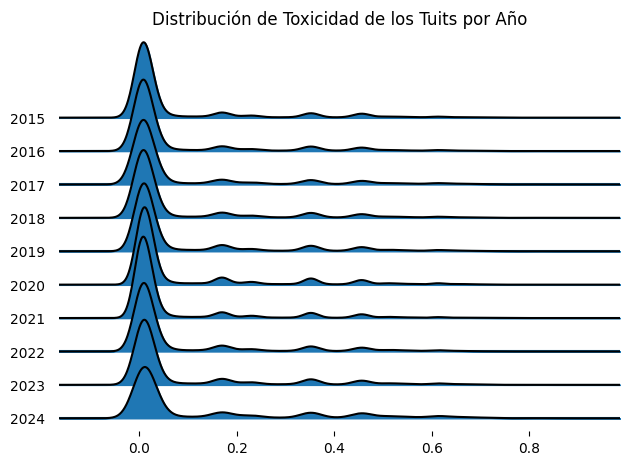

In [6]:
# Crear el gráfico de distribuciones superpuestas con JoyPy
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
joypy.joyplot(distribuciones_muytoxicidad, 
        labels=[str(year) for year in df_orgullo['year'].unique()],  # Etiquetas de los días
        title="Distribución de Toxicidad de los Tuits por Año")  # Título del gráfico

# Mostrar el gráfico
plt.show()

boxplot

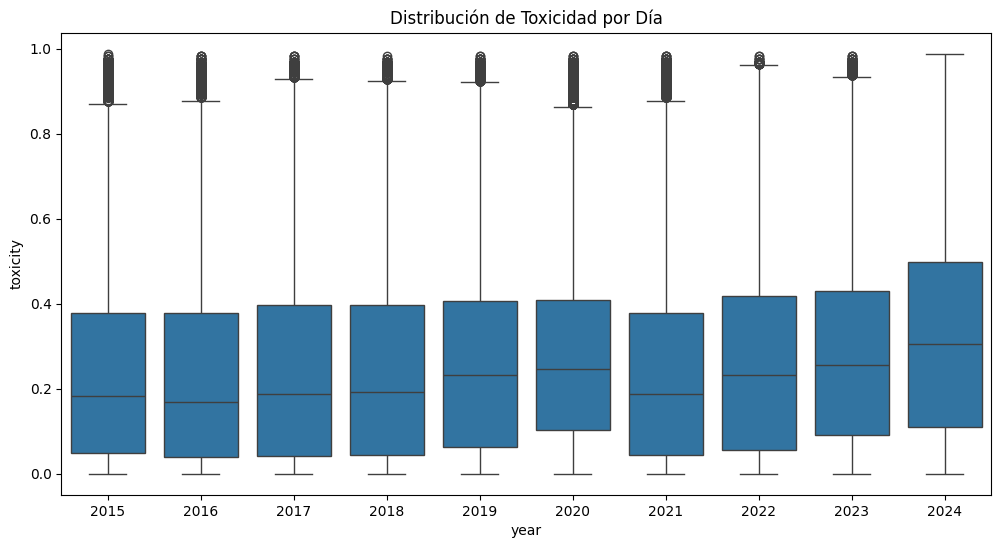

In [7]:
# Crear un boxplot para la toxicidad por día
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='toxicity', data=df_orgullo)
plt.title('Distribución de Toxicidad por Día')
plt.xticks(rotation=0)
plt.show()

violin

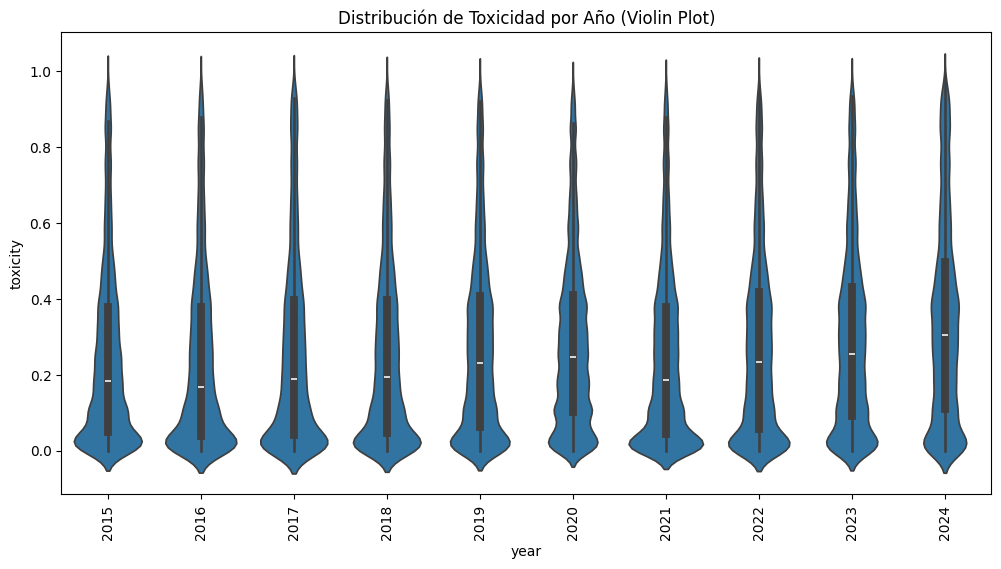

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='toxicity', data=df_orgullo)
plt.title('Distribución de Toxicidad por Año (Violin Plot)')
plt.xticks(rotation=90)  
plt.show()

historigrama: Un histograma te permite ver la distribución de las puntuaciones de toxicidad, mostrando la frecuencia con la que ocurren diferentes rangos de puntuación.

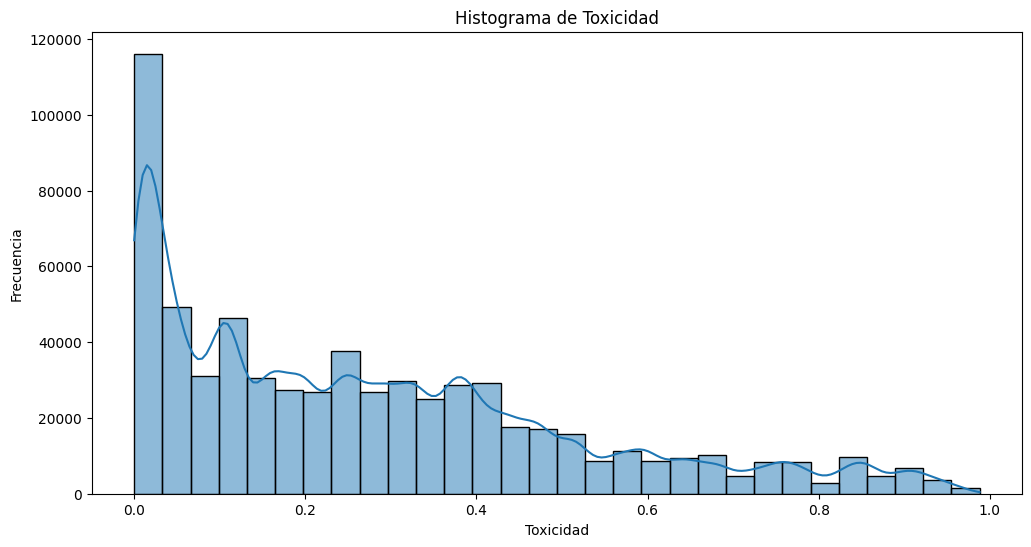

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_orgullo['toxicity'], kde=True, bins=30)
plt.title('Histograma de Toxicidad')
plt.xlabel('Toxicidad')
plt.ylabel('Frecuencia')
plt.show()

En primer lugar observamos la cantidad de tuits para cada uno de los datasets a lo largo de los años

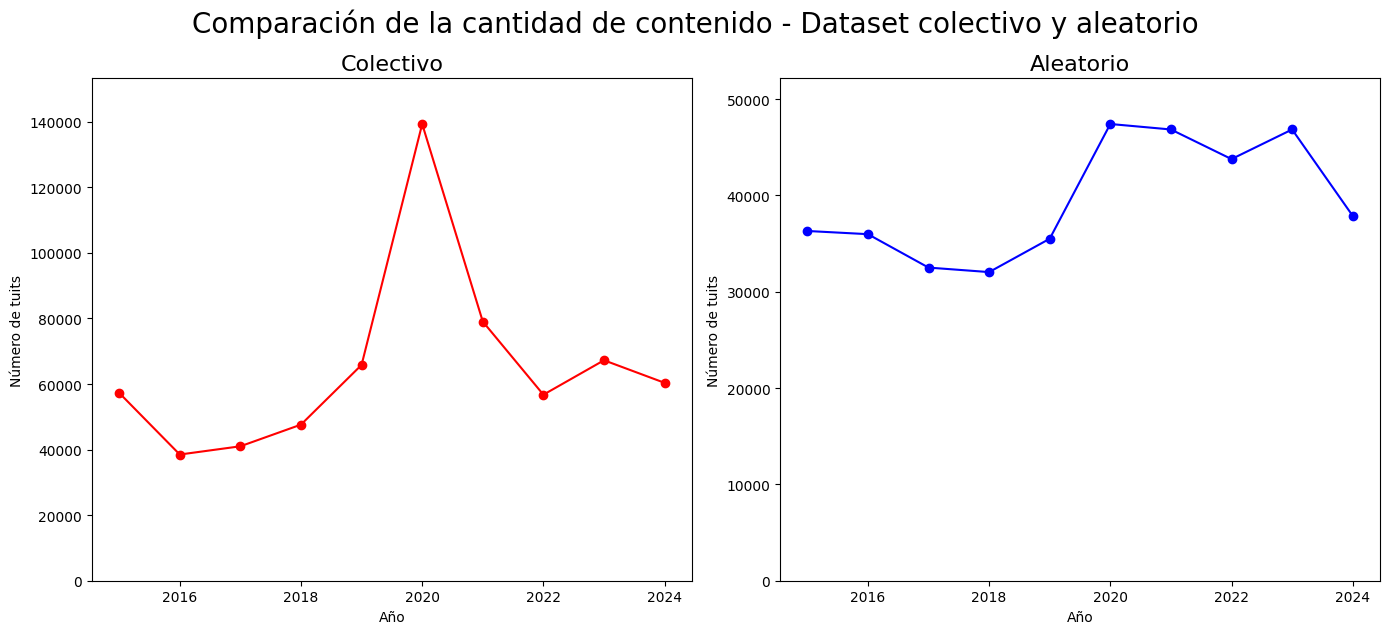

In [10]:
tuits_per_year_orgullo = df_orgullo.groupby('year').size()
tuits_per_year_aleatorio = df_aleatorio.groupby('year').size()

# Crear una figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de df_orgullo (primer gráfico)
ax[0].plot(tuits_per_year_orgullo, marker='o', color='r')
ax[0].set_title("Colectivo", fontsize=16)
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de tuits")
ax[0].set_ylim(0, tuits_per_year_orgullo.max() * 1.1)  # Establecer el rango del eje Y

# Gráfico de df_aleatorio (segundo gráfico)
ax[1].plot(tuits_per_year_aleatorio, marker='o', color='b')
ax[1].set_title("Aleatorio", fontsize=16)
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de tuits")
ax[1].set_ylim(0, tuits_per_year_aleatorio.max() * 1.1)  # Establecer el rango del eje Y

# Ajustar el diseño y agregar un título general
plt.tight_layout()
plt.suptitle("Comparación de la cantidad de contenido - Dataset colectivo y aleatorio", fontsize=20, y=1.05)
plt.show()

## Tuits en contra del colectivo
Vamos a estudiar la cantidad de tuits que cumplen los distintos atributos (valor > 0.7) para cada año 

In [11]:
toxicity_threshold = 0.7

In [12]:
# Lista de columnas a verificar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Diccionario para almacenar los dataframes filtrados
df_filtered = {col: df_orgullo[df_orgullo[col] > toxicity_threshold] for col in toxicity_columns}

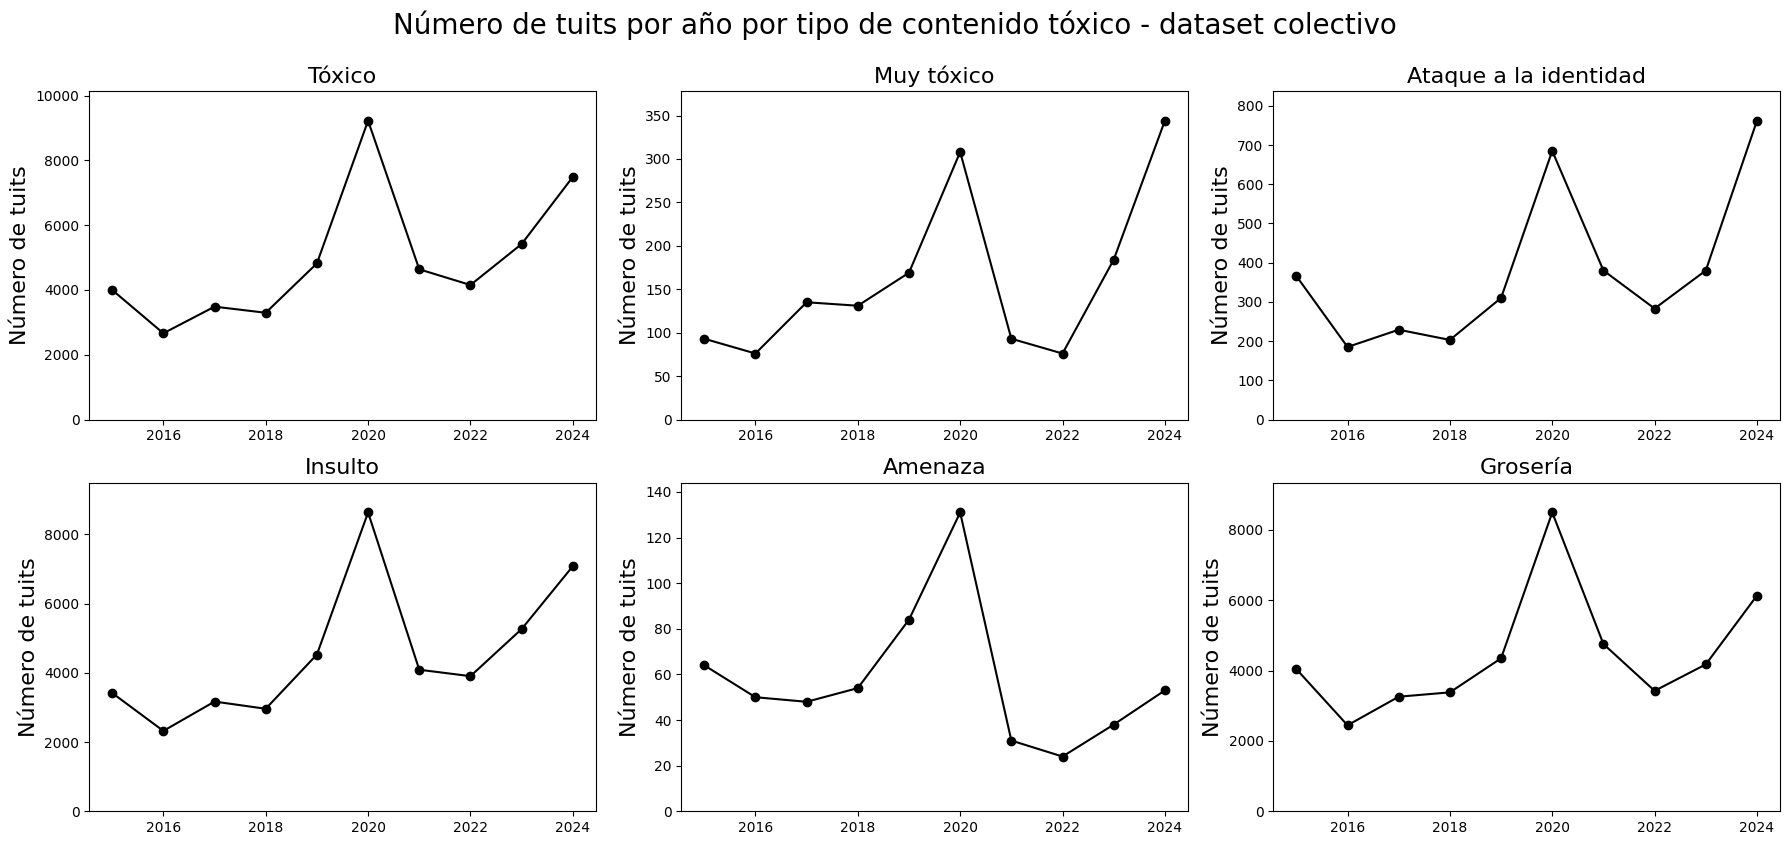

In [13]:
# Crear el diccionario con las proporciones de tuits por año
# Podríamos hacerlo directamente en el bucle de abajo, pero así queda más limpio
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Número de tuits por año por tipo de contenido tóxico - dataset colectivo", fontsize=20, y=1.05)
plt.show()

In [14]:
# Agrupar los tuits por día y obtener las distribuciones de toxicidad
distribuciones_toxicidad = [df_filtered['toxicity'][df_filtered['toxicity']['year'] == year]['toxicity'].values for year in df_filtered['toxicity']['year'].unique()]
distribuciones_muytoxicidad = [df_filtered['severe_toxicity'][df_orgullo['year'] == year]['severe_toxicity'].values for year in df_filtered['severe_toxicity']['year'].unique()]

C:\Users\mar\AppData\Local\Temp\ipykernel_3544\3175650505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distribuciones_muytoxicidad = [df_filtered['severe_toxicity'][df_orgullo['year'] == year]['severe_toxicity'].values for year in df_filtered['severe_toxicity']['year'].unique()]
C:\Users\mar\AppData\Local\Temp\ipykernel_3544\3175650505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distribuciones_muytoxicidad = [df_filtered['severe_toxicity'][df_orgullo['year'] == year]['severe_toxicity'].values for year in df_filtered['severe_toxicity']['year'].unique()]
C:\Users\mar\AppData\Local\Temp\ipykernel_3544\3175650505.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distribuciones_muytoxicidad = [df_filtered['severe_toxicity'][df_orgullo['year'] == year]['severe_toxicity'].values for year in df_filtered['severe_toxicity']['year'].unique()]
C:\Users\mar\AppData\Local\Temp\ipykernel_3

<Figure size 1000x800 with 0 Axes>

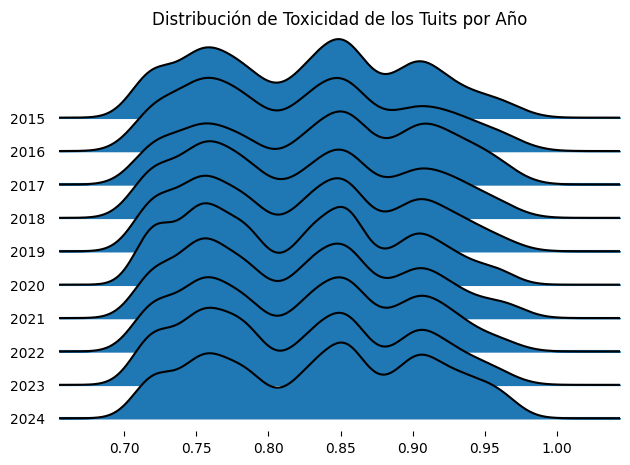

In [15]:
# Crear el gráfico de distribuciones superpuestas con JoyPy
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
joypy.joyplot(distribuciones_toxicidad, 
        labels=[str(year) for year in df_orgullo['year'].unique()],  # Etiquetas de los días
        title="Distribución de Toxicidad de los Tuits por Año")  # Título del gráfico

# Mostrar el gráfico
plt.show()

<Figure size 1000x800 with 0 Axes>

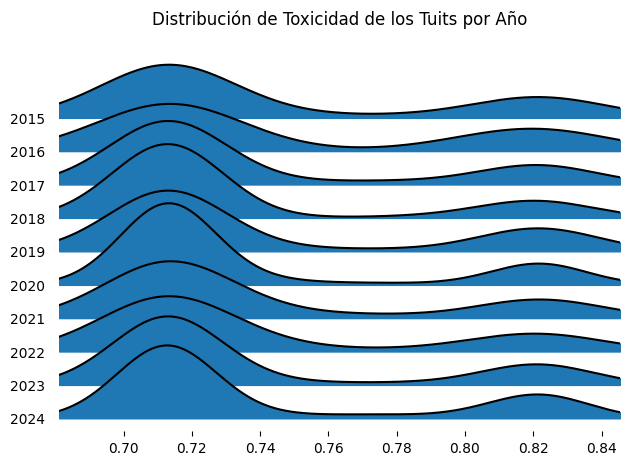

In [16]:
# Crear el gráfico de distribuciones superpuestas con JoyPy
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
joypy.joyplot(distribuciones_muytoxicidad, 
        labels=[str(year) for year in df_orgullo['year'].unique()],  # Etiquetas de los días
        title="Distribución de Toxicidad de los Tuits por Año")  # Título del gráfico

# Mostrar el gráfico
plt.show()

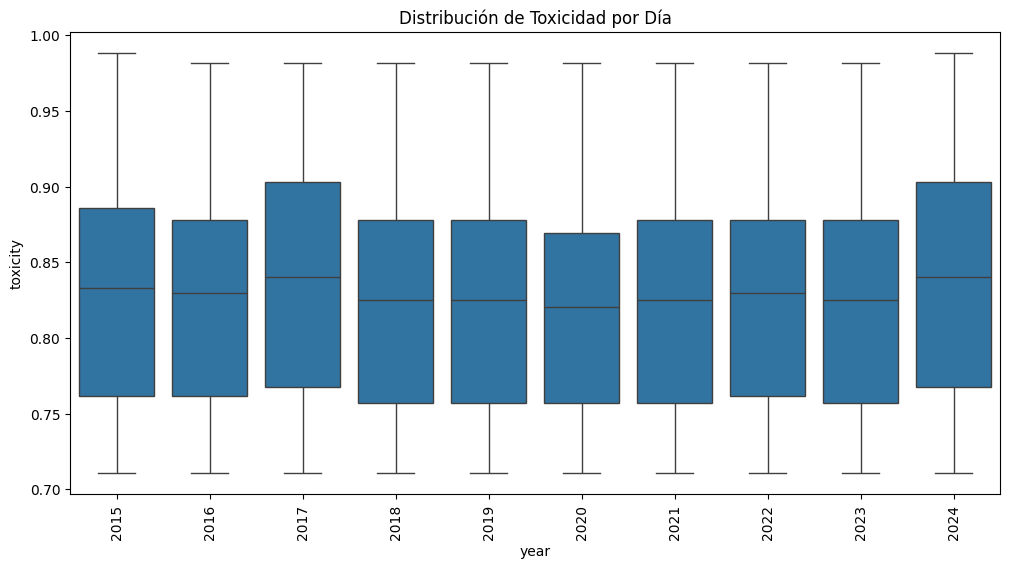

In [17]:
# Crear un boxplot para la toxicidad por día
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='toxicity', data=df_filtered['toxicity'])
plt.title('Distribución de Toxicidad por Día')
plt.xticks(rotation=90)  # Rotar etiquetas si las fechas son muchas
plt.show()

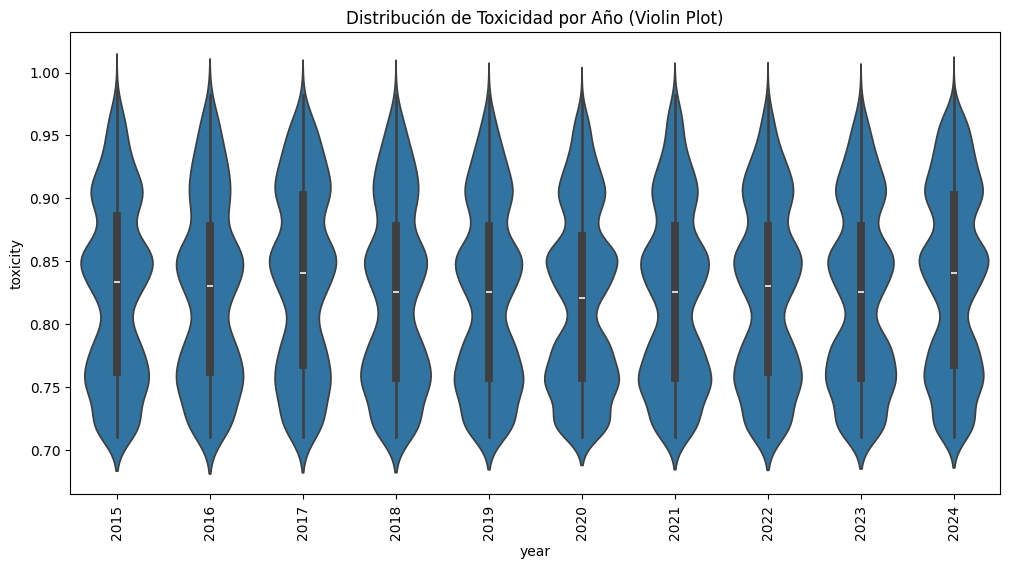

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='toxicity', data=df_filtered['toxicity'])
plt.title('Distribución de Toxicidad por Año (Violin Plot)')
plt.xticks(rotation=90)  # Rotar etiquetas si las fechas son muchas
plt.show()

contenido aleatorio

In [19]:
# Diccionario para almacenar los dataframes filtrados
df_filtered_aleatorio = {col: df_aleatorio[df_aleatorio[col] > toxicity_threshold] for col in toxicity_columns}

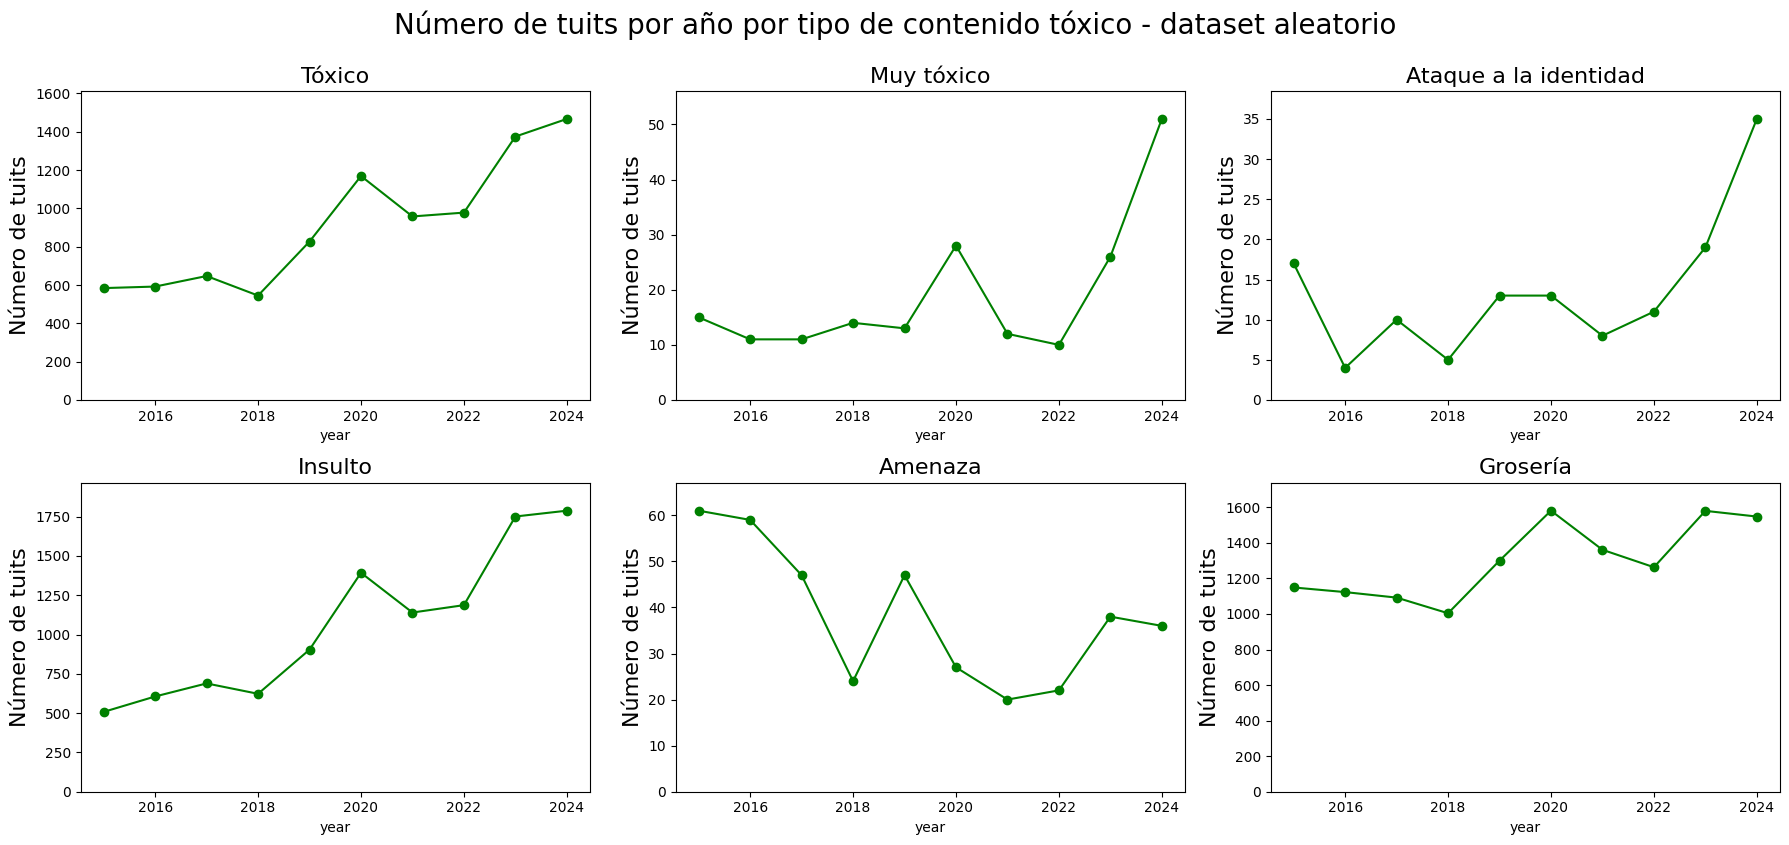

In [20]:
# Crear el diccionario con las proporciones de tuits por año
# Podríamos hacerlo directamente en el bucle de abajo, pero así queda más limpio
tuits_per_year_aleatorio = {
    key: df.groupby('year').size()
    for key, df in df_filtered_aleatorio.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_aleatorio.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='green')
    plt.title(titles[i], fontsize=16)
    #plt.xlabel("Año", fontsize=16)
    plt.ylabel("Número de tuits",fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Número de tuits por año por tipo de contenido tóxico - dataset aleatorio", fontsize=20, y=1.05)
plt.show()

## Tuits a favor del colectivo
Vamos a estudiar la cantidad de tuits que cumplen los distintos atributos (valor > 0.7) para cada año 

In [21]:
not_toxicity_threshold = 0.05

# Diccionario para almacenar los dataframes filtrados
df_filtered_apoyo = {col: df_orgullo[df_orgullo[col] < not_toxicity_threshold] for col in toxicity_columns}

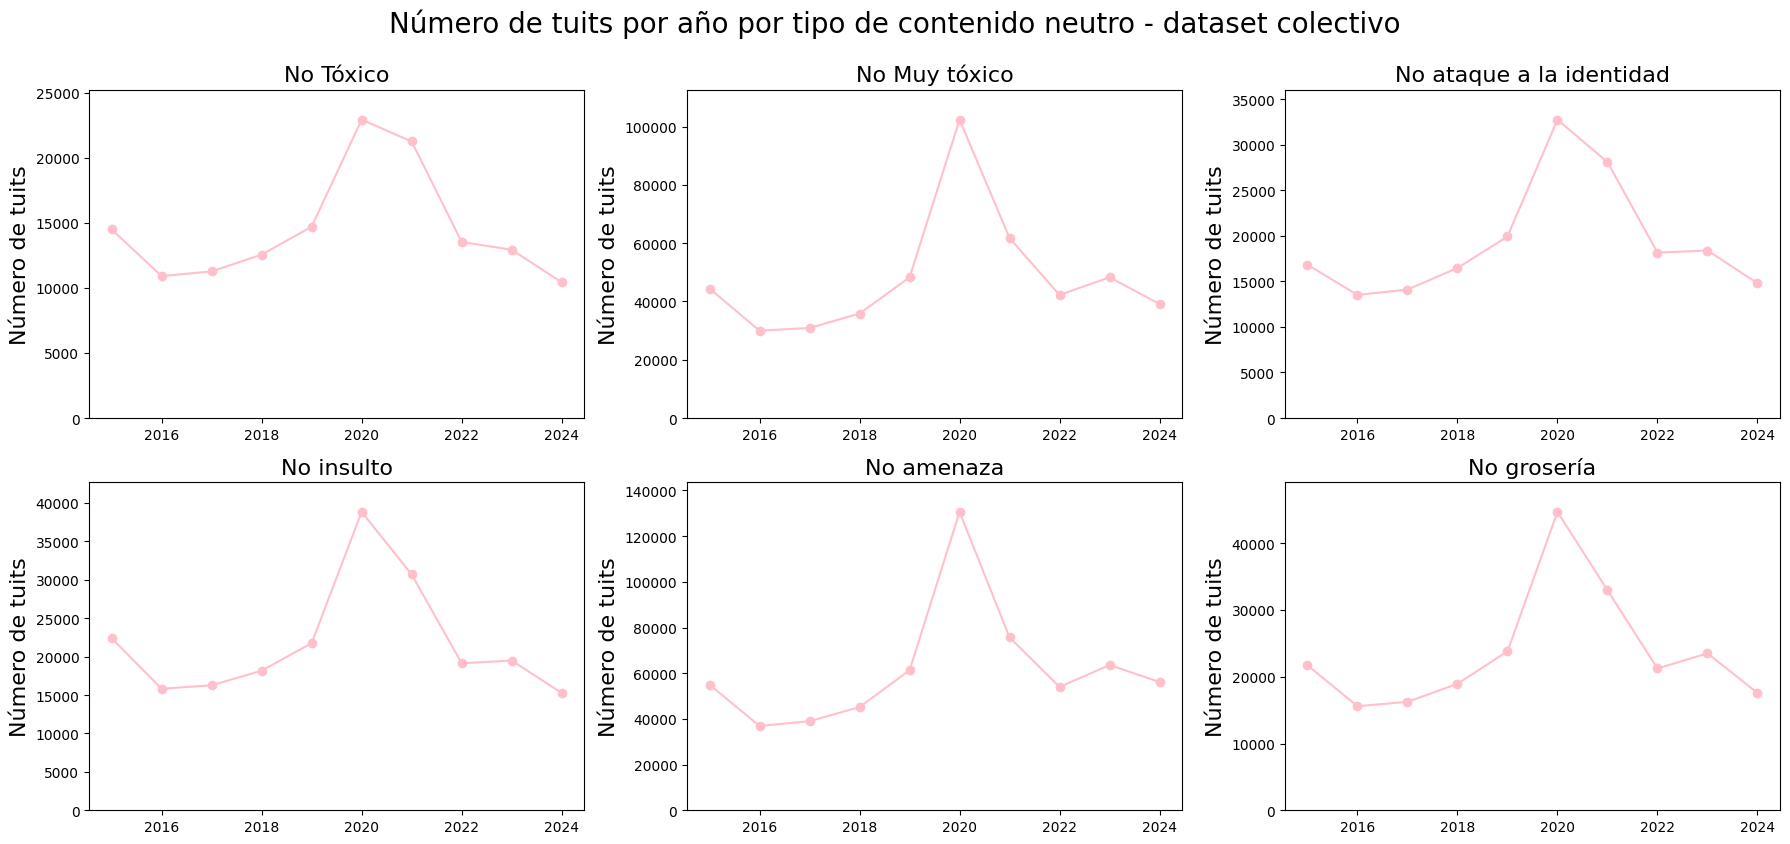

In [22]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

# Títulos de los gráficos
titles = [
    "No Tóxico",
    "No Muy tóxico",
    "No ataque a la identidad",
    "No insulto",
    "No amenaza",
    "No grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

plt.suptitle("Número de tuits por año por tipo de contenido neutro - dataset colectivo", fontsize=20, y=1.05)
# Mostrar el gráfico
plt.show()

Vamos a ver ahora los no tóxicos del dataset aleatorio

In [23]:
not_toxicity_threshold = 0.1

# Diccionario para almacenar los dataframes filtrados
df_filtered_e_notox = {col: df_aleatorio[df_aleatorio[col] < not_toxicity_threshold] for col in toxicity_columns}

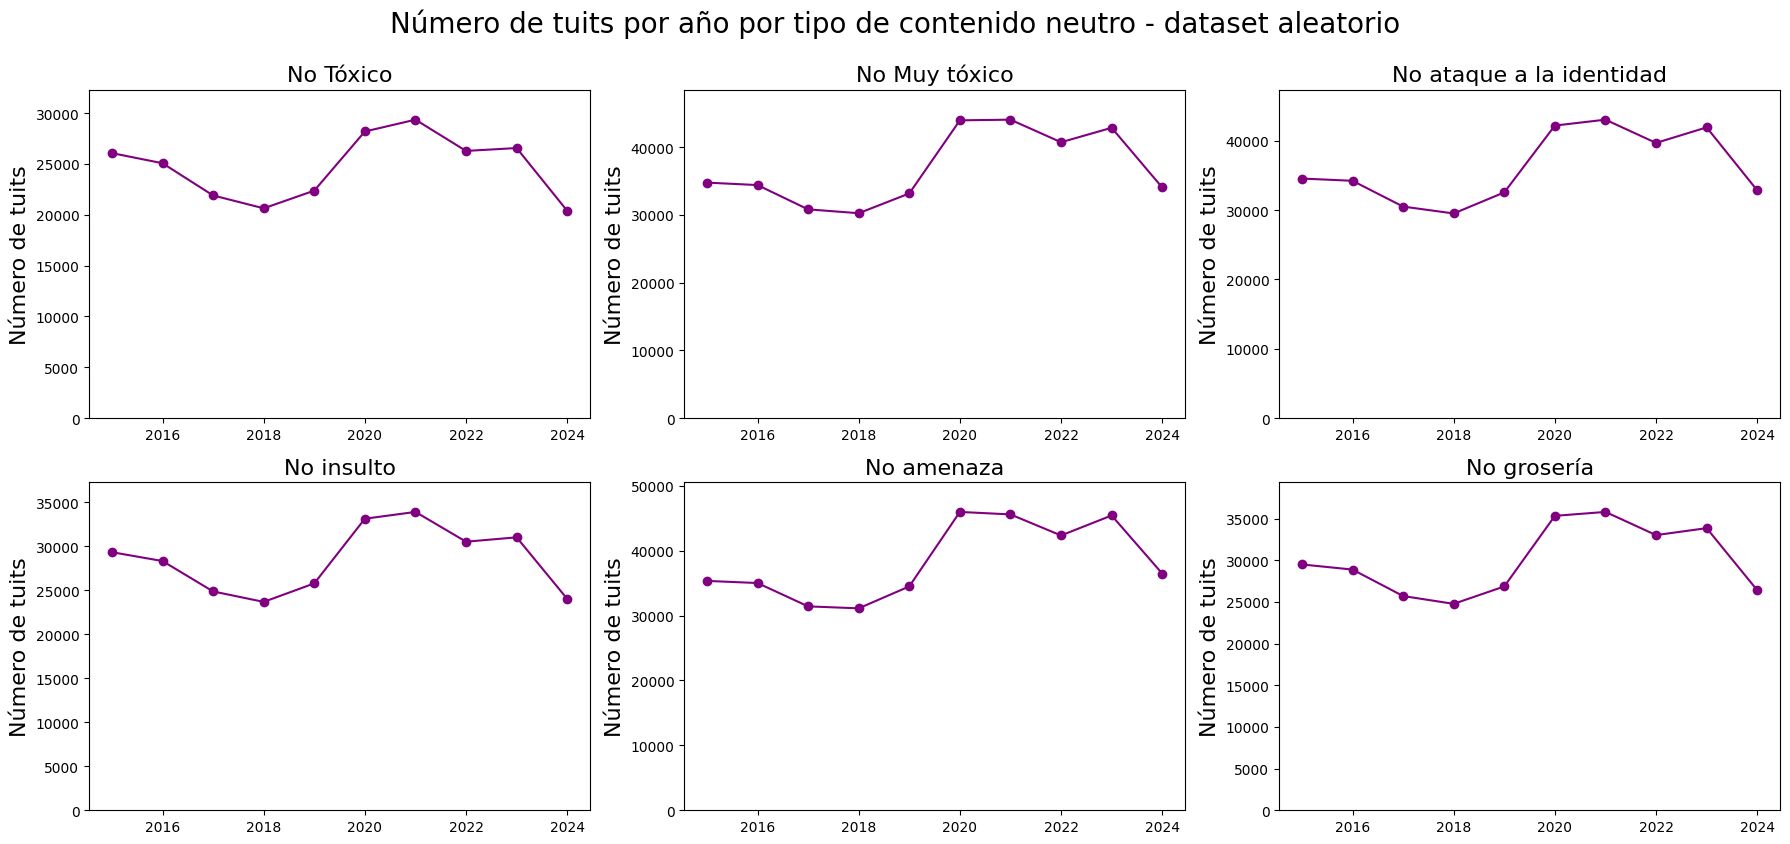

In [24]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "No Tóxico",
    "No Muy tóxico",
    "No ataque a la identidad",
    "No insulto",
    "No amenaza",
    "No grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='purple')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

plt.suptitle("Número de tuits por año por tipo de contenido neutro - dataset aleatorio", fontsize=20, y=1.05)
# Mostrar el gráfico
plt.show()

In [25]:
media = df_orgullo['toxicity'].mean()

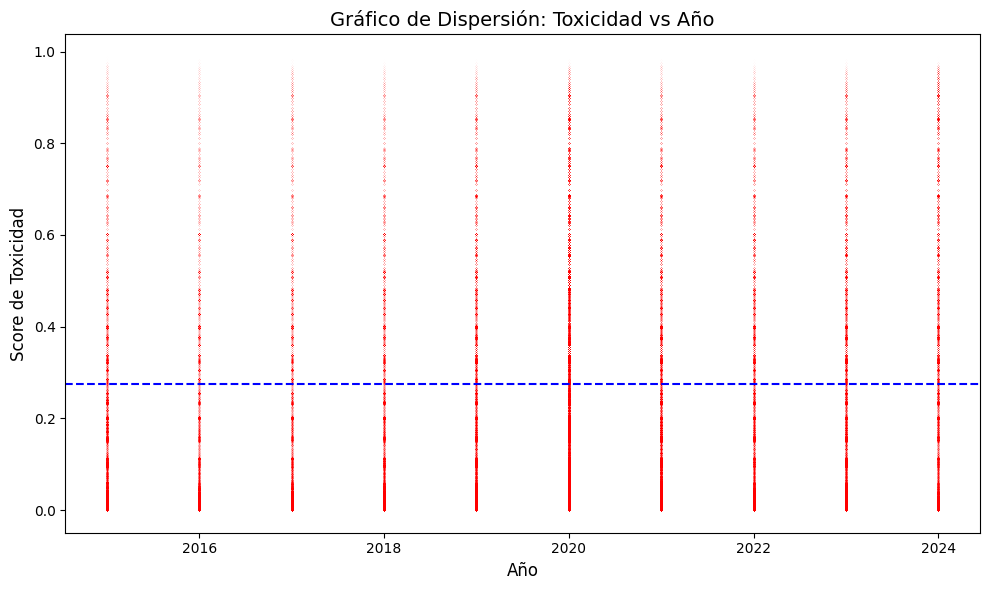

In [26]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_orgullo['year'], df_orgullo['toxicity'], color='red', s=0.000004, alpha = 0.5)

# Títulos y etiquetas
plt.title('Gráfico de Dispersión: Toxicidad vs Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Score de Toxicidad', fontsize=12)

# Dibujar la línea discontinua en la media de toxicidad
plt.axhline(y=media, color='b', linestyle='--', label=f'Media de Toxicidad: {media:.2f}')

# Mejorar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

In [27]:
# Filtrar los datos para los tuits que tienen toxicidad mayor a 0.7
df_filtered_toxicity = df_filtered['toxicity']
df_identity_attack = df_filtered['identity_attack']

## Estudio del porcentaje de tuits tóxicos y no tóxicos

Dataset LGTBIQ+

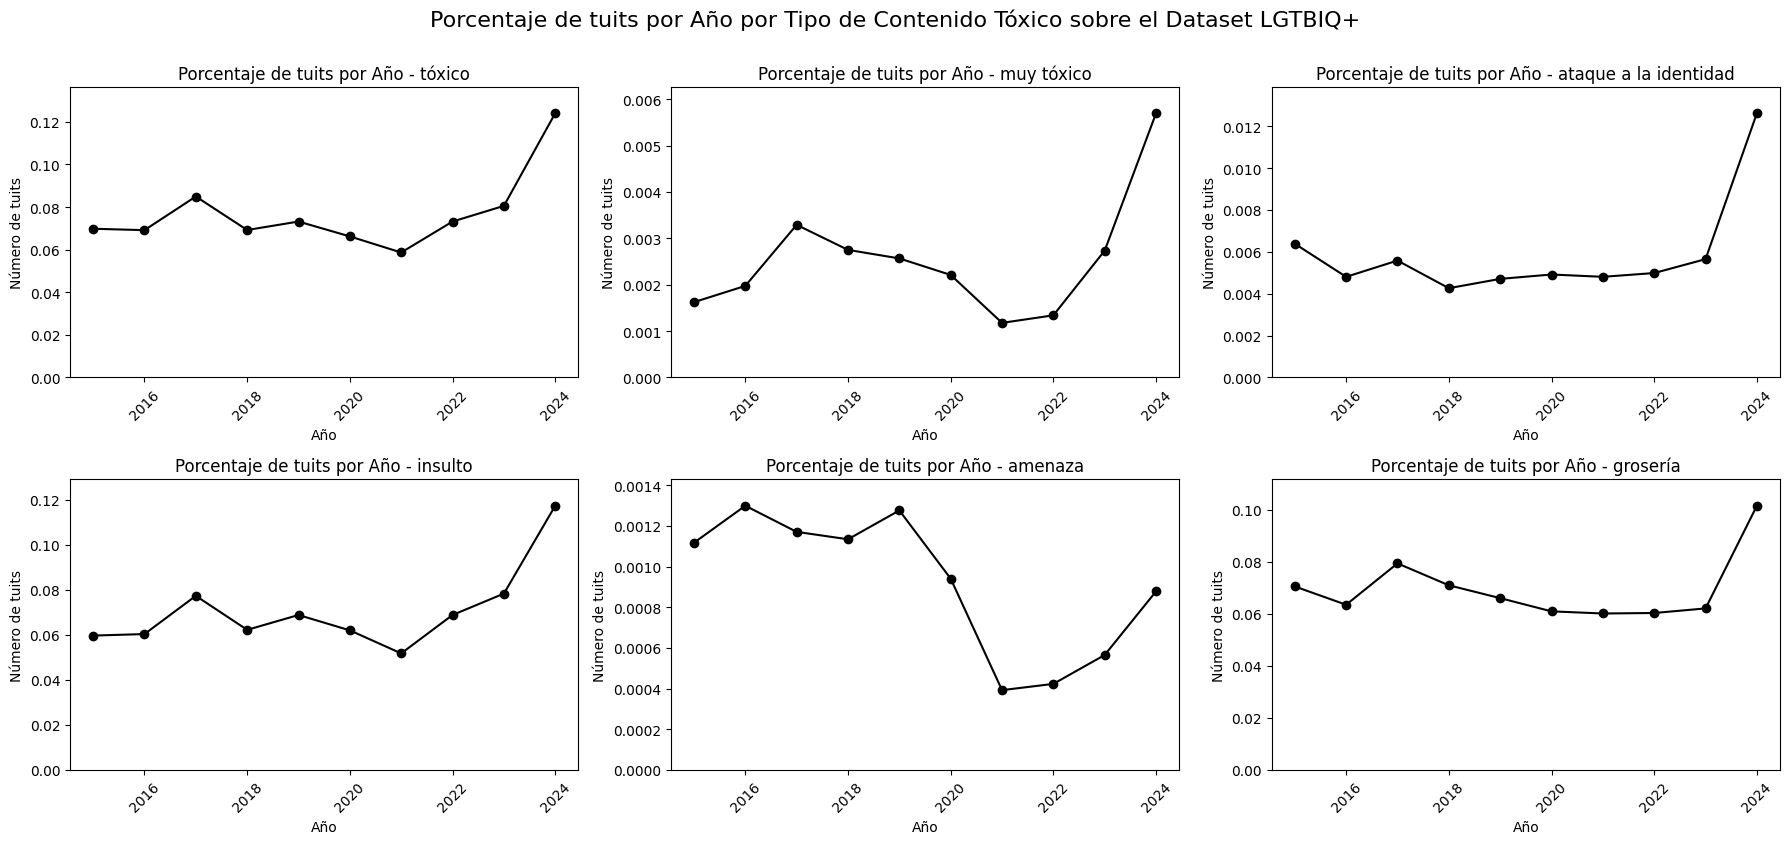

In [28]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset LGTBIQ+", fontsize=16, y=1.05)
plt.show()

lo mismo pero para los de apoyo

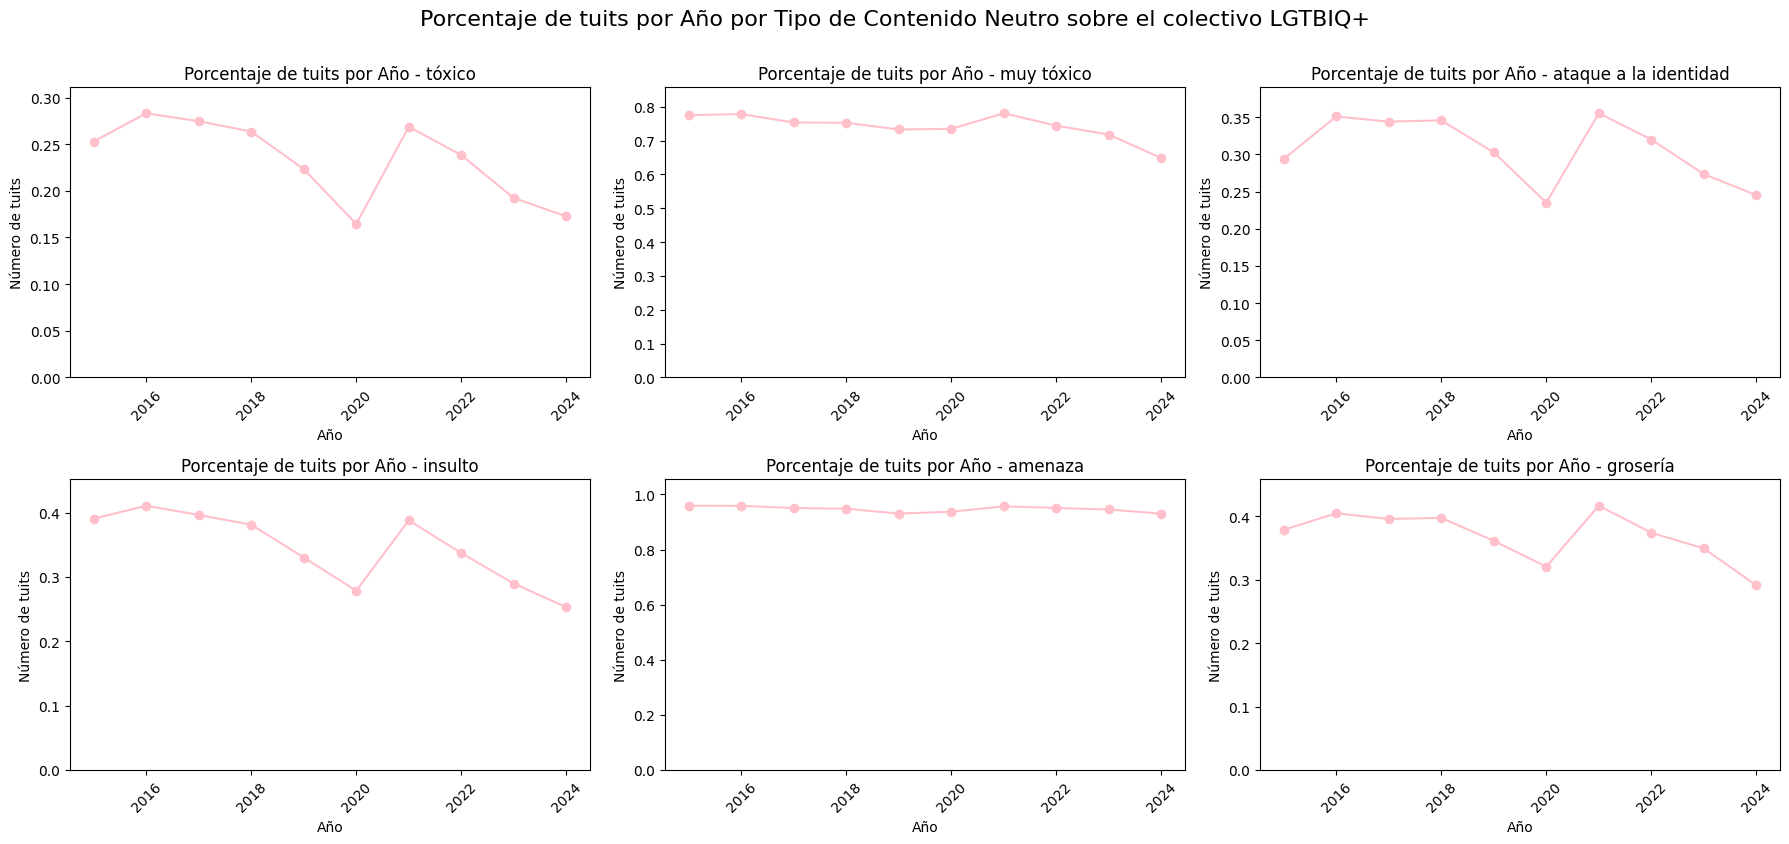

In [29]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Neutro sobre el colectivo LGTBIQ+", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

Ahora para el datatset aleatorio

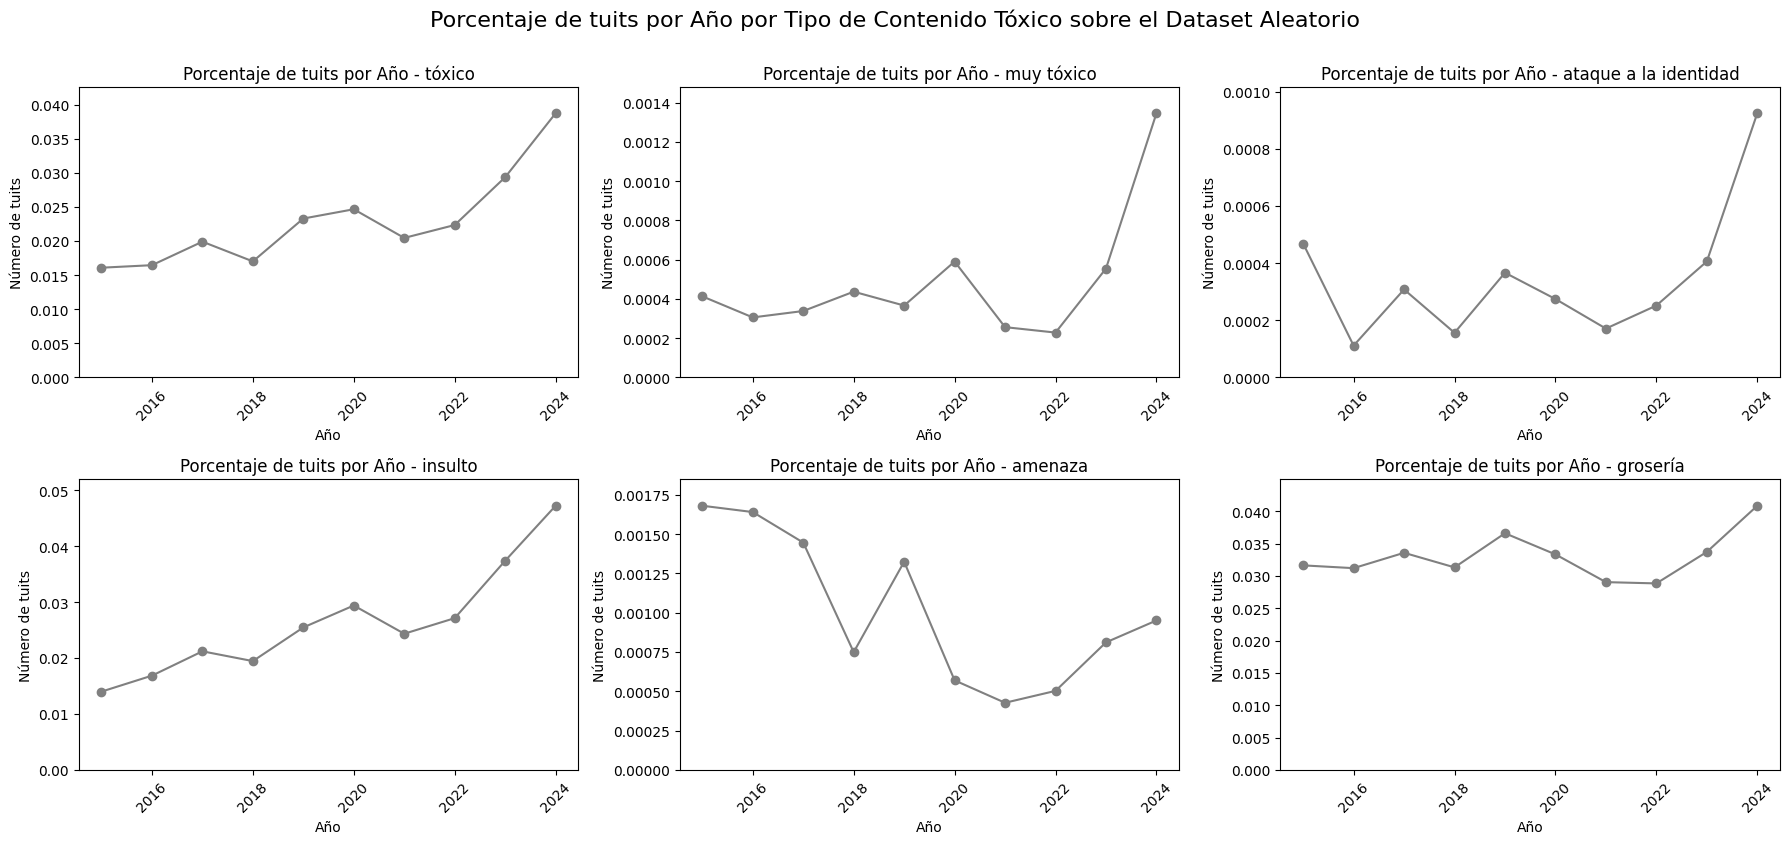

In [30]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year_aleatorio = {
    key: df.groupby('year').size() / df_aleatorio.groupby('year').size()
    for key, df in df_filtered_aleatorio.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_aleatorio.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='gray')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset Aleatorio", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

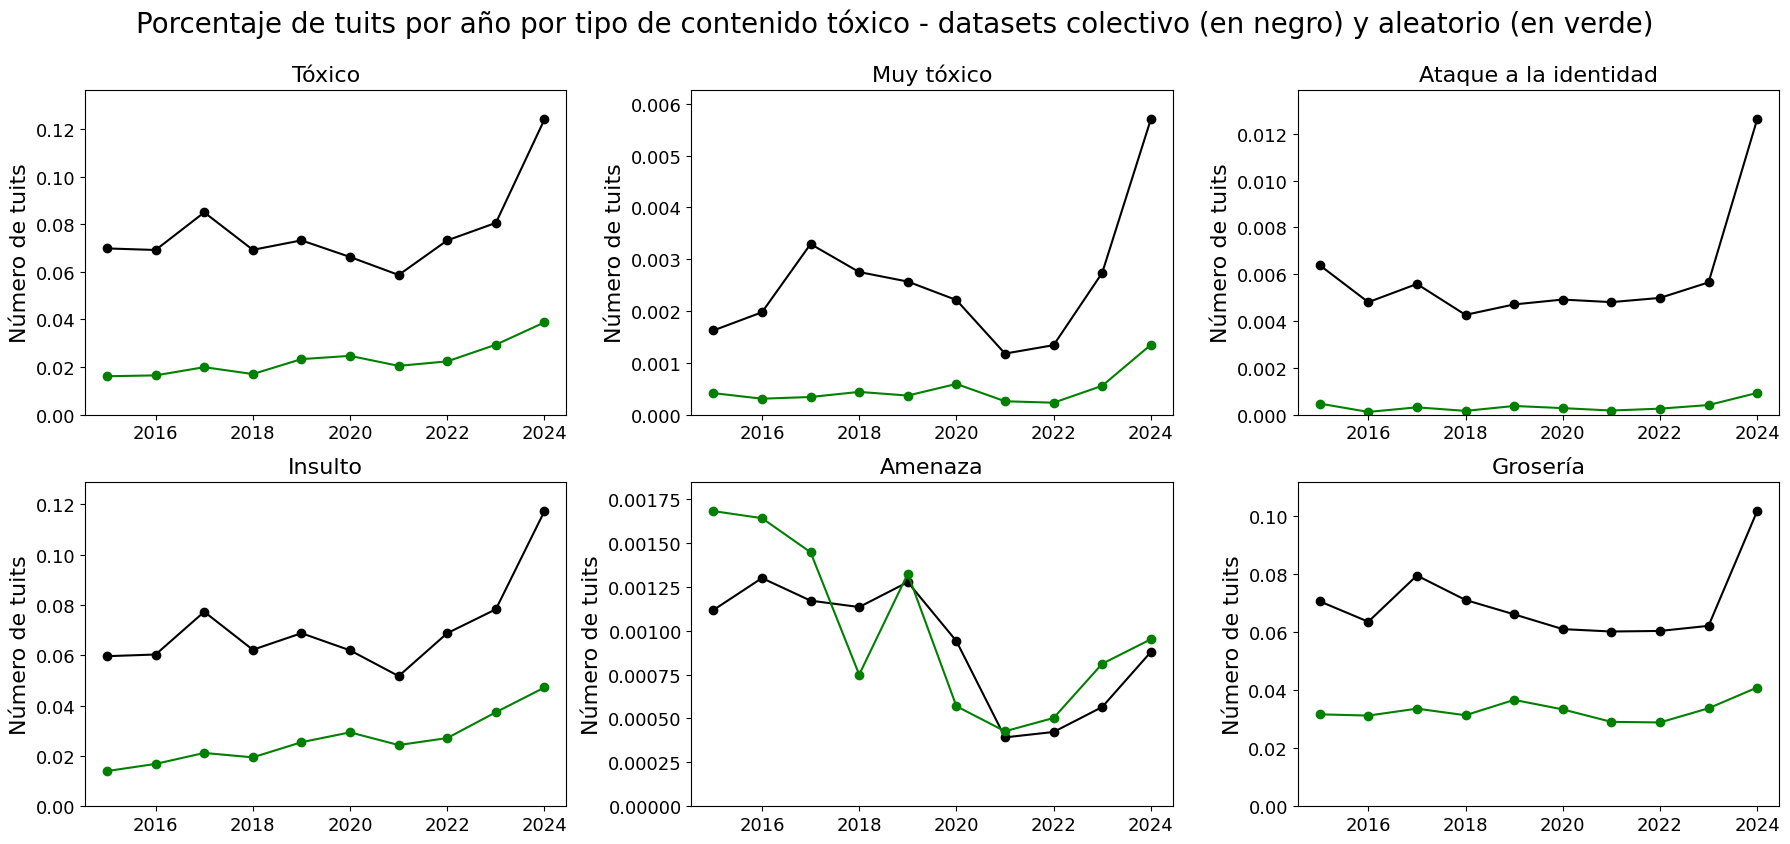

In [31]:
# Crear los diccionarios con las proporciones de tuits por año para ambos datasets
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered.items()
}

tuits_per_year_aleatorio = {
    key: df.groupby('year').size() / df_aleatorio.groupby('year').size()
    for key, df in df_filtered_aleatorio.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    # Subplot para el dataset LGTBIQ+
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black', label="Dataset colectivo", fontsize=13)
    
    # Subplot para el dataset aleatorio
    tuits_per_year_aleatorio[key].plot(marker='o', color='green', label="Dataset aleatorio")
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, max(tuits.max(), tuits_per_year_aleatorio[key].max()) * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Título general para la figura
plt.suptitle("Porcentaje de tuits por año por tipo de contenido tóxico - datasets colectivo (en negro) y aleatorio (en verde)", fontsize=20, y=1.05)

# Mostrar la gráfica
plt.show()


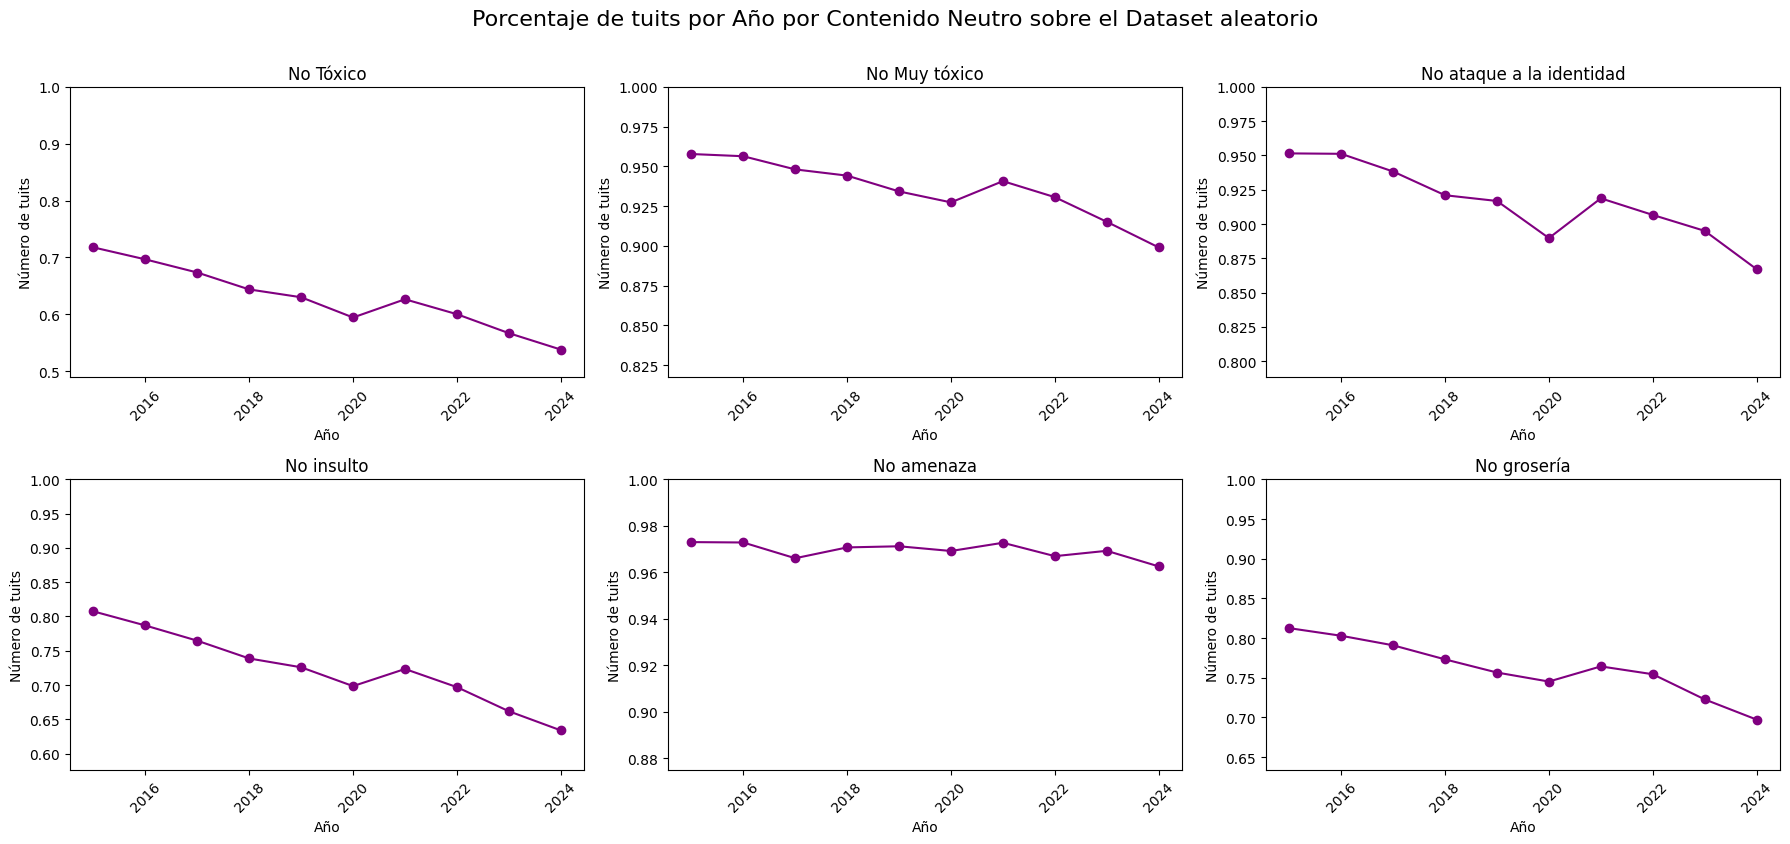

In [32]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_aleatorio.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "No Tóxico",
    "No Muy tóxico",
    "No ataque a la identidad",
    "No insulto",
    "No amenaza",
    "No grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='purple')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(tuits.min() / 1.1, 1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Contenido Neutro sobre el Dataset aleatorio", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

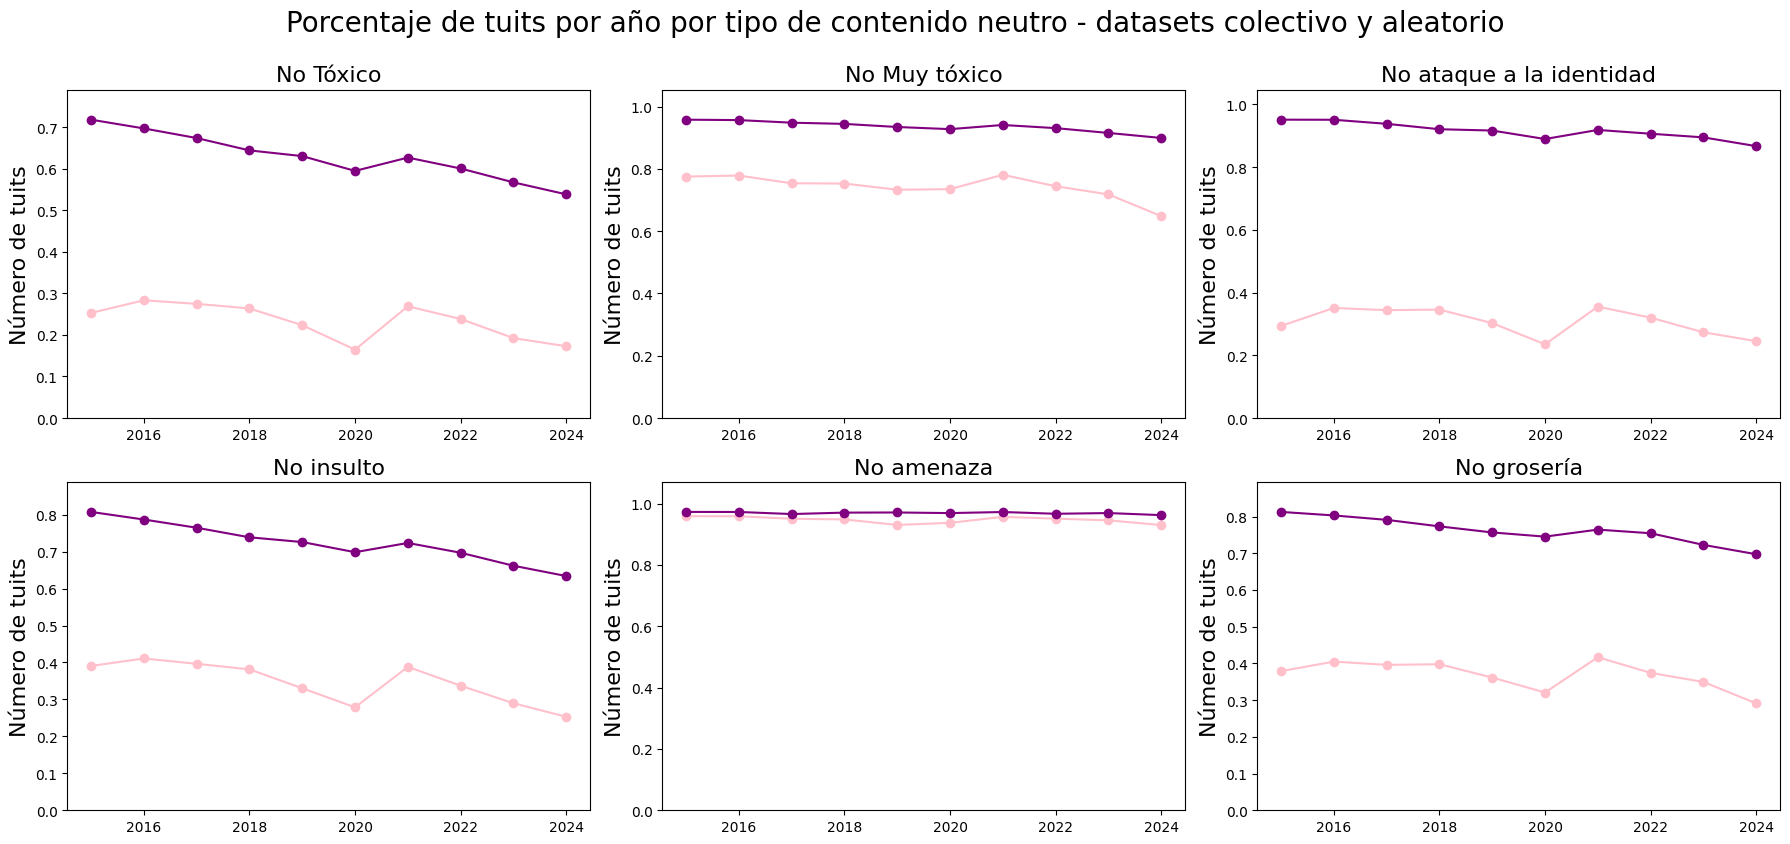

In [33]:
# Crear los diccionarios con las proporciones de tuits por año para ambos datasets
tuits_per_year_apoyo = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

tuits_per_year_aleatorio = {
    key: df.groupby('year').size() / df_aleatorio.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "No Tóxico",
    "No Muy tóxico",
    "No ataque a la identidad",
    "No insulto",
    "No amenaza",
    "No grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre los diccionarios para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_apoyo.items()):
    # Subplot para el dataset LGTBIQ+ (Apoyo)
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink', label="Dataset colectivo")
    
    # Subplot para el dataset aleatorio
    tuits_per_year_aleatorio[key].plot(marker='o', color='purple', label="Dataset aleatorio")
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, max(tuits.max(), tuits_per_year_aleatorio[key].max()) * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Título general para la figura
plt.suptitle("Porcentaje de tuits por año por tipo de contenido neutro - datasets colectivo y aleatorio", fontsize=20, y=1.05)

# Mostrar la gráfica
plt.show()


## Media del score de cada uno de los atributos por año

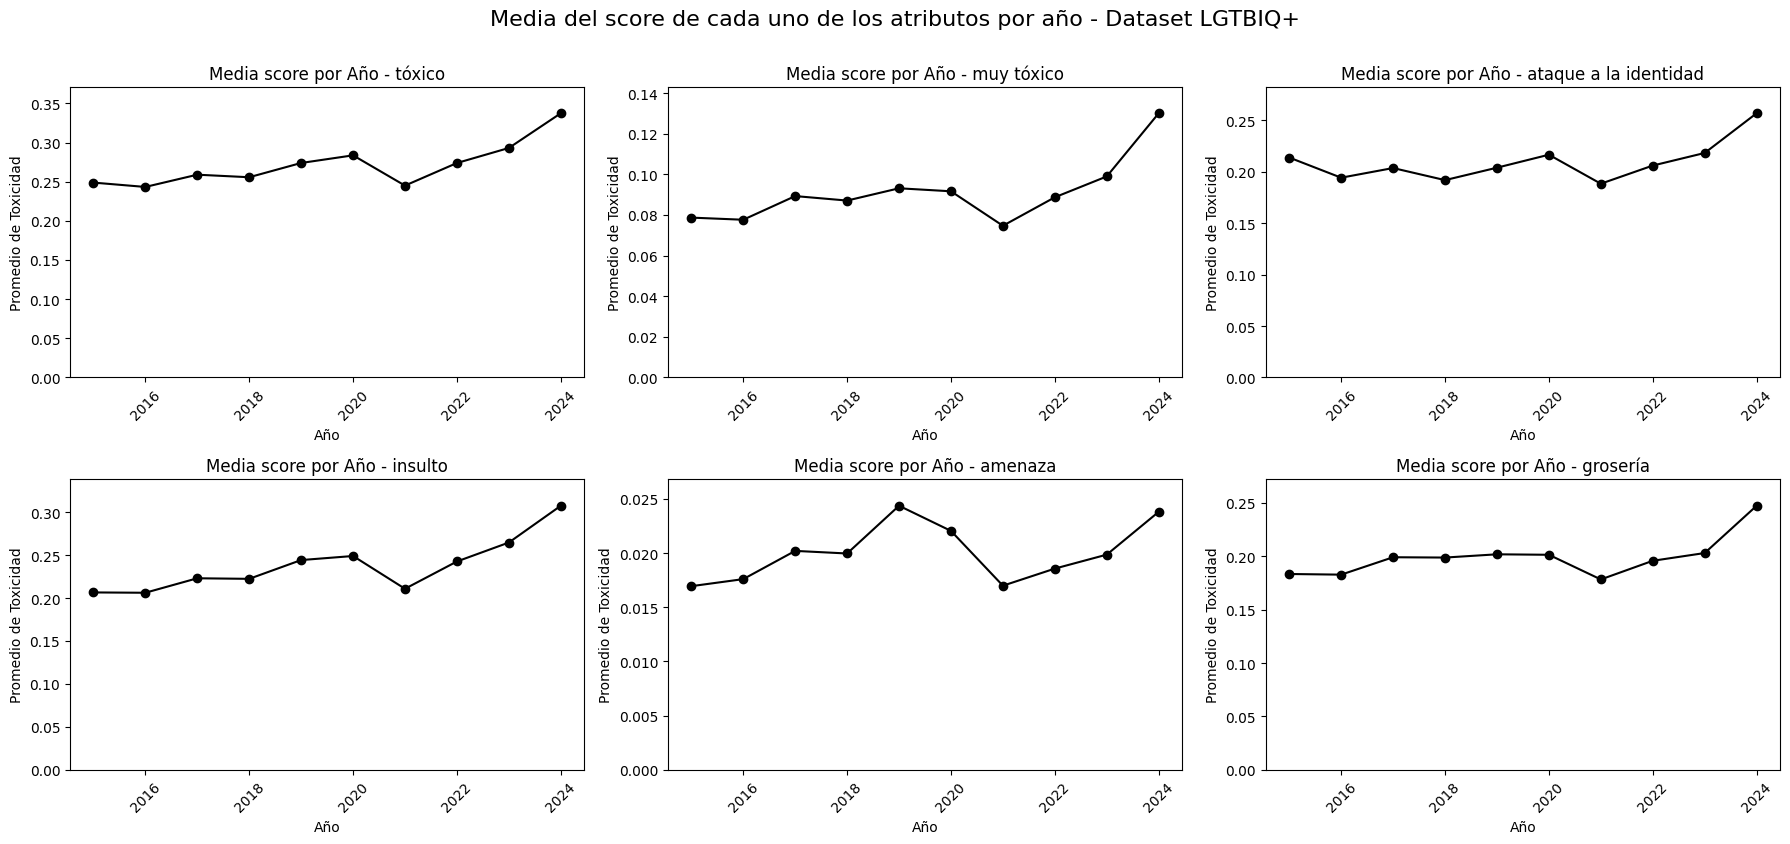

In [34]:
# Crear el diccionario con las medias de toxicidad por año
media_toxicidad = {
    'toxicity': df_orgullo.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_orgullo.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_orgullo.groupby('year')['identity_attack'].mean(),
    'insult': df_orgullo.groupby('year')['insult'].mean(),
    'threat': df_orgullo.groupby('year')['threat'].mean(),
    'profanity': df_orgullo.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Media score por Año - tóxico",
    "Media score por Año - muy tóxico",
    "Media score por Año - ataque a la identidad",
    "Media score por Año - insulto",
    "Media score por Año - amenaza",
    "Media score por Año - grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario `media_toxicidad` para crear los gráficos
for i, (key, media) in enumerate(media_toxicidad.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='black')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Promedio de Toxicidad")
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Media del score de cada uno de los atributos por año - Dataset LGTBIQ+", fontsize=16, y=1.05)
plt.show()

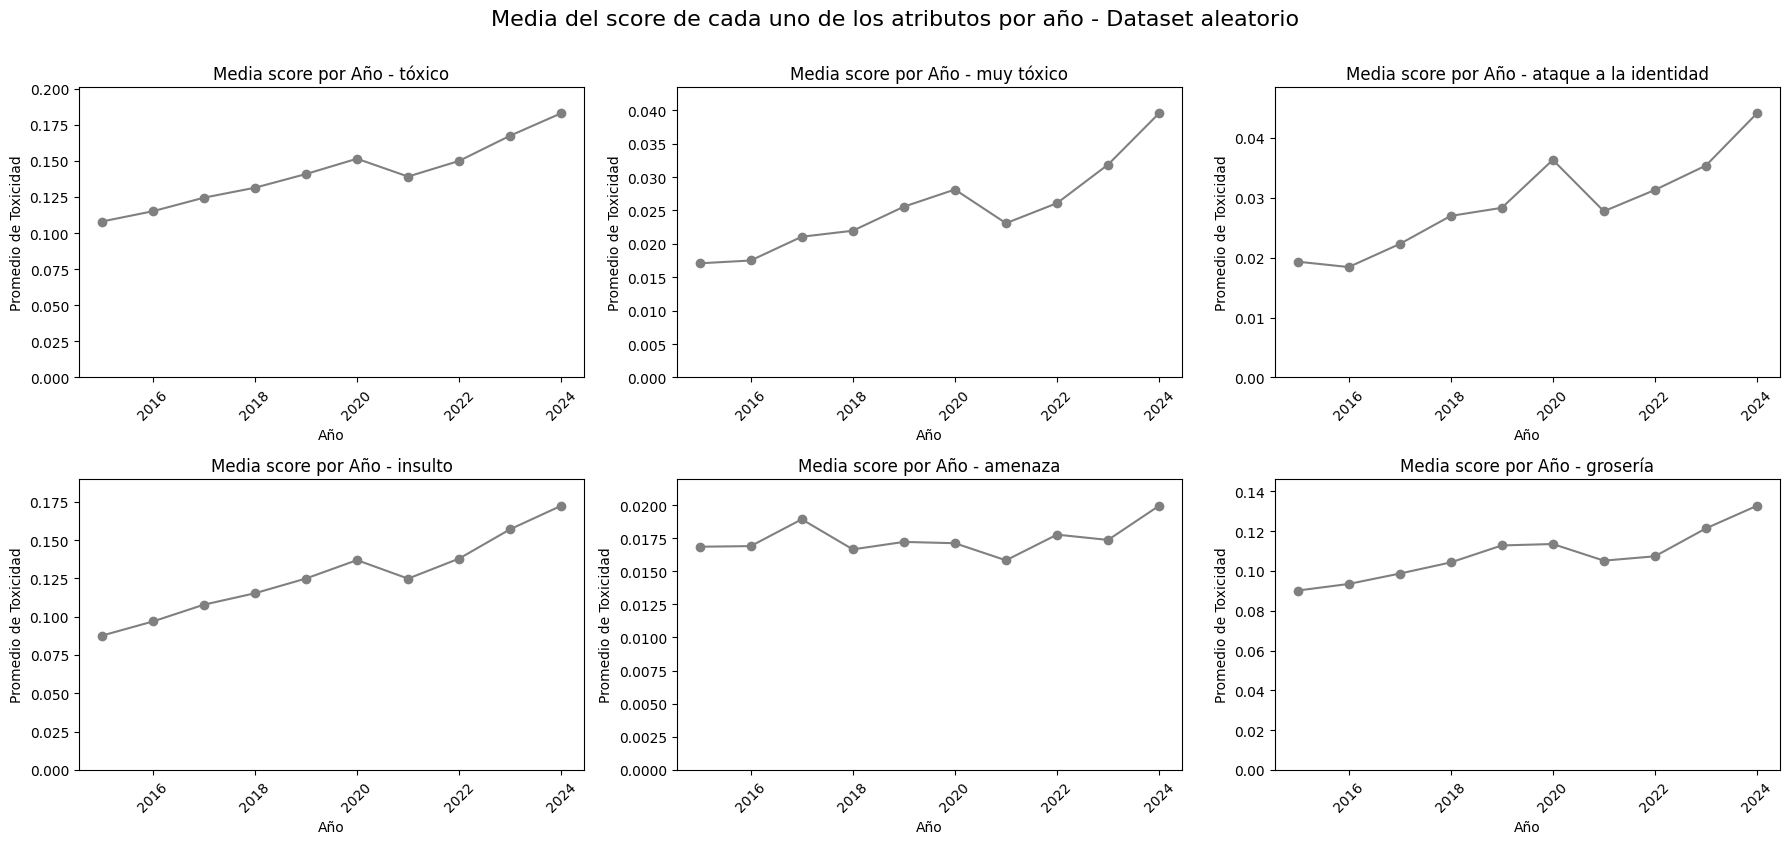

In [35]:
# Crear el diccionario con las medias de toxicidad por año
media_toxicidad_aleatorio = {
    'toxicity': df_aleatorio.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_aleatorio.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_aleatorio.groupby('year')['identity_attack'].mean(),
    'insult': df_aleatorio.groupby('year')['insult'].mean(),
    'threat': df_aleatorio.groupby('year')['threat'].mean(),
    'profanity': df_aleatorio.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Media score por Año - tóxico",
    "Media score por Año - muy tóxico",
    "Media score por Año - ataque a la identidad",
    "Media score por Año - insulto",
    "Media score por Año - amenaza",
    "Media score por Año - grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario `media_toxicidad` para crear los gráficos
for i, (key, media) in enumerate(media_toxicidad_aleatorio.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='gray')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Promedio de Toxicidad")
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x
    # Ajustar los límites del eje Y
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Media del score de cada uno de los atributos por año - Dataset aleatorio", fontsize=16, y=1.05)
plt.show()


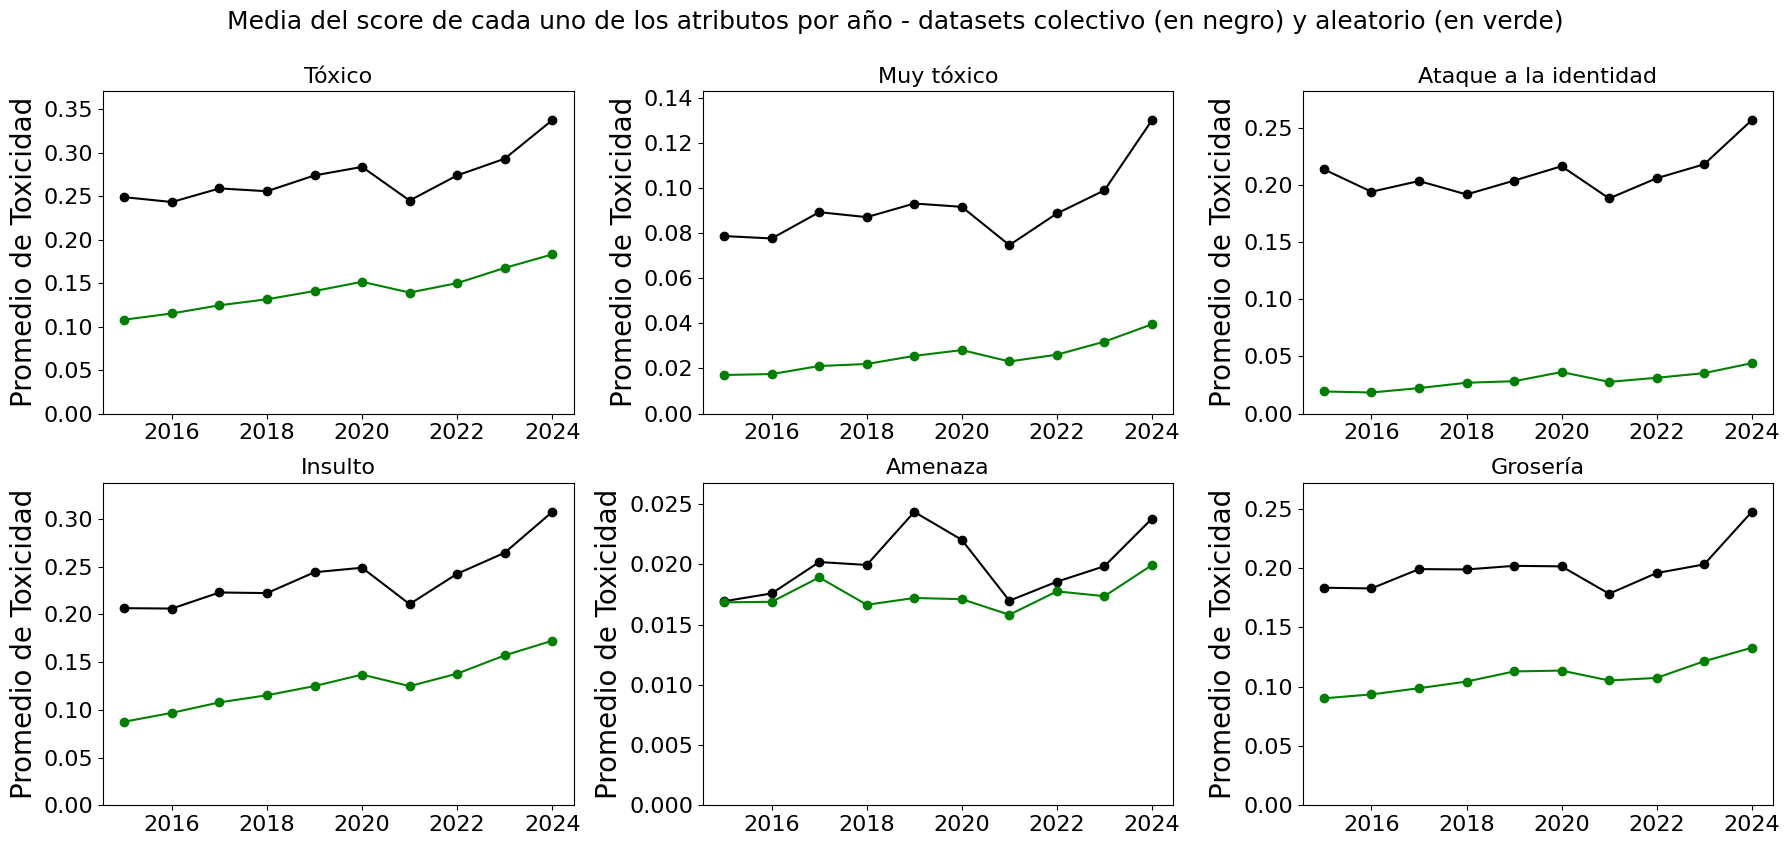

In [36]:
# Crear los diccionarios con las medias de toxicidad por año para ambos datasets
media_toxicidad = {
    'toxicity': df_orgullo.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_orgullo.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_orgullo.groupby('year')['identity_attack'].mean(),
    'insult': df_orgullo.groupby('year')['insult'].mean(),
    'threat': df_orgullo.groupby('year')['threat'].mean(),
    'profanity': df_orgullo.groupby('year')['profanity'].mean()
}

media_toxicidad_aleatorio = {
    'toxicity': df_aleatorio.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_aleatorio.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_aleatorio.groupby('year')['identity_attack'].mean(),
    'insult': df_aleatorio.groupby('year')['insult'].mean(),
    'threat': df_aleatorio.groupby('year')['threat'].mean(),
    'profanity': df_aleatorio.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Grosería"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario media_toxicidad para crear los gráficos (Dataset LGTBIQ+)
for i, (key, media) in enumerate(media_toxicidad.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='black', label="Dataset colectivo", fontsize=16)
    
    # Añadir el gráfico para el dataset aleatorio
    media_toxicidad_aleatorio[key].plot(marker='o', color='green', label="Dataset aleatorio", fontsize=16)
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Promedio de Toxicidad", fontsize=20)
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Añadir título general para la figura
plt.suptitle("Media del score de cada uno de los atributos por año - datasets colectivo (en negro) y aleatorio (en verde)", fontsize=18, y=1.05)

# Mostrar la gráfica
plt.show()


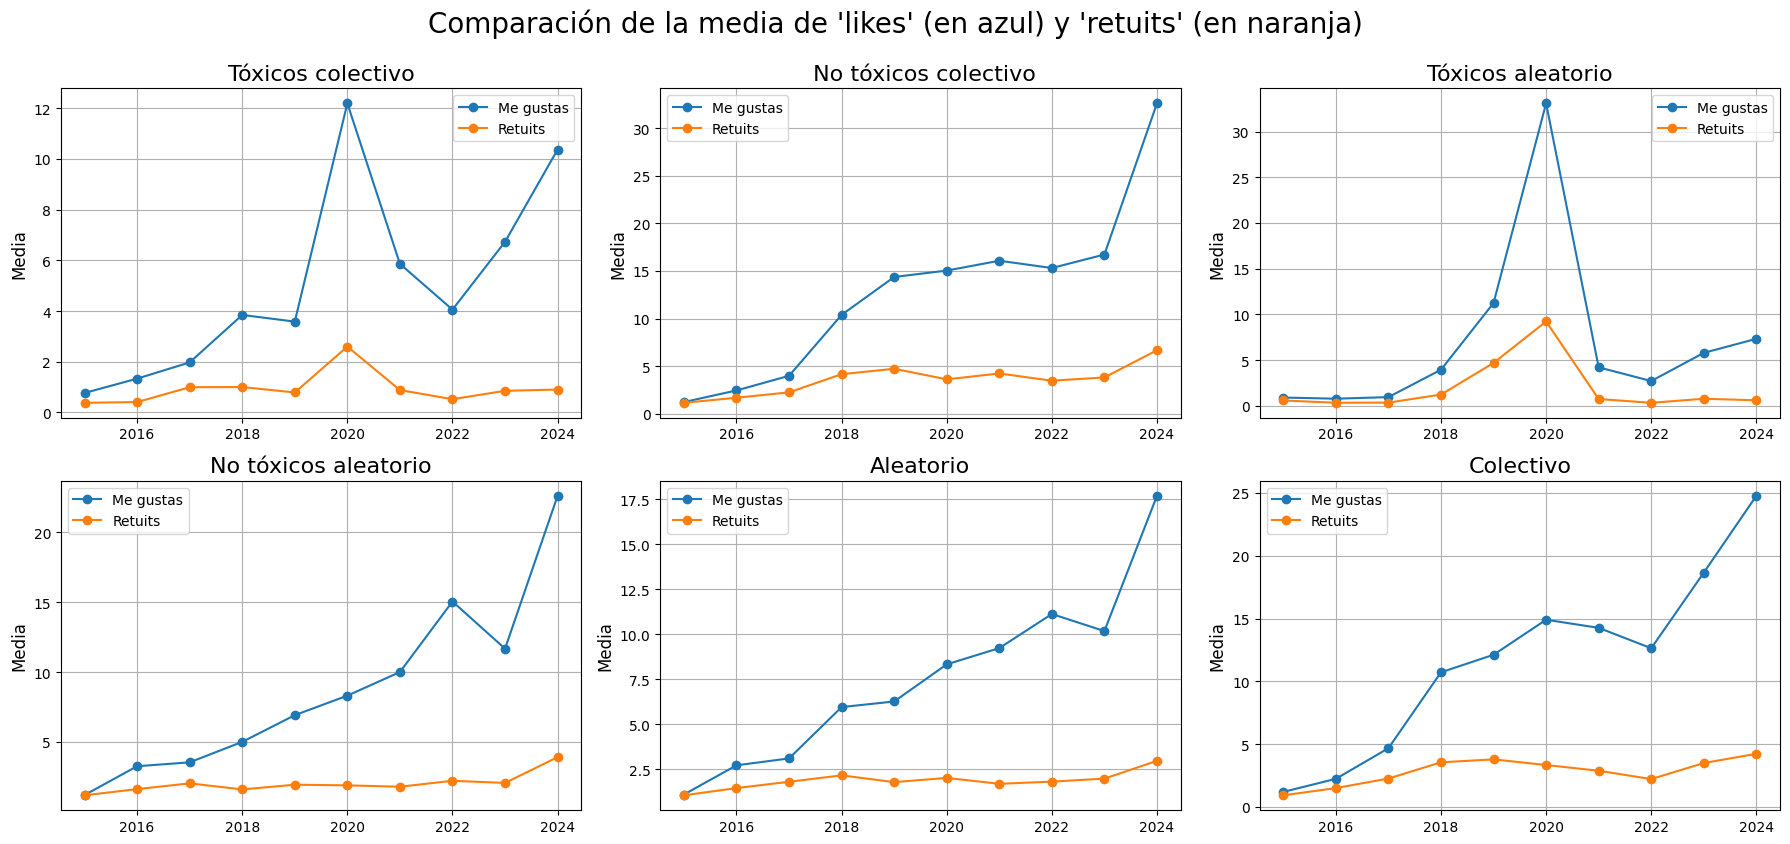

In [37]:
# Calcular la media por año de las columnas de interés para df_filtered
mean_values_by_year_to = df_filtered['toxicity'].groupby('year')[['likeCount', 'retweetCount']].mean()

# Calcular la media por año de las columnas de interés para df_filtered_apoyo
mean_values_by_year_notoa = df_filtered_apoyo['toxicity'].groupby('year')[['likeCount', 'retweetCount']].mean()

# Calcular la media por año de las columnas de interés para df_filtered_aleatorio
mean_values_by_year_toe = df_filtered_aleatorio['toxicity'].groupby('year')[['likeCount', 'retweetCount']].mean()

# Calcular la media por año de las columnas de interés para df_filtered_e_notox
mean_values_by_year_notoe = df_filtered_e_notox['toxicity'].groupby('year')[['likeCount', 'retweetCount']].mean()

# Calcular la media por año de las columnas de interés para df_aleatorio
mean_values_by_year_aleatorio = df_aleatorio.groupby('year')[['likeCount', 'retweetCount']].mean()

# Calcular la media por año de las columnas de interés para df_orgullo
mean_values_by_year_orgullo = df_orgullo.groupby('year')[['likeCount', 'retweetCount']].mean()


# Crear la figura comparativa correctamente con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

legend_labels = ['Me gustas', 'Retuits']

# primer gráfico en la posición 1)
mean_values_by_year_to.plot(kind='line', marker='o', ax=axes[0, 0])

# Personalizar el gráfico
axes[0, 0].set_title("Tóxicos colectivo", fontsize=16)
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel("Media", fontsize=12)
axes[0, 0].grid(True)
axes[0, 0].legend(legend_labels)

# segundo gráfico en la posición 2
mean_values_by_year_notoa.plot(kind='line', marker='o', ax=axes[0, 1])

# Personalizar el gráfico
axes[0, 1].set_title(" No tóxicos colectivo", fontsize=16)
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel("Media", fontsize=12)
axes[0, 1].grid(True)
axes[0, 1].legend(legend_labels)

# tercer gráfico en la posición 3
mean_values_by_year_toe.plot(kind='line', marker='o', ax=axes[0, 2])

# Personalizar el gráfico
axes[0, 2].set_title("Tóxicos aleatorio", fontsize=16)
axes[0, 2].set_xlabel(None)
axes[0, 2].set_ylabel("Media", fontsize=12)
axes[0, 2].grid(True)
axes[0, 2].legend(legend_labels)

# cuarto gráfico en la posición 4
mean_values_by_year_notoe.plot(kind='line', marker='o', ax=axes[1, 0])

# Personalizar el gráfico 
axes[1, 0].set_title("No tóxicos aleatorio", fontsize=16)
axes[1, 0].set_xlabel(None)
axes[1, 0].set_ylabel("Media", fontsize=12)
axes[1, 0].grid(True)
axes[1, 0].legend(legend_labels)

# quinto gráfico en la posición 5
mean_values_by_year_aleatorio.plot(kind='line', marker='o', ax=axes[1, 1])

# Personalizar el gráfico 
axes[1, 1].set_title("Aleatorio", fontsize=16)
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel("Media", fontsize=12)
axes[1, 1].grid(True)
axes[1, 1].legend(legend_labels)

# sexto gráfico en la posición 6
mean_values_by_year_orgullo.plot(kind='line', marker='o', ax=axes[1, 2])

# Personalizar el gráfico
axes[1, 2].set_title("Colectivo", fontsize=16)
axes[1, 2].set_xlabel(None)
axes[1, 2].set_ylabel("Media", fontsize=12)
axes[1, 2].grid(True)
axes[1, 2].legend(legend_labels)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.suptitle("Comparación de la media de 'likes' (en azul) y 'retuits' (en naranja)", fontsize=20, y=1.05)
plt.show()

tamaños

In [38]:
print(df_aleatorio.shape )
print(df_orgullo.shape )
for c in toxicity_columns:
    print(c, df_filtered[c].shape )
    print(c, df_filtered_apoyo[c].shape )
    print(c, df_filtered_aleatorio[c].shape )
    print(c, df_filtered_e_notox[c].shape )

(395108, 35)
(653018, 35)
toxicity (49180, 35)
toxicity (144965, 35)
toxicity (9142, 35)
toxicity (246780, 35)
severe_toxicity (1609, 35)
severe_toxicity (483108, 35)
severe_toxicity (191, 35)
severe_toxicity (369131, 35)
identity_attack (3783, 35)
identity_attack (193025, 35)
identity_attack (135, 35)
identity_attack (361032, 35)
insult (45375, 35)
insult (217755, 35)
insult (10589, 35)
insult (284473, 35)
threat (577, 35)
threat (617276, 35)
threat (381, 35)
threat (383045, 35)
profanity (44456, 35)
profanity (236209, 35)
profanity (13001, 35)
profanity (300164, 35)


# Estudio por periodos

In [39]:
# Crear una función para filtrar por tipo de toxicidad
def filter_toxicity(df, toxicity_column, thresholds):
    """
    Filtra el DataFrame por una columna de toxicidad dada y los umbrales de año especificados.
    """
    # Filtrar para los valores dentro de los rangos de años
    df_2015_2019 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2015) & (df['year'] <= 2019)]
    df_2020 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] == 2020)]
    df_2021_2022 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2021) & (df['year'] <= 2022)]
    df_2023_2024 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2023) & (df['year'] <= 2024)]

    return df_2015_2019, df_2020, df_2021_2022, df_2023_2024

# Definir columnas de toxicidad
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Umbral de toxicidad
threshold = 0.7
thresholds = {'threshold': threshold}

# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019 = {}
df_2020 = {}
df_2021_2022 = {}
df_2023_2024 = {}

for column in toxicity_columns:
    df_2015_2019[column], df_2020[column], df_2021_2022[column], df_2023_2024[column] = filter_toxicity(df_orgullo, column, thresholds)


<Figure size 1000x800 with 0 Axes>

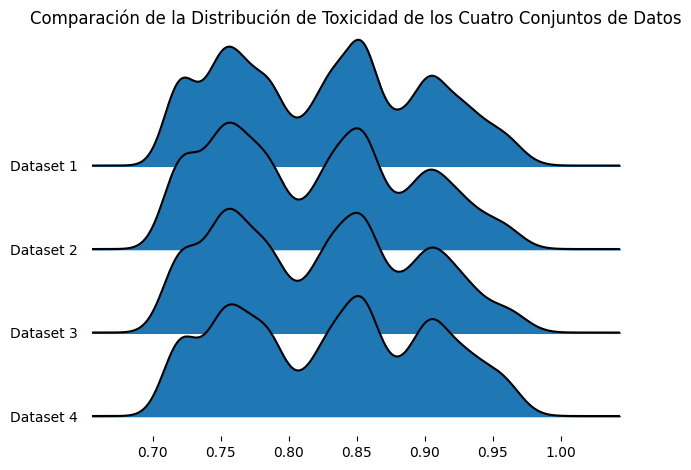

In [40]:
# Assuming the four datasets are stored in a list (or directly)
distribuciones = [
    df_2015_2019['toxicity']['toxicity'].values,
    df_2020['toxicity']['toxicity'].values,
    df_2021_2022['toxicity']['toxicity'].values,
    df_2023_2024['toxicity']['toxicity'].values
]

# Create the Joy Plot
plt.figure(figsize=(10, 8))
joypy.joyplot(distribuciones, 
        labels=['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'],  # Custom labels for each dataset
        title="Comparación de la Distribución de Toxicidad de los Cuatro Conjuntos de Datos")  # Title
plt.show()


<Figure size 1000x800 with 0 Axes>

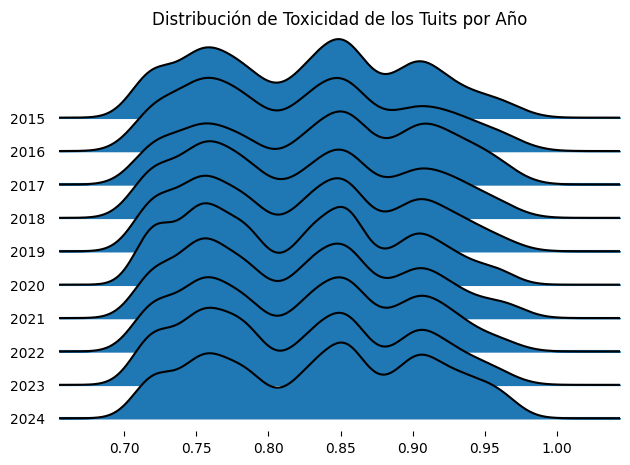

In [41]:
# Crear el gráfico de distribuciones superpuestas con JoyPy
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
joypy.joyplot(distribuciones_toxicidad, 
        labels=[str(year) for year in df_orgullo['year'].unique()],  # Etiquetas de los días
        title="Distribución de Toxicidad de los Tuits por Año")  # Título del gráfico

# Mostrar el gráfico
plt.show()

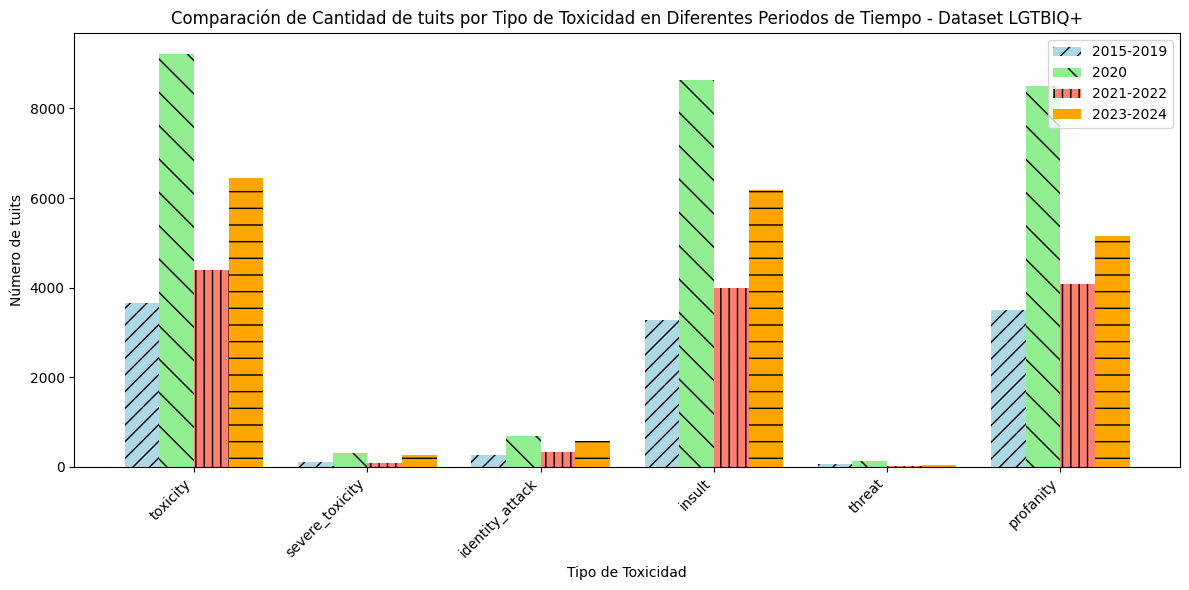

In [42]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019 = []
lengths_2020 = []
lengths_2021_2022 = []
lengths_2023_2024 = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019 = len(df_2015_2019[column]) / 5
    len_2020 = len(df_2020[column])
    len_2021_2022 = len(df_2021_2022[column]) / 2
    len_2023_2024 = len(df_2023_2024[column]) / 2
    
    lengths_2015_2019.append(len_2015_2019)
    lengths_2020.append(len_2020)
    lengths_2021_2022.append(len_2021_2022)
    lengths_2023_2024.append(len_2023_2024)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[152.56010076118505, 154.96688741721854, 164.88785769528226, 163.2156575818548, 118.33333333333333, 143.0754263477166]
[-52.35255854293148, -72.56493506493507, -51.605839416058394, -53.70627750752838, -79.00763358778626, -51.8599175985874]
[46.81456200227531, 212.42603550295857, 72.2473604826546, 54.440830622967226, 65.45454545454545, 26.030077026531362]


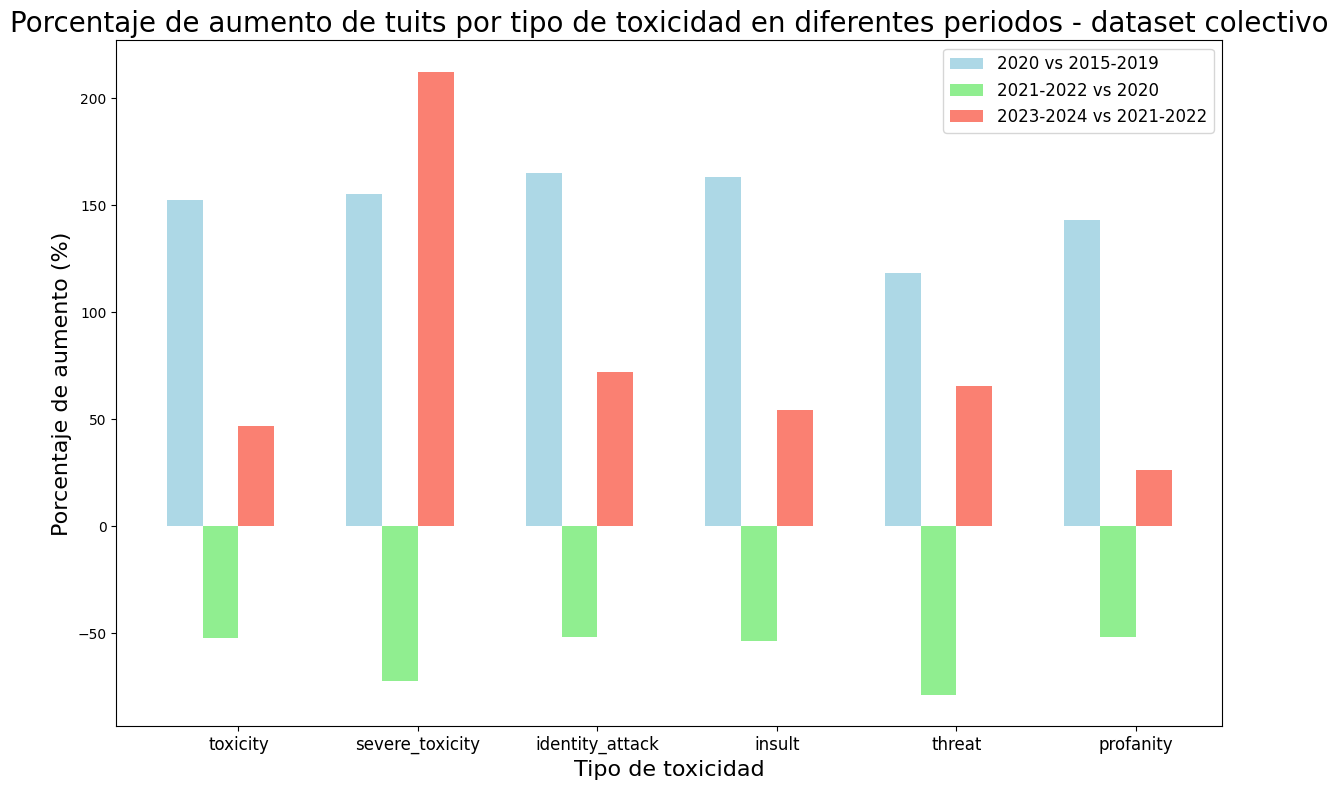

In [43]:
def calcular_aumento(antiguo, nuevo):
    return ((nuevo - antiguo) / antiguo) * 100

aumento_2020_vs_2015_2019 = []
aumento_2021_2022_vs_2020 = []
aumento_2023_2024_vs_2021_2022 = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019.append(calcular_aumento(lengths_2015_2019[i], lengths_2020[i]))
    aumento_2021_2022_vs_2020.append(calcular_aumento(lengths_2020[i], lengths_2021_2022[i]))
    aumento_2023_2024_vs_2021_2022.append(calcular_aumento(lengths_2021_2022[i], lengths_2023_2024[i]))


print(aumento_2020_vs_2015_2019)
print(aumento_2021_2022_vs_2020)
print(aumento_2023_2024_vs_2021_2022)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 8))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de toxicidad', fontsize=16)
ax.set_ylabel('Porcentaje de aumento (%)', fontsize=16)
ax.set_title('Porcentaje de aumento de tuits por tipo de toxicidad en diferentes periodos - dataset colectivo', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, fontsize=12)
ax.legend(fontsize=12)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Estudiamos el promedio de megustas antes y después de Elon Musk

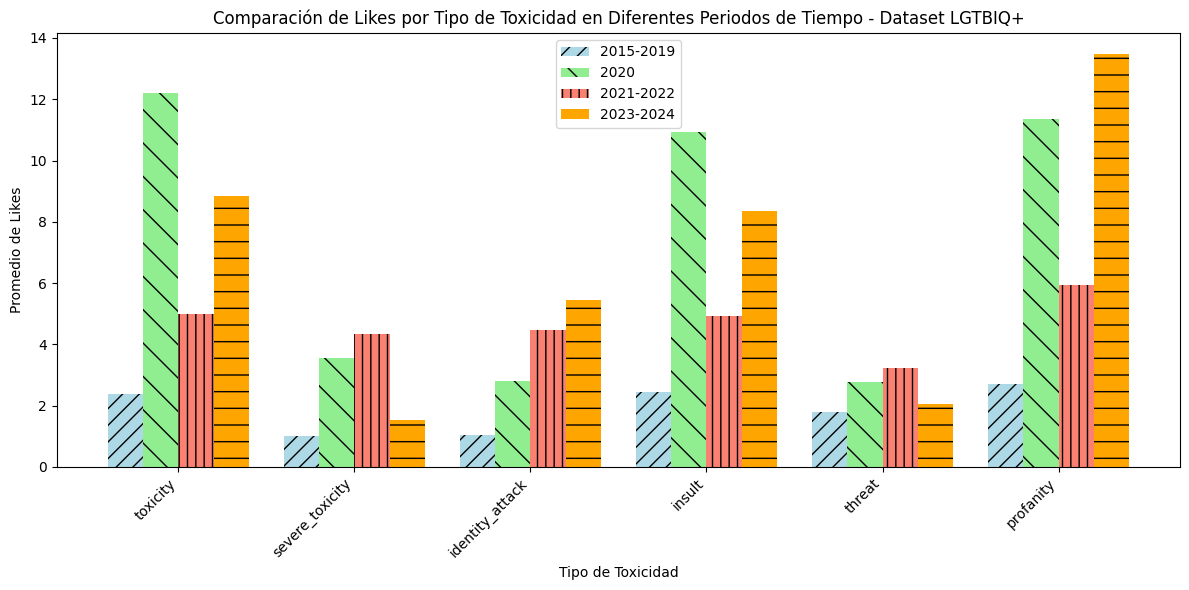

In [44]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019 = []
mgs_2020 = []
mgs_2021_2022 = []
mgs_2023_2024 = []

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean = df_2015_2019[column]['likeCount'].mean()
    mgs_2020_mean = df_2020[column]['likeCount'].mean()
    mgs_2021_2022_mean = df_2021_2022[column]['likeCount'].mean()
    mgs_2023_2024_mean = df_2023_2024[column]['likeCount'].mean()
    
    mgs_2015_2019.append(mgs_2015_2019_mean)
    mgs_2020.append(mgs_2020_mean)
    mgs_2021_2022.append(mgs_2021_2022_mean)
    mgs_2023_2024.append(mgs_2023_2024_mean)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[412.2993632660391, 252.6006013690743, 165.8149779735683, 349.20458136642736, 53.65946578995639, 319.8736716029136]
[-58.92535348133401, 21.831887817135442, 59.663865546218496, -54.885752794575616, 16.79439018281994, -47.637869003378455]
[76.5505693781748, -64.49432853121377, 22.066549912434315, 69.34616966328224, -36.50450672922584, 127.03788948030675]


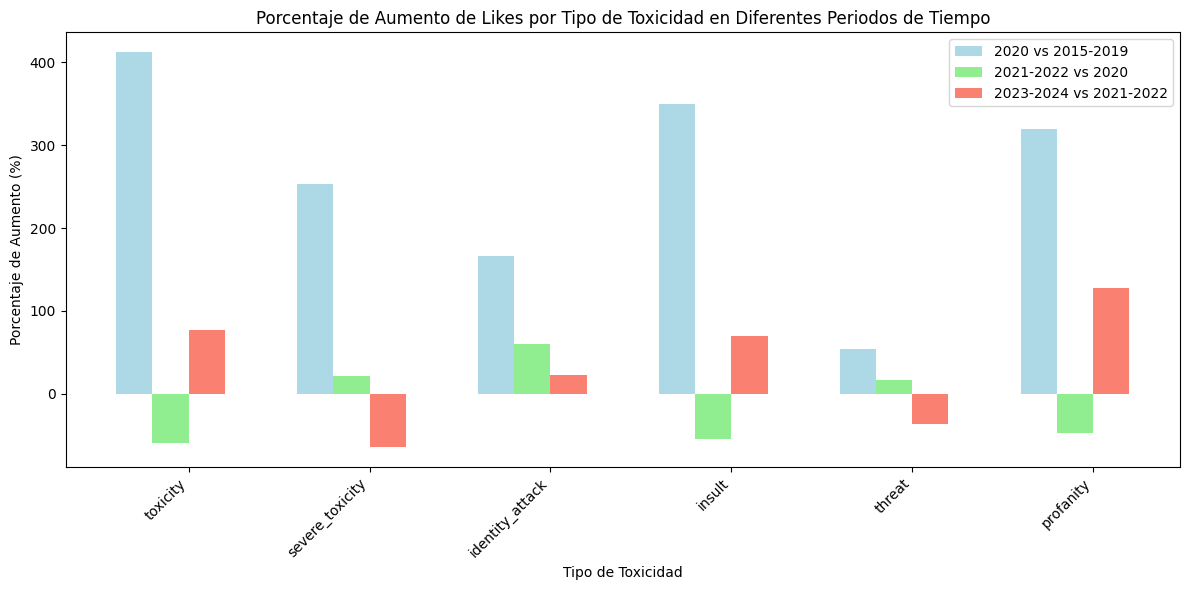

In [45]:
def calcular_aumento(antiguo, nuevo):
    return ((nuevo - antiguo) / antiguo) * 100

aumento_2020_vs_2015_2019_mgs = []
aumento_2021_2022_vs_2020_mgs = []
aumento_2023_2024_vs_2021_2022_mgs = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_mgs.append(calcular_aumento(mgs_2015_2019[i], mgs_2020[i]))
    aumento_2021_2022_vs_2020_mgs.append(calcular_aumento(mgs_2020[i], mgs_2021_2022[i]))
    aumento_2023_2024_vs_2021_2022_mgs.append(calcular_aumento(mgs_2021_2022[i], mgs_2023_2024[i]))

print(aumento_2020_vs_2015_2019_mgs)
print(aumento_2021_2022_vs_2020_mgs)
print(aumento_2023_2024_vs_2021_2022_mgs)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_mgs, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_mgs, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_mgs, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


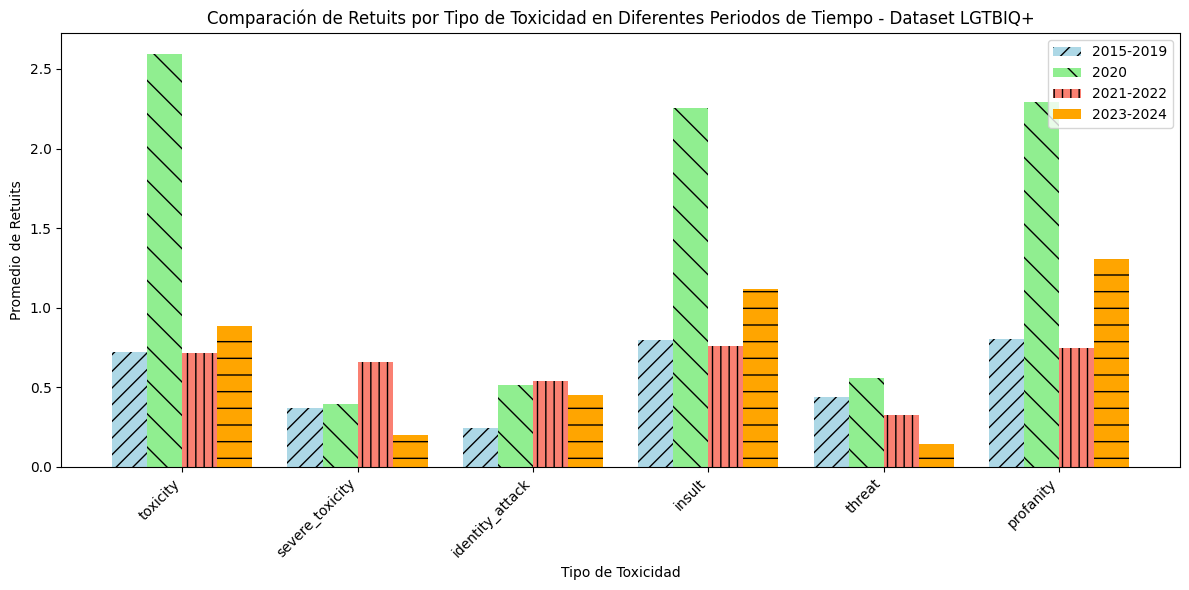

In [46]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019 = []
rts_2020 = []
rts_2021_2022 = []
rts_2023_2024 = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de retuits de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean = df_2015_2019[column]['retweetCount'].mean()
    rts_2020_mean = df_2020[column]['retweetCount'].mean()
    rts_2021_2022_mean = df_2021_2022[column]['retweetCount'].mean()
    rts_2023_2024_mean = df_2023_2024[column]['retweetCount'].mean()
    
    rts_2015_2019.append(rts_2015_2019_mean)
    rts_2020.append(rts_2020_mean)
    rts_2021_2022.append(rts_2021_2022_mean)
    rts_2023_2024.append(rts_2023_2024_mean)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Retuits')
ax.set_title('Comparación de Retuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [47]:
print(calcular_aumento(df_2015_2019['toxicity']['retweetCount'].mean(), df_2020['toxicity']['retweetCount'].mean()))
print(calcular_aumento(df_2020['toxicity']['retweetCount'].mean(), df_2021_2022['toxicity']['retweetCount'].mean()))
print(calcular_aumento(df_2021_2022['toxicity']['retweetCount'].mean(), df_2023_2024['toxicity']['retweetCount'].mean()))

259.2059972647315
-72.50616582807605
23.69110791243259


In [48]:
for atributo in toxicity_columns: 
    data_for_kruskal = [df_2015_2019[atributo]['likeCount'], df_2020[atributo]['likeCount'], df_2021_2022[atributo]['likeCount'], df_2023_2024[atributo]['likeCount']]
    h_statistic, p_value = stats.kruskal(*data_for_kruskal)
    print('me gustas',atributo,':', p_value)
    
for atributo in toxicity_columns: 
    data_for_kruskal = [df_2015_2019[atributo]['retweetCount'], df_2020[atributo]['retweetCount'], df_2021_2022[atributo]['retweetCount'], df_2023_2024[atributo]['retweetCount']]
    h_statistic, p_value = stats.kruskal(*data_for_kruskal)
    print('retuit',atributo,':', p_value)


me gustas toxicity : 2.3098619720784845e-108
me gustas severe_toxicity : 0.00612156801084661
me gustas identity_attack : 6.372296868047895e-10
me gustas insult : 3.3481392859842482e-99
me gustas threat : 0.08362937828170178
me gustas profanity : 6.899201390678852e-108
retuit toxicity : 3.5354024109248505e-51
retuit severe_toxicity : 0.48482989699570334
retuit identity_attack : 8.617489081620988e-07
retuit insult : 3.1970382799060747e-41
retuit threat : 0.4558723968110795
retuit profanity : 7.726616814481197e-54


Lo mismo para tuits no tóxicos

In [49]:
# Crear una función para filtrar por tipo de toxicidad
def filter_toxicity_apoyo(df, toxicity_column, thresholds):
    """
    Filtra el DataFrame por una columna de toxicidad dada y los umbrales de año especificados.
    """
    # Filtrar para los valores dentro de los rangos de años
    df_2015_2019_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2015) & (df['year'] <= 2019)]
    df_2020_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] == 2020)]
    df_2021_2022_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2021) & (df['year'] <= 2022)]
    df_2023_2024_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2023) & (df['year'] <= 2024)]

    return df_2015_2019_apoyo, df_2020_apoyo, df_2021_2022_apoyo, df_2023_2024_apoyo

# Definir columnas de toxicidad
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Umbral de toxicidad
threshold_apoyo = 0.05
thresholds_apoyo = {'threshold': threshold_apoyo}

# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019_apoyo = {}
df_2020_apoyo = {}
df_2021_2022_apoyo = {}
df_2023_2024_apoyo = {}

for column in toxicity_columns:
    df_2015_2019_apoyo[column], df_2020_apoyo[column], df_2021_2022_apoyo[column], df_2023_2024_apoyo[column] = filter_toxicity_apoyo(df_orgullo, column, thresholds_apoyo)


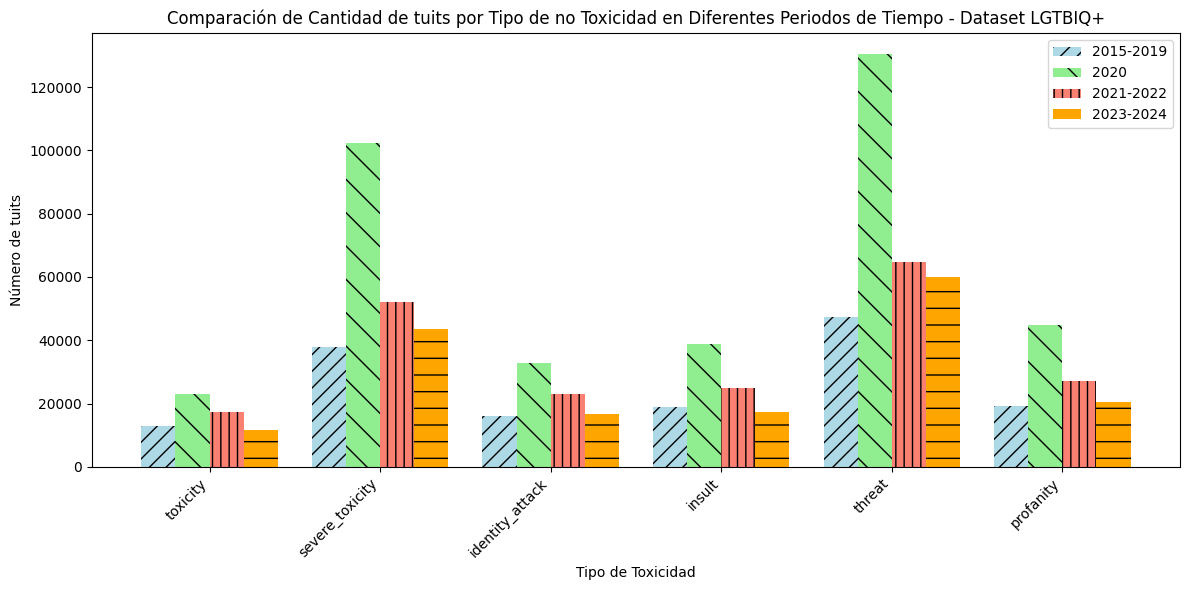

In [50]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_apoyo = []
lengths_2020_apoyo = []
lengths_2021_2022_apoyo = []
lengths_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019_apoyo = len(df_2015_2019_apoyo[column]) / 5
    len_2020_apoyo = len(df_2020_apoyo[column])
    len_2021_2022_apoyo = len(df_2021_2022_apoyo[column]) / 2
    len_2023_2024_apoyo = len(df_2023_2024_apoyo[column]) / 2
    
    lengths_2015_2019_apoyo.append(len_2015_2019_apoyo)
    lengths_2020_apoyo.append(len_2020_apoyo)
    lengths_2021_2022_apoyo.append(len_2021_2022_apoyo)
    lengths_2023_2024_apoyo.append(len_2023_2024_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[79.31347393453908, 170.24986271279514, 102.55928157045138, 105.70220522004512, 175.1836229019793, 132.05845997236963]
[-24.16019544542361, -49.220902287958424, -29.3960489756038, -35.84601911238183, -50.37708834203636, -39.36684496765963]
[-32.814657156005524, -15.921967736660351, -28.246156507449133, -30.235079196193766, -7.6214502279723195, -24.193935367181588]


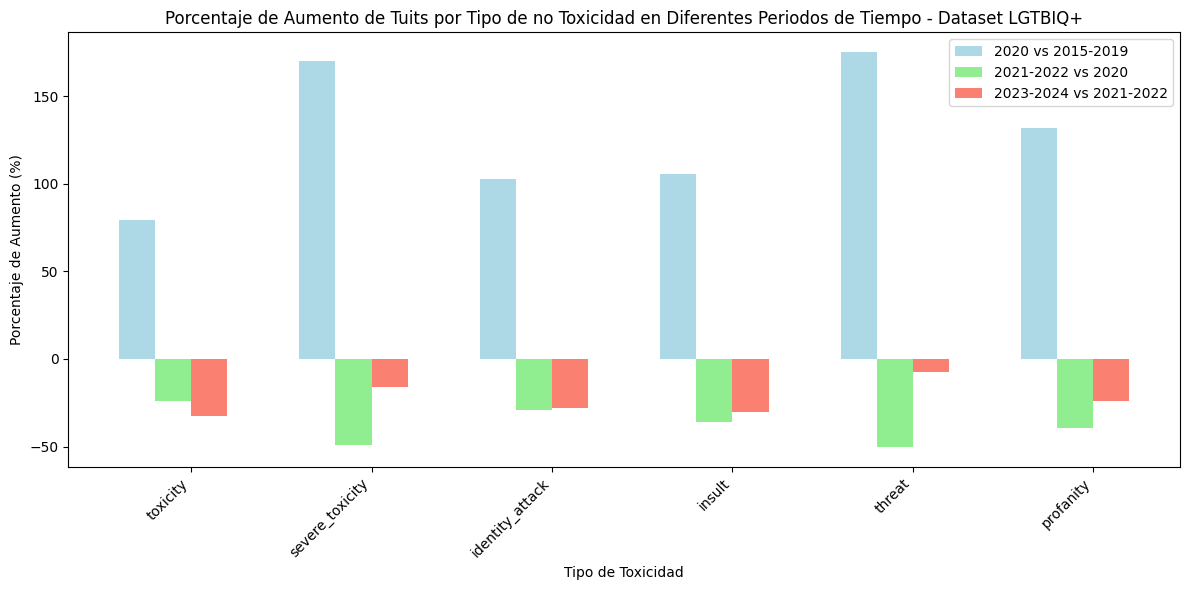

In [51]:
aumento_2020_vs_2015_2019_apoyo = []
aumento_2021_2022_vs_2020_apoyo = []
aumento_2023_2024_vs_2021_2022_apoyo = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_apoyo.append(calcular_aumento(lengths_2015_2019_apoyo[i], lengths_2020_apoyo[i]))
    aumento_2021_2022_vs_2020_apoyo.append(calcular_aumento(lengths_2020_apoyo[i], lengths_2021_2022_apoyo[i]))
    aumento_2023_2024_vs_2021_2022_apoyo.append(calcular_aumento(lengths_2021_2022_apoyo[i], lengths_2023_2024_apoyo[i]))

print(aumento_2020_vs_2015_2019_apoyo)
print(aumento_2021_2022_vs_2020_apoyo)
print(aumento_2023_2024_vs_2021_2022_apoyo)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_apoyo, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_apoyo, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_apoyo, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


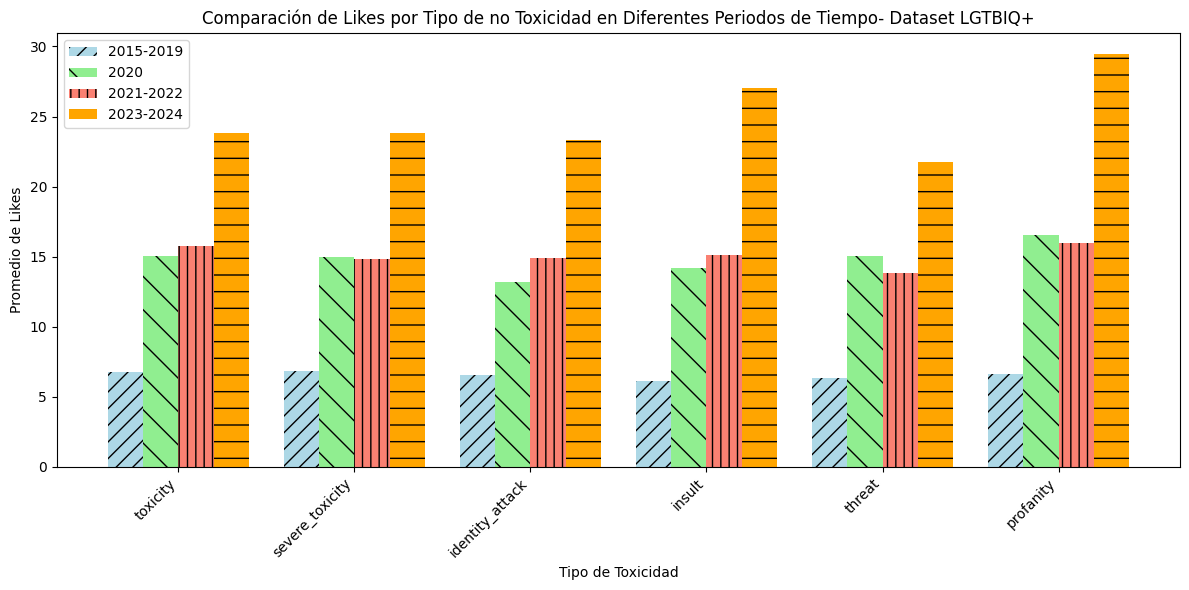

In [52]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_apoyo = []
mgs_2020_apoyo = []
mgs_2021_2022_apoyo = []
mgs_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean_apoyo = df_2015_2019_apoyo[column]['likeCount'].mean()
    mgs_2020_mean_apoyo = df_2020_apoyo[column]['likeCount'].mean()
    mgs_2021_2022_mean_apoyo = df_2021_2022_apoyo[column]['likeCount'].mean()
    mgs_2023_2024_mean_apoyo = df_2023_2024_apoyo[column]['likeCount'].mean()
    
    mgs_2015_2019_apoyo.append(mgs_2015_2019_mean_apoyo)
    mgs_2020_apoyo.append(mgs_2020_mean_apoyo)
    mgs_2021_2022_apoyo.append(mgs_2021_2022_mean_apoyo)
    mgs_2023_2024_apoyo.append(mgs_2023_2024_mean_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de no Toxicidad en Diferentes Periodos de Tiempo- Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

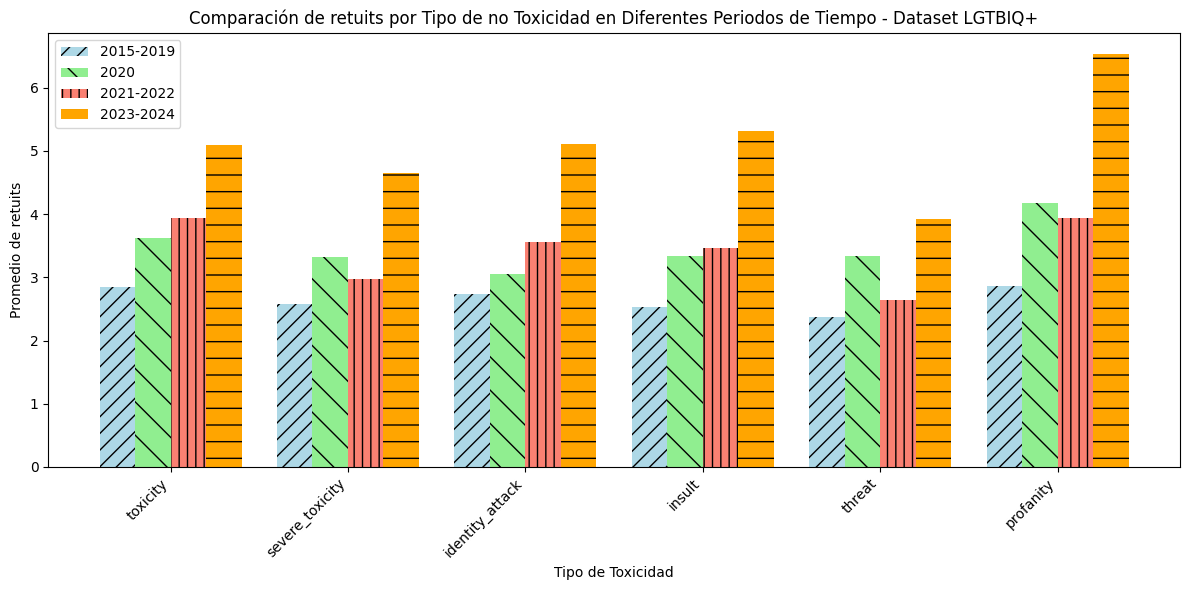

In [53]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_apoyo = []
rts_2020_apoyo = []
rts_2021_2022_apoyo = []
rts_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de tuitss de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean_apoyo = df_2015_2019_apoyo[column]['retweetCount'].mean()
    rts_2020_mean_apoyo = df_2020_apoyo[column]['retweetCount'].mean()
    rts_2021_2022_mean_apoyo = df_2021_2022_apoyo[column]['retweetCount'].mean()
    rts_2023_2024_mean_apoyo = df_2023_2024_apoyo[column]['retweetCount'].mean()
    
    rts_2015_2019_apoyo.append(rts_2015_2019_mean_apoyo)
    rts_2020_apoyo.append(rts_2020_mean_apoyo)
    rts_2021_2022_apoyo.append(rts_2021_2022_mean_apoyo)
    rts_2023_2024_apoyo.append(rts_2023_2024_mean_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de retuits')
ax.set_title('Comparación de retuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Lo mismo para tuits tóxicos del dataset aleatorio

In [54]:
# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019_toe = {}
df_2020_toe = {}
df_2021_2022_toe = {}
df_2023_2024_toe = {}

for column in toxicity_columns:
    df_2015_2019_toe[column], df_2020_toe[column], df_2021_2022_toe[column], df_2023_2024_toe[column] = filter_toxicity(df_aleatorio, column, thresholds)


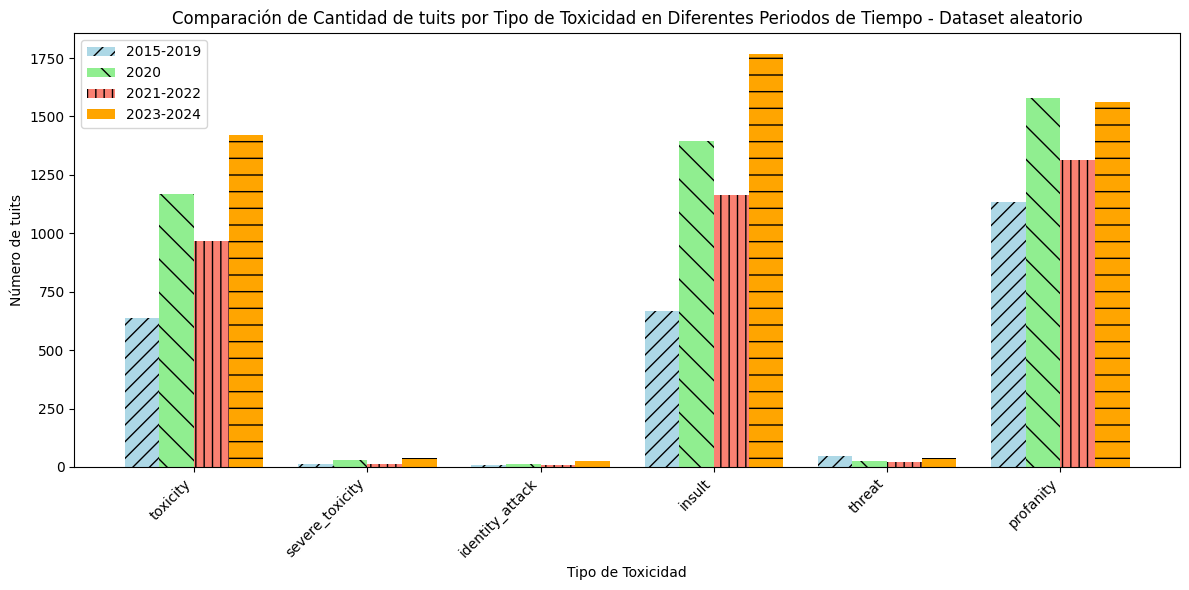

In [55]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_toe = []
lengths_2020_toe = []
lengths_2021_2022_toe = []
lengths_2023_2024_toe = []

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019_toe = len(df_2015_2019_toe[column]) / 5
    len_2020_toe = len(df_2020_toe[column])
    len_2021_2022_toe = len(df_2021_2022_toe[column]) / 2
    len_2023_2024_toe = len(df_2023_2024_toe[column]) / 2
    
    lengths_2015_2019_toe.append(len_2015_2019_toe)
    lengths_2020_toe.append(len_2020_toe)
    lengths_2021_2022_toe.append(len_2021_2022_toe)
    lengths_2023_2024_toe.append(len_2023_2024_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[82.94209702660407, 118.74999999999997, 32.65306122448979, 109.15915915915917, -43.27731092436975, 39.46718419195484]
[-17.194183062446537, -60.71428571428571, -26.923076923076923, -16.475233309404164, -22.22222222222222, -17.014547754585703]
[46.79752066115703, 250.0, 184.21052631578948, 52.084228620541474, 76.19047619047619, 19.20731707317073]


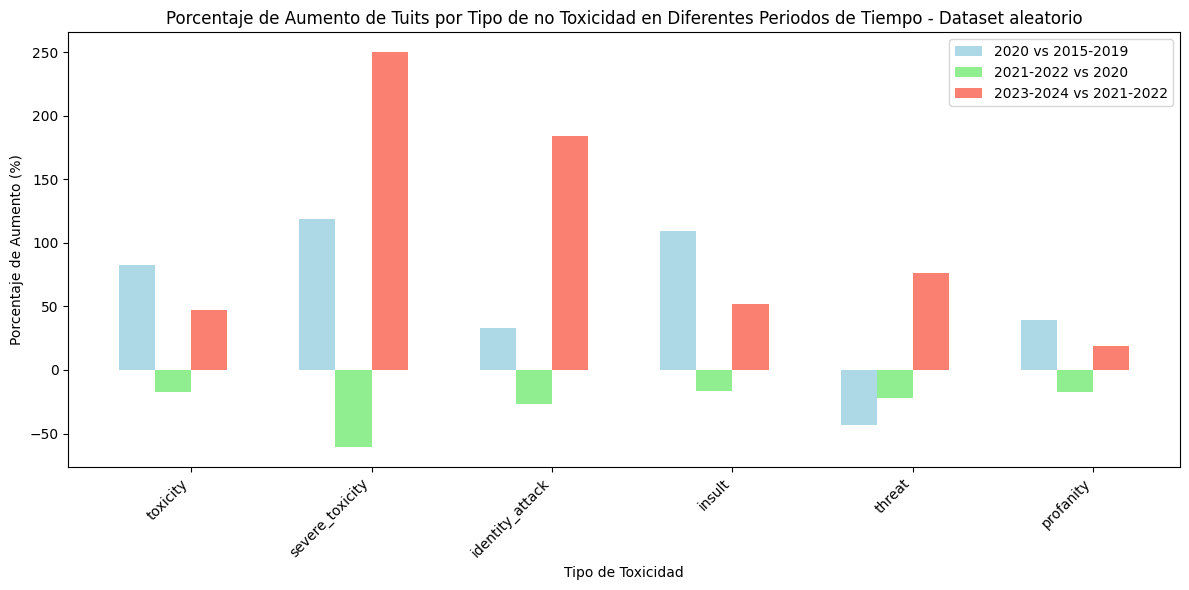

In [56]:
aumento_2020_vs_2015_2019_toe = []
aumento_2021_2022_vs_2020_toe = []
aumento_2023_2024_vs_2021_2022_toe = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_toe.append(calcular_aumento(lengths_2015_2019_toe[i], lengths_2020_toe[i]))
    aumento_2021_2022_vs_2020_toe.append(calcular_aumento(lengths_2020_toe[i], lengths_2021_2022_toe[i]))
    aumento_2023_2024_vs_2021_2022_toe.append(calcular_aumento(lengths_2021_2022_toe[i], lengths_2023_2024_toe[i]))


print(aumento_2020_vs_2015_2019_toe)
print(aumento_2021_2022_vs_2020_toe)
print(aumento_2023_2024_vs_2021_2022_toe)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_toe, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_toe, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_toe, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


aumento megustas

In [57]:
print(calcular_aumento(df_2015_2019_toe['toxicity']['likeCount'].mean(), df_2020_toe['toxicity']['likeCount'].mean()))
print(calcular_aumento(df_2020_toe['toxicity']['likeCount'].mean(), df_2021_2022_toe['toxicity']['likeCount'].mean()))
print(calcular_aumento(df_2021_2022_toe['toxicity']['likeCount'].mean(), df_2023_2024_toe['toxicity']['likeCount'].mean()))

712.332609304104
-89.60810219760647
91.17873679450034


aumento retuits

In [58]:
print(calcular_aumento(df_2015_2019_toe['toxicity']['retweetCount'].mean(), df_2020_toe['toxicity']['retweetCount'].mean()))
print(calcular_aumento(df_2020_toe['toxicity']['retweetCount'].mean(), df_2021_2022_toe['toxicity']['retweetCount'].mean()))
print(calcular_aumento(df_2021_2022_toe['toxicity']['retweetCount'].mean(), df_2023_2024_toe['toxicity']['retweetCount'].mean()))

458.7520493372674
-94.37523099549281
29.45711874528628


In [59]:
data_for_kruskal = [df_2015_2019_toe['toxicity']['likeCount'], df_2020_toe['toxicity']['likeCount'], df_2021_2022_toe['toxicity']['likeCount'], df_2023_2024_toe['toxicity']['likeCount']]
h_statistic, p_value = stats.kruskal(*data_for_kruskal)
print('me gustas',':', p_value)


data_for_kruskal = [df_2015_2019_toe['toxicity']['retweetCount'], df_2020_toe['toxicity']['retweetCount'], df_2021_2022_toe['toxicity']['retweetCount'], df_2023_2024_toe['toxicity']['retweetCount']]
h_statistic, p_value = stats.kruskal(*data_for_kruskal)
print('retuit',':', p_value)

me gustas : 1.4352841731110239e-05
retuit : 5.369263149350558e-19


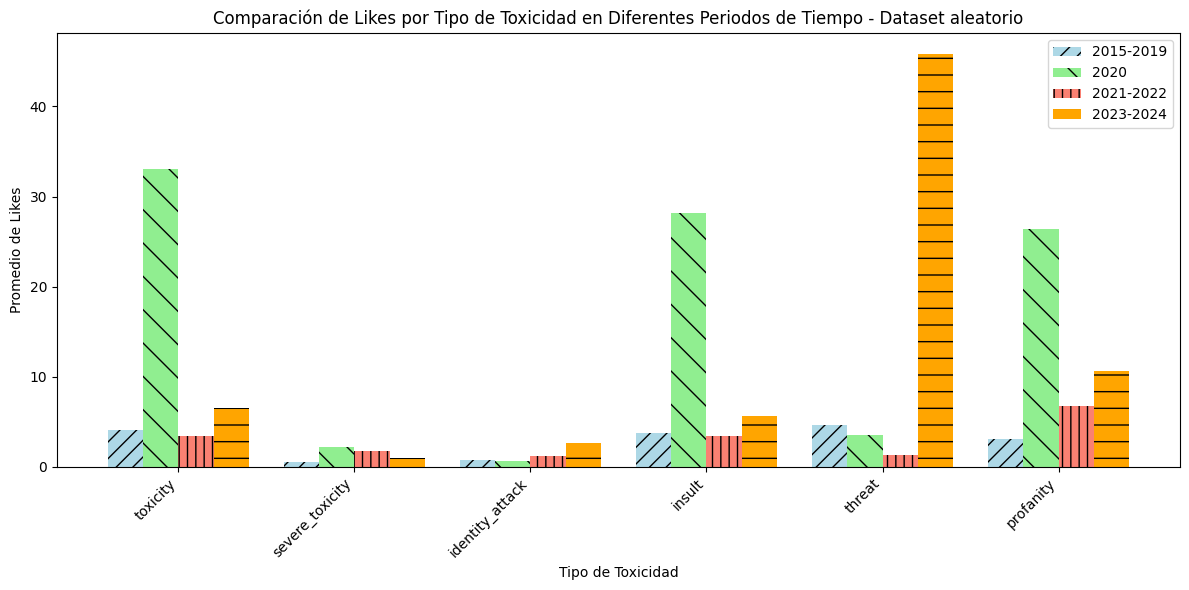

In [60]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_toe = []
mgs_2020_toe = []
mgs_2021_2022_toe = []
mgs_2023_2024_toe = []

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean_toe = df_2015_2019_toe[column]['likeCount'].mean()
    mgs_2020_mean_toe = df_2020_toe[column]['likeCount'].mean()
    mgs_2021_2022_mean_toe = df_2021_2022_toe[column]['likeCount'].mean()
    mgs_2023_2024_mean_toe = df_2023_2024_toe[column]['likeCount'].mean()
    
    mgs_2015_2019_toe.append(mgs_2015_2019_mean_toe)
    mgs_2020_toe.append(mgs_2020_mean_toe)
    mgs_2021_2022_toe.append(mgs_2021_2022_mean_toe)
    mgs_2023_2024_toe.append(mgs_2023_2024_mean_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

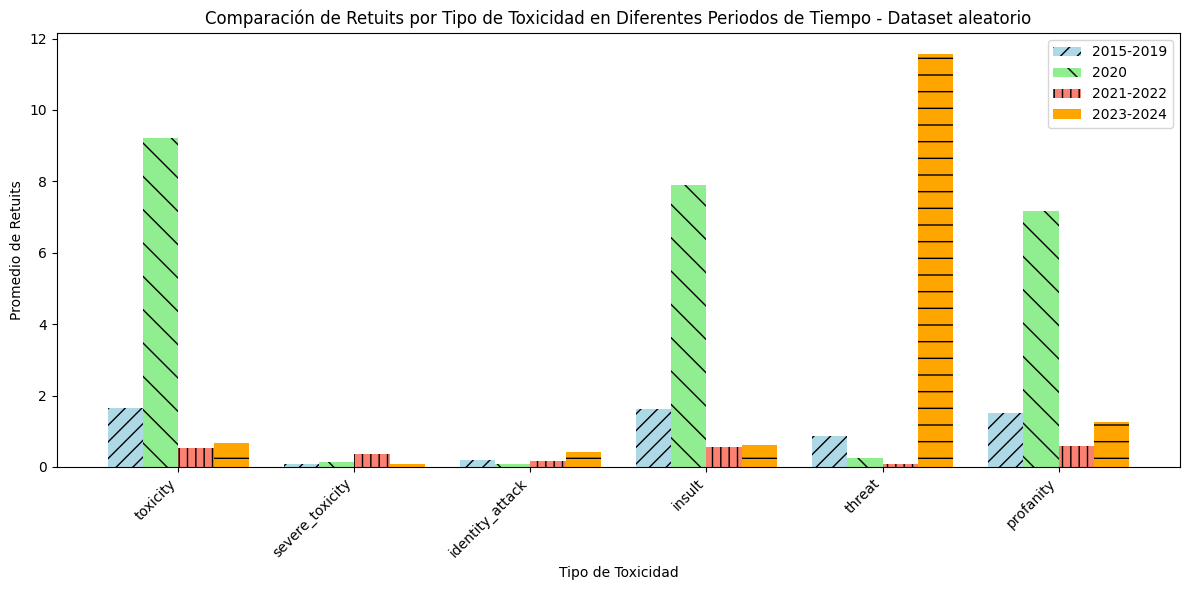

In [61]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_toe = []
rts_2020_toe = []
rts_2021_2022_toe = []
rts_2023_2024_toe = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de retuits de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean_toe = df_2015_2019_toe[column]['retweetCount'].mean()
    rts_2020_mean_toe = df_2020_toe[column]['retweetCount'].mean()
    rts_2021_2022_mean_toe = df_2021_2022_toe[column]['retweetCount'].mean()
    rts_2023_2024_mean_toe = df_2023_2024_toe[column]['retweetCount'].mean()
    
    rts_2015_2019_toe.append(rts_2015_2019_mean_toe)
    rts_2020_toe.append(rts_2020_mean_toe)
    rts_2021_2022_toe.append(rts_2021_2022_mean_toe)
    rts_2023_2024_toe.append(rts_2023_2024_mean_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Retuits')
ax.set_title('Comparación de Retuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

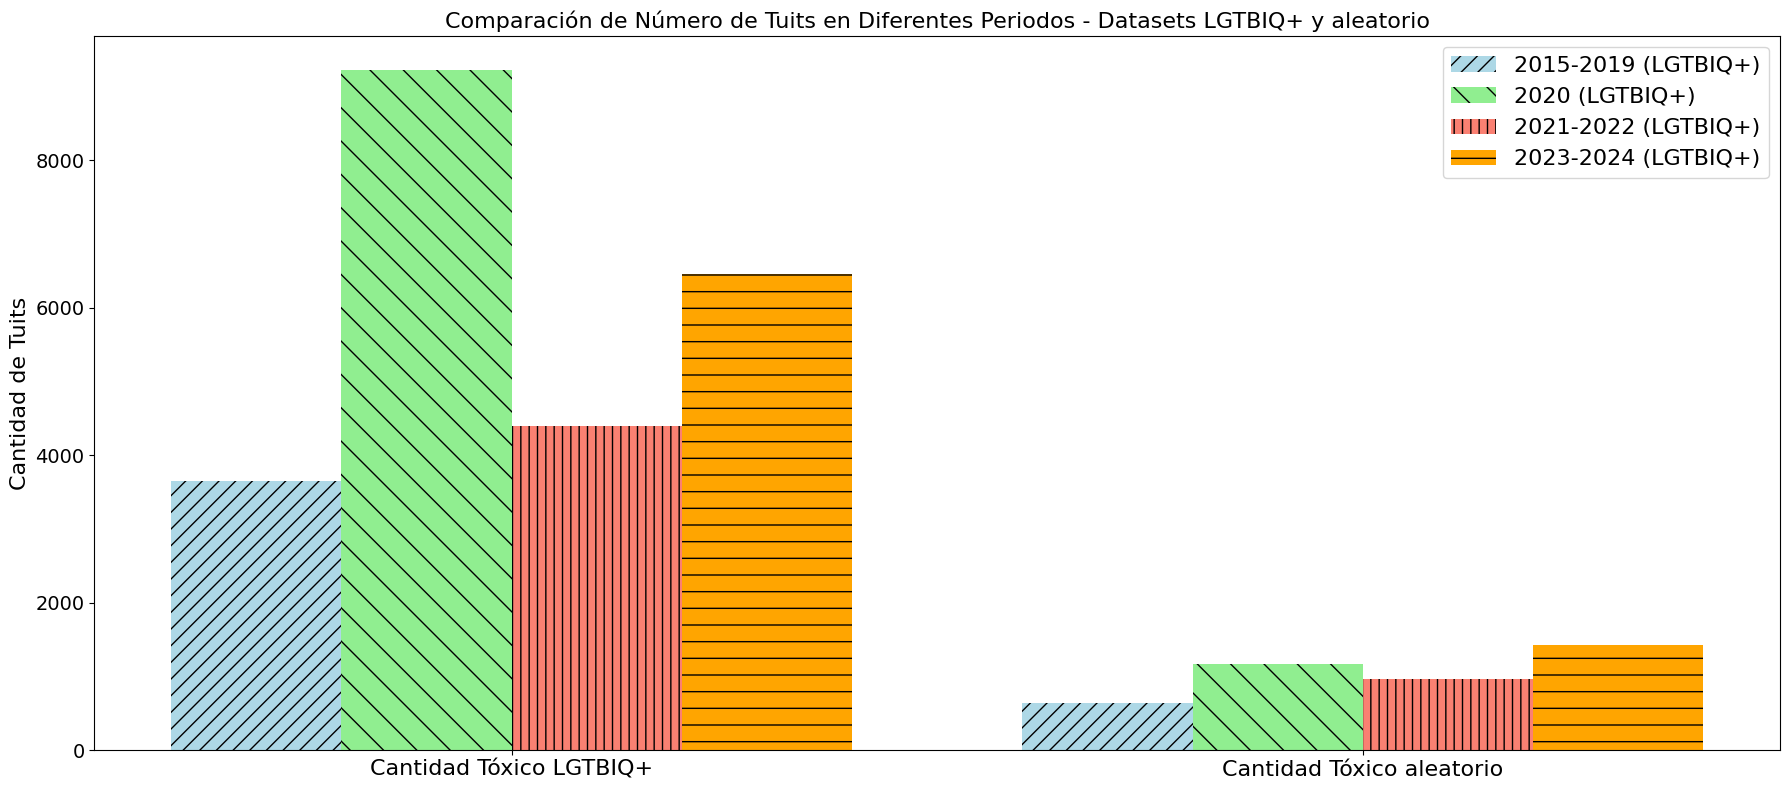

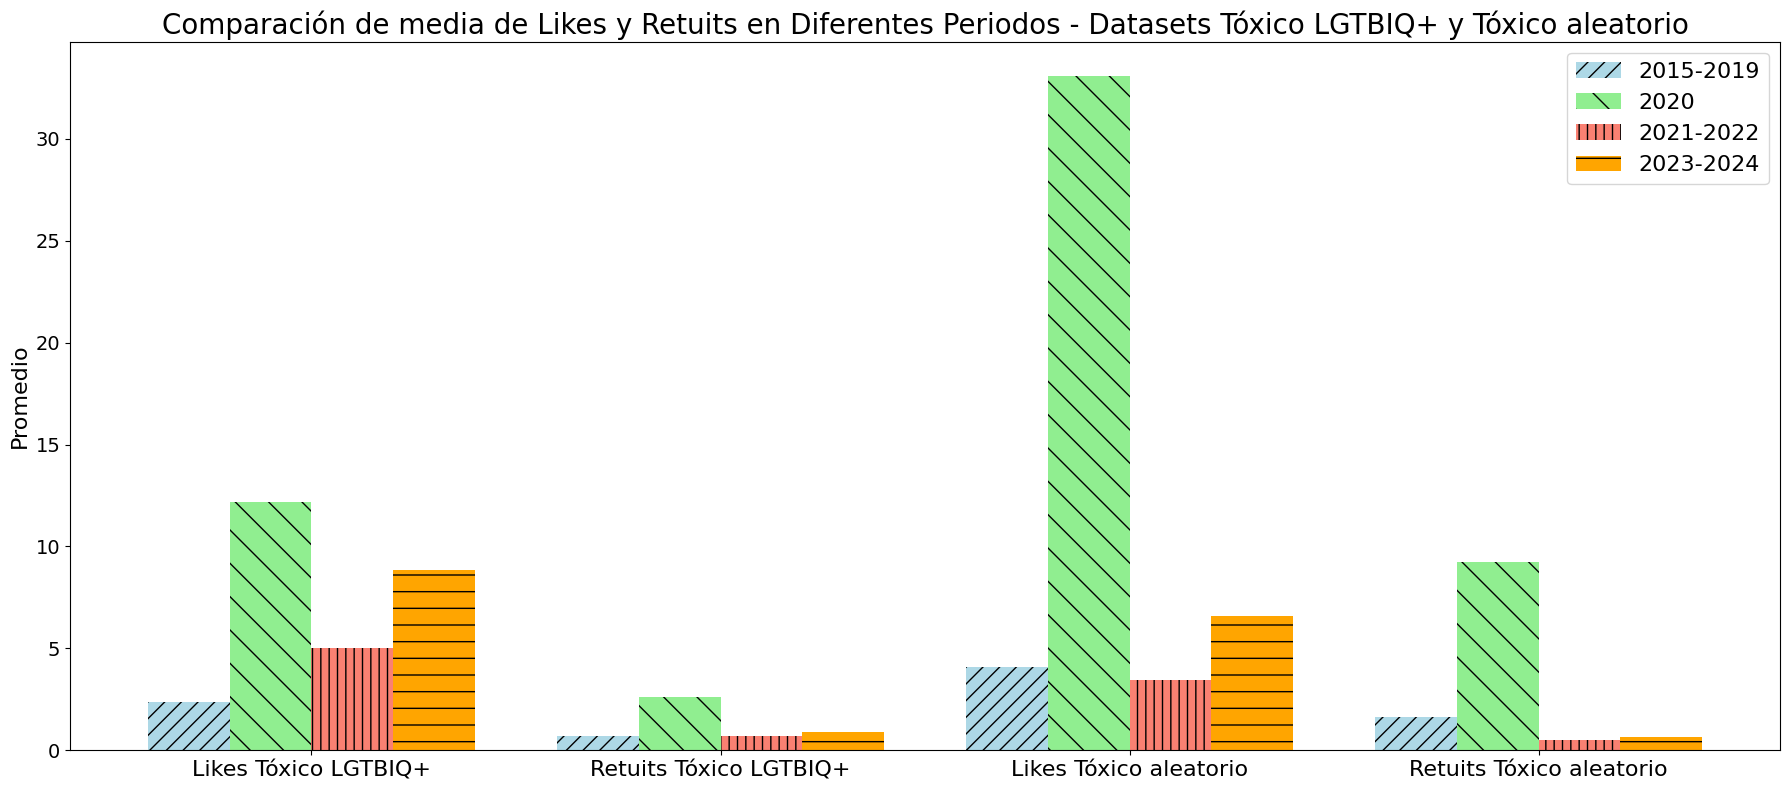

In [62]:
# Crear la figura y los ejes para la comparación de los números de tuits (longitudes)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(2)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear las barras para cada grupo de años para el número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019[0], lengths_2015_2019_toe[0]], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020[0], lengths_2020_toe[0]], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022[0], lengths_2021_2022_toe[0]], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024[0], lengths_2023_2024_toe[0]], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de números de tuits
ax1.set_xlabel(None)
ax1.set_ylabel('Cantidad de Tuits', fontsize=16)
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Datasets LGTBIQ+ y aleatorio', fontsize=16)
ax1.set_xticks(x1)
ax1.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax1.set_xticklabels(['Cantidad Tóxico LGTBIQ+', 'Cantidad Tóxico aleatorio'], fontsize=16)
ax1.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
fig2, ax2 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para likes y retuits
x2 = np.arange(4)  # Dos barras para Likes y Retuits

# Crear las barras para cada grupo de años para likes y retuits (Dataset LGTBIQ+)
rects9 = ax2.bar(x2 - width*1.5, [mgs_2015_2019[0], rts_2015_2019[0], mgs_2015_2019_toe[0], rts_2015_2019_toe[0]], width, label='2015-2019', color='lightblue', hatch='//')
rects10 = ax2.bar(x2 - width/2, [mgs_2020[0], rts_2020[0], mgs_2020_toe[0], rts_2020_toe[0]], width, label='2020', color='lightgreen', hatch='\\')
rects11 = ax2.bar(x2 + width/2, [mgs_2021_2022[0], rts_2021_2022[0], mgs_2021_2022_toe[0], rts_2021_2022_toe[0]], width, label='2021-2022', color='salmon', hatch='||')
rects12 = ax2.bar(x2 + width*1.5, [mgs_2023_2024[0], rts_2023_2024[0], mgs_2023_2024_toe[0], rts_2023_2024_toe[0]], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de likes y retuits
ax2.set_xlabel(None)
ax2.set_ylabel('Promedio', fontsize=16)
ax2.set_title('Comparación de media de Likes y Retuits en Diferentes Periodos - Datasets Tóxico LGTBIQ+ y Tóxico aleatorio', fontsize=20)
ax2.set_xticks(x2)
ax2.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax2.set_xticklabels(['Likes Tóxico LGTBIQ+', 'Retuits Tóxico LGTBIQ+', 'Likes Tóxico aleatorio', 'Retuits Tóxico aleatorio'], fontsize=16)
ax2.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


ahora mostramos la situacion de los tuits relacionados con el colectivo en general

In [63]:
# Filtrar el DataFrame en los diferentes grupos de años
df_2015_2019_o = df_orgullo[(df_orgullo['year'] >= 2015) & (df_orgullo['year'] <= 2019)]
df_2020_o = df_orgullo[df_orgullo['year'] == 2020]
df_2021_2022_o = df_orgullo[(df_orgullo['year'] >= 2021) & (df_orgullo['year'] <= 2022)]
df_2023_2024_o = df_orgullo[(df_orgullo['year'] >= 2023) & (df_orgullo['year'] <= 2024)]

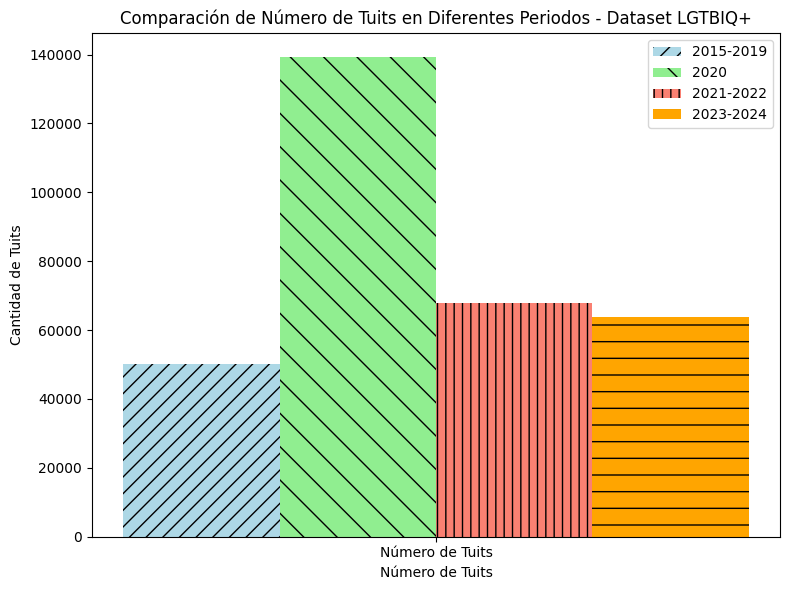

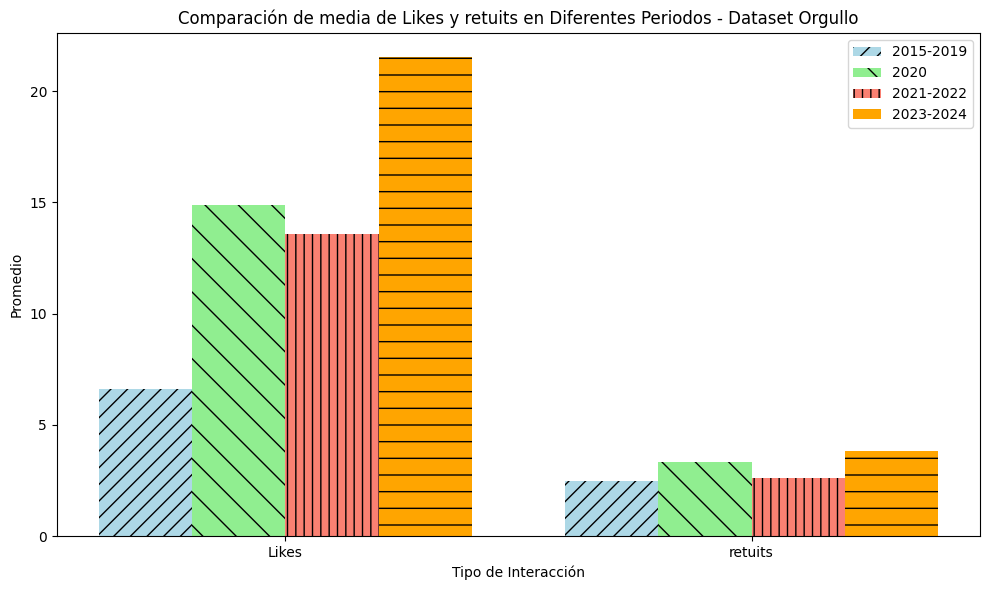

In [64]:
# Calcular la longitud de los DataFrames para cada grupo de años
lengths_2015_2019_o = len(df_2015_2019_o) / 5
lengths_2020_o = len(df_2020_o)
lengths_2021_2022_o = len(df_2021_2022_o) / 2
lengths_2023_2024_o = len(df_2023_2024_o) / 2

# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_o = df_2015_2019_o['likeCount'].mean()
mgs_2020_o = df_2020_o['likeCount'].mean()
mgs_2021_2022_o = df_2021_2022_o['likeCount'].mean()
mgs_2023_2024_o = df_2023_2024_o['likeCount'].mean()

rts_2015_2019_o = df_2015_2019_o['retweetCount'].mean()
rts_2020_o = df_2020_o['retweetCount'].mean()
rts_2021_2022_o = df_2021_2022_o['retweetCount'].mean()
rts_2023_2024_o = df_2023_2024_o['retweetCount'].mean()

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(1)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear la figura para la comparación de número de tuits
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Crear las barras para cada grupo de años para número de tuits
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_o], width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_o], width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_o], width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_o], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 1
ax1.set_xlabel('Número de Tuits')
ax1.set_ylabel('Cantidad de Tuits')
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Dataset LGTBIQ+')
ax1.set_xticks(x1)
ax1.set_xticklabels(['Número de Tuits'])
ax1.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o, rts_2015_2019_o], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_o, rts_2020_o], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_o, rts_2021_2022_o], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o, rts_2023_2024_o], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Promedio')
ax2.set_title('Comparación de media de Likes y retuits en Diferentes Periodos - Dataset Orgullo')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


<Figure size 1000x800 with 0 Axes>

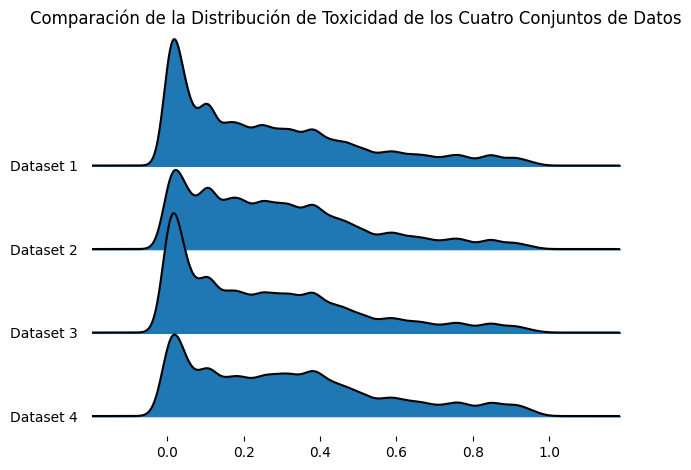

In [65]:
# Assuming the four datasets are stored in a list (or directly)
distribuciones = [
    df_2015_2019_o['toxicity'].values,
    df_2020_o['toxicity'].values,
    df_2021_2022_o['toxicity'].values,
    df_2023_2024_o['toxicity'].values
]

# Create the Joy Plot
plt.figure(figsize=(10, 8))
joypy.joyplot(distribuciones, 
        labels=['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4'],  # Custom labels for each dataset
        title="Comparación de la Distribución de Toxicidad de los Cuatro Conjuntos de Datos")  # Title
plt.show()


In [66]:
# Agrupar los datos por año
tuits_por_año_blue_apoyo = df_filtered_apoyo['toxicity'][df_filtered_apoyo['toxicity']['author_blue_verified'] == True].groupby('year').size()

# Crear las listas para la prueba de Kruskal-Wallis
data_for_kruskal = [
    [tuits_por_año_blue_apoyo[2015], tuits_por_año_blue_apoyo[2016], tuits_por_año_blue_apoyo[2017], tuits_por_año_blue_apoyo[2018], tuits_por_año_blue_apoyo[2019]],  # 2015-2019
    [tuits_por_año_blue_apoyo[2020]],  # 2020
    [tuits_por_año_blue_apoyo[2021], tuits_por_año_blue_apoyo[2022]],  # 2021-2022
    [tuits_por_año_blue_apoyo[2023], tuits_por_año_blue_apoyo[2024]]  # 2023-2024
]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")


Estadística H: 5.269090909090906
Valor p: 0.15312065607097727
No hay diferencias significativas entre los periodos en términos de toxicidad.


In [67]:
# Filtrar el DataFrame en los diferentes grupos de años
df_2015_2019_e = df_aleatorio[(df_aleatorio['year'] >= 2015) & (df_aleatorio['year'] <= 2019)]
df_2020_e = df_aleatorio[df_aleatorio['year'] == 2020]
df_2021_2022_e = df_aleatorio[(df_aleatorio['year'] >= 2021) & (df_aleatorio['year'] <= 2022)]
df_2023_2024_e = df_aleatorio[(df_aleatorio['year'] >= 2023) & (df_aleatorio['year'] <= 2024)]

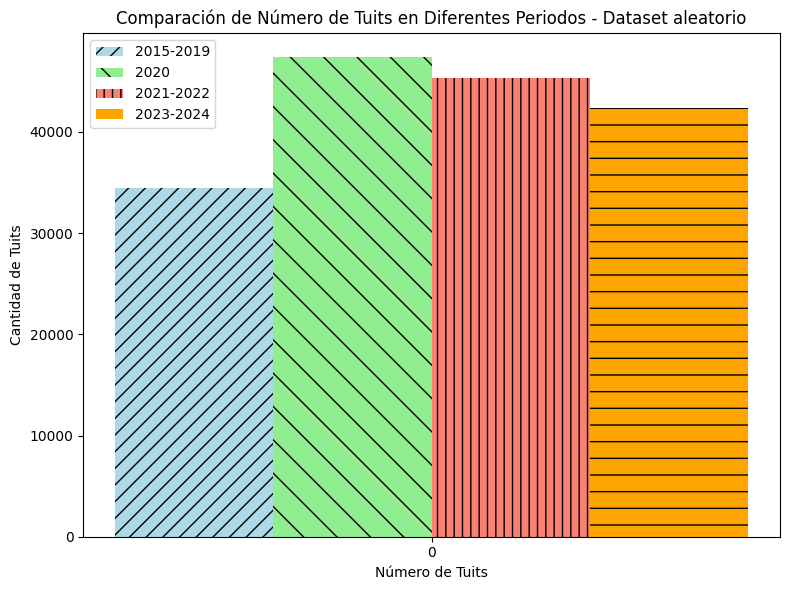

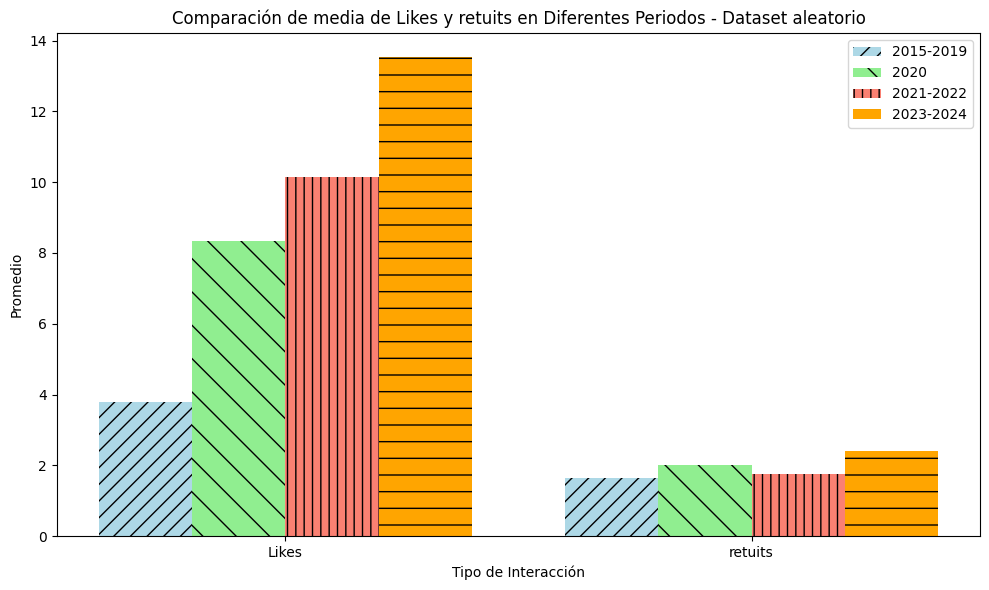

In [68]:
# Calcular la longitud de los DataFrames para cada grupo de años
lengths_2015_2019_e = len(df_2015_2019_e) / 5
lengths_2020_e = len(df_2020_e)
lengths_2021_2022_e = len(df_2021_2022_e) / 2
lengths_2023_2024_e = len(df_2023_2024_e) / 2

# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_e = df_2015_2019_e['likeCount'].mean()
mgs_2020_e = df_2020_e['likeCount'].mean()
mgs_2021_2022_e = df_2021_2022_e['likeCount'].mean()
mgs_2023_2024_e = df_2023_2024_e['likeCount'].mean()

rts_2015_2019_e = df_2015_2019_e['retweetCount'].mean()
rts_2020_e = df_2020_e['retweetCount'].mean()
rts_2021_2022_e = df_2021_2022_e['retweetCount'].mean()
rts_2023_2024_e = df_2023_2024_e['retweetCount'].mean()

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(1)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear la figura para la comparación de número de tuits
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Crear las barras para cada grupo de años para número de tuits
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_e], width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_e], width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_e], width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_e], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 1
ax1.set_xlabel('Número de Tuits')
ax1.set_ylabel('Cantidad de Tuits')
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Dataset aleatorio')
ax1.set_xticks(x1)
ax1.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_e, rts_2015_2019_e], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_e, rts_2020_e], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_e, rts_2021_2022_e], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_e, rts_2023_2024_e], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Promedio')
ax2.set_title('Comparación de media de Likes y retuits en Diferentes Periodos - Dataset aleatorio')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


porcentajes orgullo

In [69]:
print(calcular_aumento(df_2015_2019_o['likeCount'].mean(), df_2020_o['likeCount'].mean()))
print(calcular_aumento(df_2020_o['likeCount'].mean(), df_2021_2022_o['likeCount'].mean()))
print(calcular_aumento(df_2021_2022_o['likeCount'].mean(), df_2023_2024_o['likeCount'].mean()))

125.49240440770939
-8.883675028526298
58.68320385688336


In [70]:
print(calcular_aumento(df_2015_2019_o['retweetCount'].mean(), df_2020_o['retweetCount'].mean()))
print(calcular_aumento(df_2020_o['retweetCount'].mean(), df_2021_2022_o['retweetCount'].mean()))
print(calcular_aumento(df_2021_2022_o['retweetCount'].mean(), df_2023_2024_o['retweetCount'].mean()))

34.2549610255259
-21.949300706580832
47.557142578380954


porcentajes dataset aleatorio

In [71]:
print(calcular_aumento(df_2015_2019_e['likeCount'].mean(), df_2020_e['likeCount'].mean()))
print(calcular_aumento(df_2020_e['likeCount'].mean(), df_2021_2022_e['likeCount'].mean()))
print(calcular_aumento(df_2021_2022_e['likeCount'].mean(), df_2023_2024_e['likeCount'].mean()))

120.42526688400197
21.827371107416408
33.4400502508266


In [72]:
print(calcular_aumento(df_2015_2019_e['retweetCount'].mean(), df_2020_e['retweetCount'].mean()))
print(calcular_aumento(df_2020_e['retweetCount'].mean(), df_2021_2022_e['retweetCount'].mean()))
print(calcular_aumento(df_2021_2022_e['retweetCount'].mean(), df_2023_2024_e['retweetCount'].mean()))

23.56019130058577
-13.359355553225342
38.47466386632446


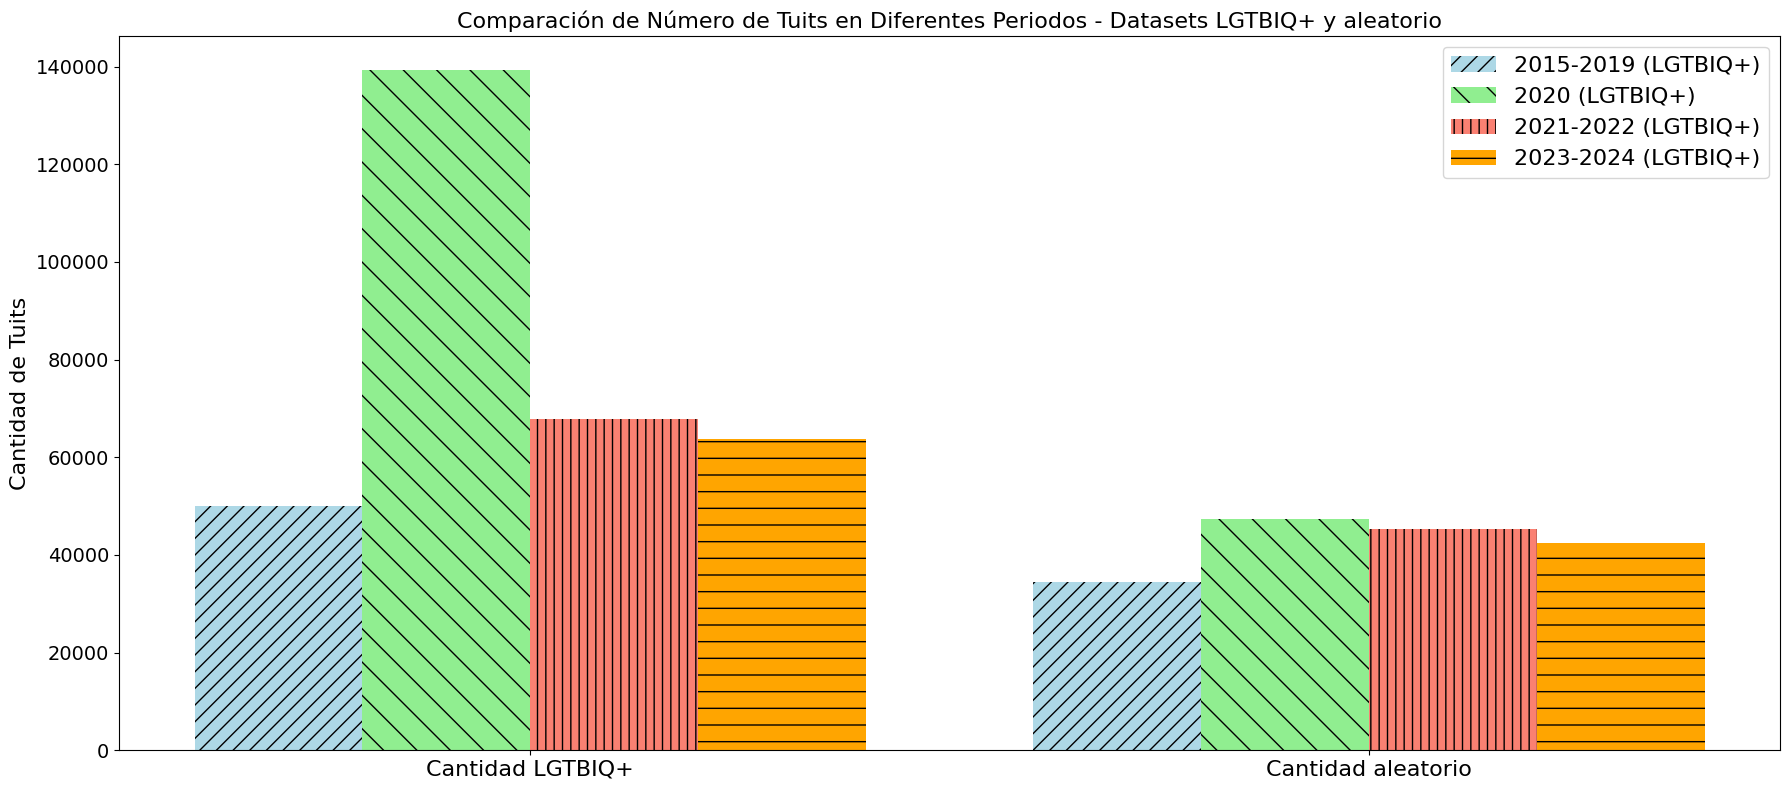

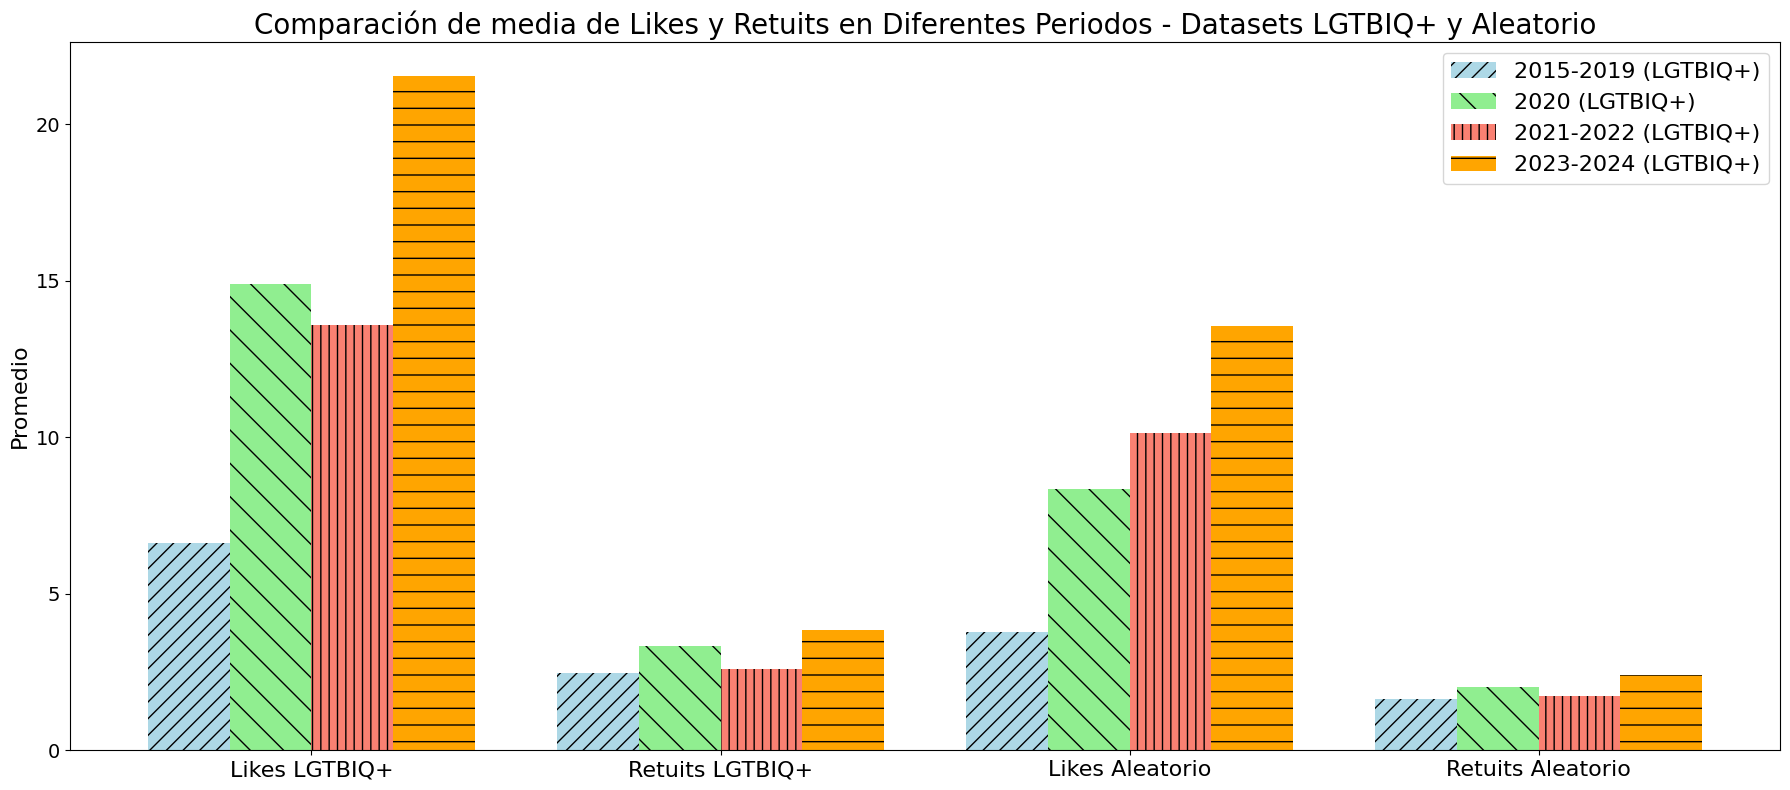

In [73]:
# Crear la figura y los ejes para la comparación de los números de tuits (longitudes)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(2)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear las barras para cada grupo de años para el número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_o, lengths_2015_2019_e], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_o, lengths_2020_e], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_o, lengths_2021_2022_e], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_o, lengths_2023_2024_e], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de números de tuits
ax1.set_xlabel(None)
ax1.set_ylabel('Cantidad de Tuits', fontsize=16)
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Datasets LGTBIQ+ y aleatorio', fontsize=16)
ax1.set_xticks(x1)
ax1.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax1.set_xticklabels(['Cantidad LGTBIQ+', 'Cantidad aleatorio'], fontsize=16)
ax1.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
fig2, ax2 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para likes y retuits
x2 = np.arange(4)  # Dos barras para Likes y Retuits

# Crear las barras para cada grupo de años para likes y retuits (Dataset LGTBIQ+)
rects9 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o, rts_2015_2019_o, mgs_2015_2019_e, rts_2015_2019_e], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects10 = ax2.bar(x2 - width/2, [mgs_2020_o, rts_2020_o, mgs_2020_e, rts_2020_e], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects11 = ax2.bar(x2 + width/2, [mgs_2021_2022_o, rts_2021_2022_o, mgs_2021_2022_e, rts_2021_2022_e], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects12 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o, rts_2023_2024_o, mgs_2023_2024_e, rts_2023_2024_e], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de likes y retuits
ax2.set_xlabel(None)
ax2.set_ylabel('Promedio', fontsize=16)
ax2.set_title('Comparación de media de Likes y Retuits en Diferentes Periodos - Datasets LGTBIQ+ y Aleatorio', fontsize=20)
ax2.set_xticks(x2)
ax2.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax2.set_xticklabels(['Likes LGTBIQ+', 'Retuits LGTBIQ+', 'Likes Aleatorio', 'Retuits Aleatorio'], fontsize=16)
ax2.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


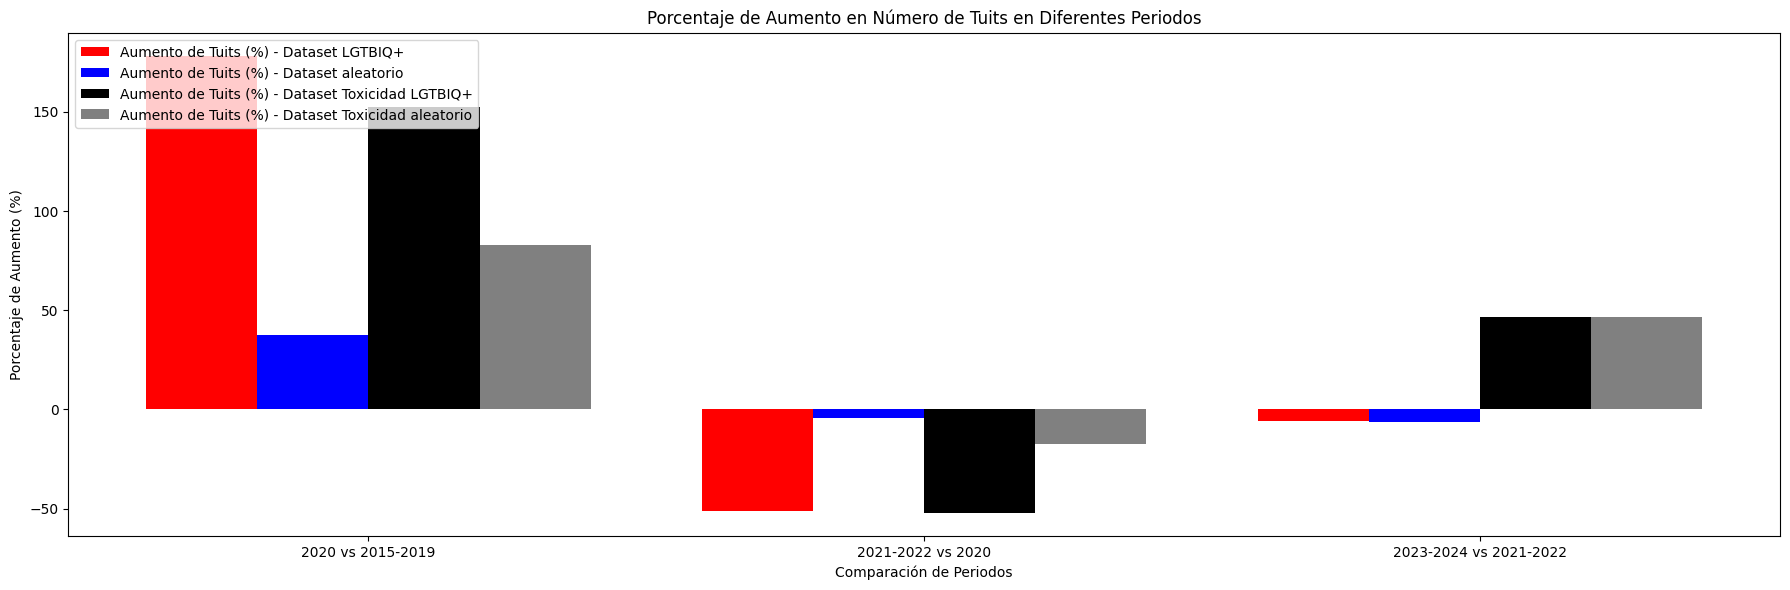

In [74]:
# Cálculo del aumento en el número de tuits (datos 'o')
aumento_2020_vs_2015_2019_tuits_o = calcular_aumento(lengths_2015_2019_o, lengths_2020_o)
aumento_2021_2022_vs_2020_tuits_o = calcular_aumento(lengths_2020_o, lengths_2021_2022_o)
aumento_2023_2024_vs_2021_2022_tuits_o = calcular_aumento(lengths_2021_2022_o, lengths_2023_2024_o)

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_e = calcular_aumento(lengths_2015_2019_e, lengths_2020_e)
aumento_2021_2022_vs_2020_tuits_e = calcular_aumento(lengths_2020_e, lengths_2021_2022_e)
aumento_2023_2024_vs_2021_2022_tuits_e = calcular_aumento(lengths_2021_2022_e, lengths_2023_2024_e)

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits = calcular_aumento(lengths_2015_2019[0], lengths_2020[0])
aumento_2021_2022_vs_2020_tuits = calcular_aumento(lengths_2020[0], lengths_2021_2022[0])
aumento_2023_2024_vs_2021_2022_tuits = calcular_aumento(lengths_2021_2022[0], lengths_2023_2024[0])

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_toe = calcular_aumento(lengths_2015_2019_toe[0], lengths_2020_toe[0])
aumento_2021_2022_vs_2020_tuits_toe = calcular_aumento(lengths_2020_toe[0], lengths_2021_2022_toe[0])
aumento_2023_2024_vs_2021_2022_tuits_toe = calcular_aumento(lengths_2021_2022_toe[0], lengths_2023_2024_toe[0])

# Crear los datos para la visualización de los aumentos de tuits
aumentos_tuits_o = [aumento_2020_vs_2015_2019_tuits_o, aumento_2021_2022_vs_2020_tuits_o, aumento_2023_2024_vs_2021_2022_tuits_o]
aumentos_tuits_e = [aumento_2020_vs_2015_2019_tuits_e, aumento_2021_2022_vs_2020_tuits_e, aumento_2023_2024_vs_2021_2022_tuits_e]
aumentos_tuits = [aumento_2020_vs_2015_2019_tuits, aumento_2021_2022_vs_2020_tuits, aumento_2023_2024_vs_2021_2022_tuits]
aumentos_tuits_toe = [aumento_2020_vs_2015_2019_tuits_toe, aumento_2021_2022_vs_2020_tuits_toe, aumento_2023_2024_vs_2021_2022_tuits_toe]

# Configuración de las posiciones de las barras para comparar los aumentos
x1 = np.arange(3)  # Tres barras (una por cada comparación de aumento)
width = 0.2  # Ancho de las barras

# Crear la figura para los aumentos de número de tuits y longitudes de los tuits en 2015-2019
fig, ax1 = plt.subplots(figsize=(18, 6))

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - 1.5 * width, aumentos_tuits_o, width, label='Aumento de Tuits (%) - Dataset LGTBIQ+', color='r')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset aleatorio)
rects2 = ax1.bar(x1 - 0.5 * width, aumentos_tuits_e, width, label='Aumento de Tuits (%) - Dataset aleatorio', color='b')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset Toxicidad LGTBIQ+)
rects3 = ax1.bar(x1 + 0.5 * width, aumentos_tuits, width, label='Aumento de Tuits (%) - Dataset Toxicidad LGTBIQ+', color='black')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset Toxicidad aleatorio)
rects4 = ax1.bar(x1 + 1.5 * width, aumentos_tuits_toe, width, label='Aumento de Tuits (%) - Dataset Toxicidad aleatorio', color='gray')

# Añadir etiquetas y título para la figura
ax1.set_xlabel('Comparación de Periodos')
ax1.set_ylabel('Porcentaje de Aumento (%)')
ax1.set_title('Porcentaje de Aumento en Número de Tuits en Diferentes Periodos')
ax1.set_xticks(x1)
ax1.set_xticklabels(['2020 vs 2015-2019', '2021-2022 vs 2020', '2023-2024 vs 2021-2022'])

# Añadir las leyendas
ax1.legend(loc='upper left')

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [75]:
# Imprimir los porcentajes de aumento
print("Porcentaje de aumento de tuits - Dataset LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_o:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_o:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_o:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset aleatorio:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_e:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_e:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_e:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset Toxicidad LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset Toxicidad aleatorio:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_toe:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_toe:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_toe:.2f}%")

Porcentaje de aumento de tuits - Dataset LGTBIQ+:
2020 vs 2015-2019: 178.34%
2021-2022 vs 2020: -51.26%
2023-2024 vs 2021-2022: -6.03%

Porcentaje de aumento de tuits - Dataset aleatorio:
2020 vs 2015-2019: 37.56%
2021-2022 vs 2020: -4.44%
2023-2024 vs 2021-2022: -6.51%

Porcentaje de aumento de tuits - Dataset Toxicidad LGTBIQ+:
2020 vs 2015-2019: 152.56%
2021-2022 vs 2020: -52.35%
2023-2024 vs 2021-2022: 46.81%

Porcentaje de aumento de tuits - Dataset Toxicidad aleatorio:
2020 vs 2015-2019: 82.94%
2021-2022 vs 2020: -17.19%
2023-2024 vs 2021-2022: 46.80%


In [76]:
# Imprimir los porcentajes de aumento
print("Porcentaje de aumento de tuits - Dataset O:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_o:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_o:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_o:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset E:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_e:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_e:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_e:.2f}%")

Porcentaje de aumento de tuits - Dataset O:
2020 vs 2015-2019: 178.34%
2021-2022 vs 2020: -51.26%
2023-2024 vs 2021-2022: -6.03%

Porcentaje de aumento de tuits - Dataset E:
2020 vs 2015-2019: 37.56%
2021-2022 vs 2020: -4.44%
2023-2024 vs 2021-2022: -6.51%


cantidad con respecto al total

In [77]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_t = []
lengths_2020_t = []
lengths_2021_2022_t = []
lengths_2023_2024_t = []

# Calcular las longitudes de cada columna en los dataframes
for i in range(0,len(toxicity_columns)):
    len_2015_2019_t = lengths_2015_2019[i] / lengths_2015_2019_o
    len_2020_t = lengths_2020[i] / lengths_2020_o
    len_2021_2022_t = lengths_2021_2022[i] / lengths_2021_2022_o
    len_2023_2024_t = lengths_2023_2024[i] / lengths_2023_2024_o
    
    lengths_2015_2019_t.append(len_2015_2019_t)
    lengths_2020_t.append(len_2020_t)
    lengths_2021_2022_t.append(len_2021_2022_t)
    lengths_2023_2024_t.append(len_2023_2024_t)

Aumento de longitudes entre 2015-2019 y 2020:
[-9.262538183086882, -8.397850088470543, -4.833535459677498, -5.4343080816596245, -21.559215264070815, -12.67010446075368]

Aumento de longitudes entre 2020 y 2021-2022:
[-2.2322401012353015, -43.70600478526783, -0.7000475201557629, -5.00993532796358, -56.925774473211845, -1.2213904083650422]

Aumento de longitudes entre 2021-2022 y 2023-2024:
[56.232138341660374, 232.4669360759885, 83.29635074955904, 64.34760207992456, 76.06780337164695, 34.114410455510594]


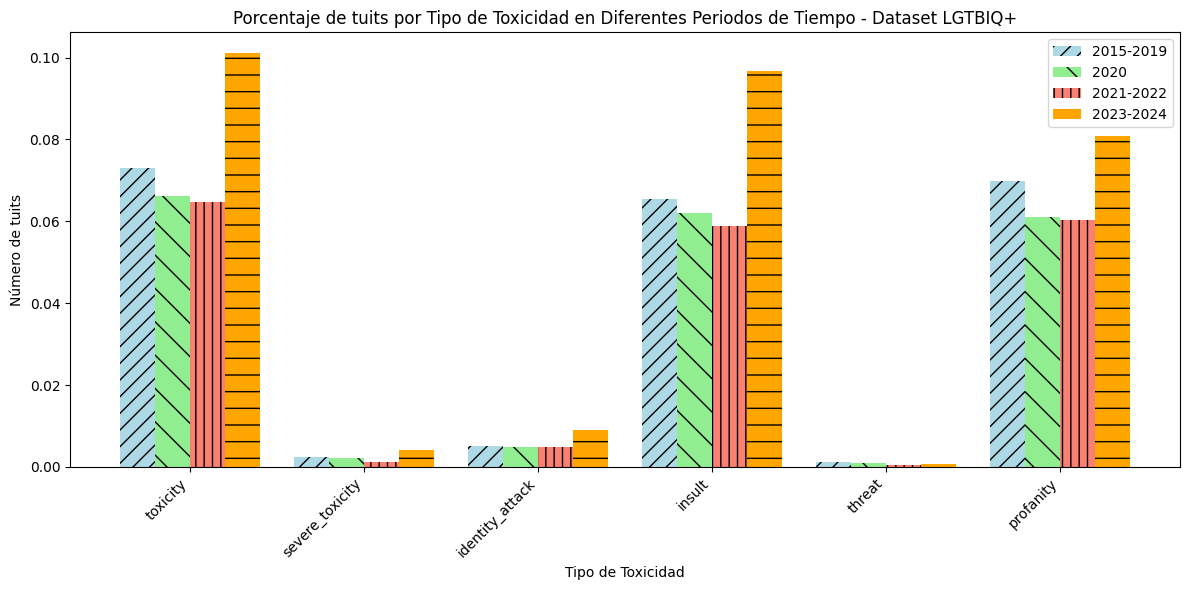

In [78]:
# Calcular el aumento en las longitudes de los tuits
aumento_2015_2019_vs_2020 = [(lengths_2020_t[i] - lengths_2015_2019_t[i]) / lengths_2015_2019_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022 = [(lengths_2021_2022_t[i] - lengths_2020_t[i]) / lengths_2020_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024 = [(lengths_2023_2024_t[i] - lengths_2021_2022_t[i]) / lengths_2021_2022_t[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de longitudes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020)

print("\nAumento de longitudes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022)

print("\nAumento de longitudes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_t, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_t, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_t, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_t, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Porcentaje de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [79]:
print(lengths_2015_2019_toe)

[639.0, 12.8, 9.8, 666.0, 47.6, 1133.6]


Aumento de longitudes entre 2015-2019 y 2020:
[32.9902929565847, 59.02095284292221, -3.5674688299480737, 52.048863018577876, -58.765275133167826, 1.3860778081096818]

Aumento de longitudes entre 2020 y 2021-2022:
[-13.346341004600818, -58.8887470107055, -23.527319614319314, -12.59398290901023, -18.608024384831086, -13.158358356924674]

Aumento de longitudes entre 2021-2022 y 2023-2024:
[57.01313803286765, 274.3564473295957, 203.98869407215295, 62.66774720356552, 88.45154491421827, 27.502936329156746]


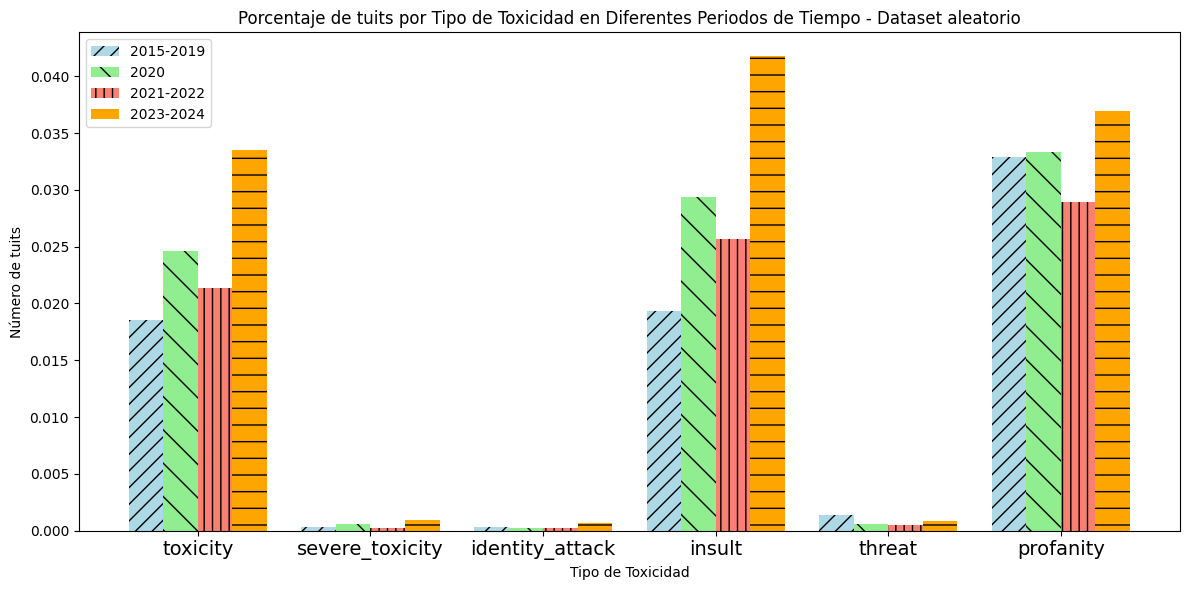

In [80]:
# Calcular la longi_ttud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_toe_t = []
lengths_2020_toe_t = []
lengths_2021_2022_toe_t = []
lengths_2023_2024_toe_t = []

# Calcular las longitudes de cada columna en los dataframes
for i in range(0,len(toxicity_columns)):
    len_2015_2019_toe_t = lengths_2015_2019_toe[i] / lengths_2015_2019_e
    len_2020_toe_t = lengths_2020_toe[i] / lengths_2020_e
    len_2021_2022_toe_t = lengths_2021_2022_toe[i] / lengths_2021_2022_e
    len_2023_2024_toe_t = lengths_2023_2024_toe[i] / lengths_2023_2024_e
    
    lengths_2015_2019_toe_t.append(len_2015_2019_toe_t)
    lengths_2020_toe_t.append(len_2020_toe_t)
    lengths_2021_2022_toe_t.append(len_2021_2022_toe_t)
    lengths_2023_2024_toe_t.append(len_2023_2024_toe_t)

# Calcular el aumento en las longitudes de los tuits
aumento_2015_2019_vs_2020_toe_t = [(lengths_2020_toe_t[i] - lengths_2015_2019_toe_t[i]) / lengths_2015_2019_toe_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_toe_t = [(lengths_2021_2022_toe_t[i] - lengths_2020_toe_t[i]) / lengths_2020_toe_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_toe_t = [(lengths_2023_2024_toe_t[i] - lengths_2021_2022_toe_t[i]) / lengths_2021_2022_toe_t[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de longitudes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_toe_t)

print("\nAumento de longitudes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_toe_t)

print("\nAumento de longitudes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_toe_t)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_toe_t, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_toe_t, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_toe_t, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_toe_t, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Porcentaje de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, fontsize=14)
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [81]:
aumento_2020_vs_2015_2019_t = []
aumento_2021_2022_vs_2020_t = []
aumento_2023_2024_vs_2021_2022_t = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_t.append(calcular_aumento(lengths_2015_2019_t[i], lengths_2020_t[i]))
    aumento_2021_2022_vs_2020_t.append(calcular_aumento(lengths_2020_t[i], lengths_2021_2022_t[i]))
    aumento_2023_2024_vs_2021_2022_t.append(calcular_aumento(lengths_2021_2022_t[i], lengths_2023_2024_t[i]))

print(aumento_2020_vs_2015_2019_t)
print(aumento_2021_2022_vs_2020_t)
print(aumento_2023_2024_vs_2021_2022_t)


[-9.262538183086882, -8.397850088470543, -4.833535459677498, -5.4343080816596245, -21.559215264070815, -12.67010446075368]
[-2.2322401012353015, -43.70600478526783, -0.7000475201557629, -5.00993532796358, -56.925774473211845, -1.2213904083650422]
[56.232138341660374, 232.4669360759885, 83.29635074955904, 64.34760207992456, 76.06780337164695, 34.114410455510594]


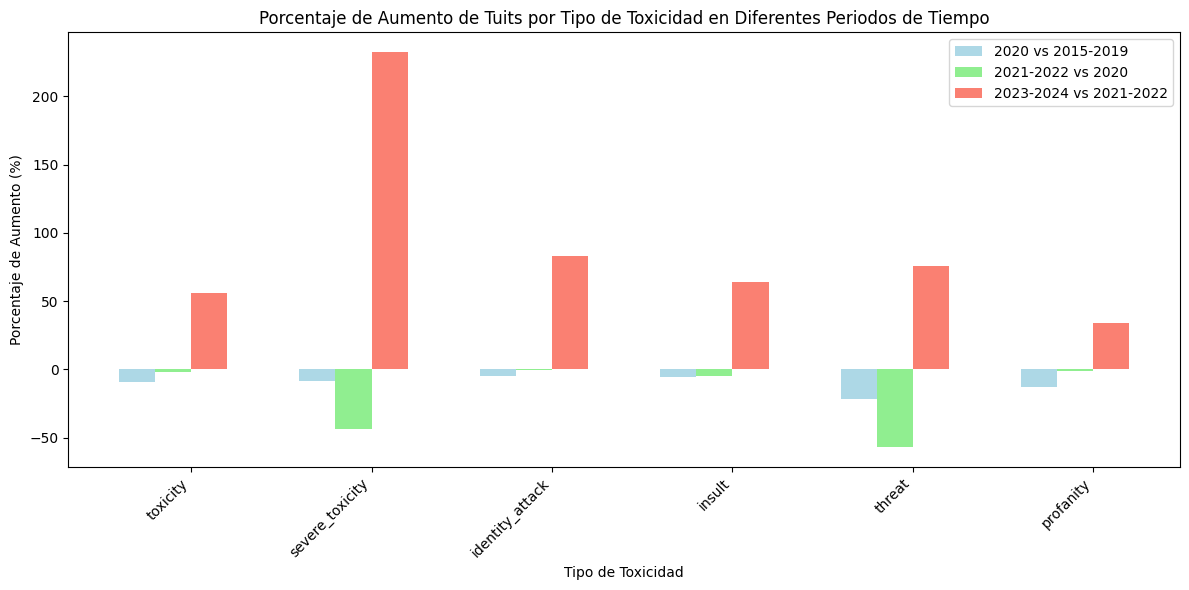

In [82]:
# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_t, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_t, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_t, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### Suma de megustas

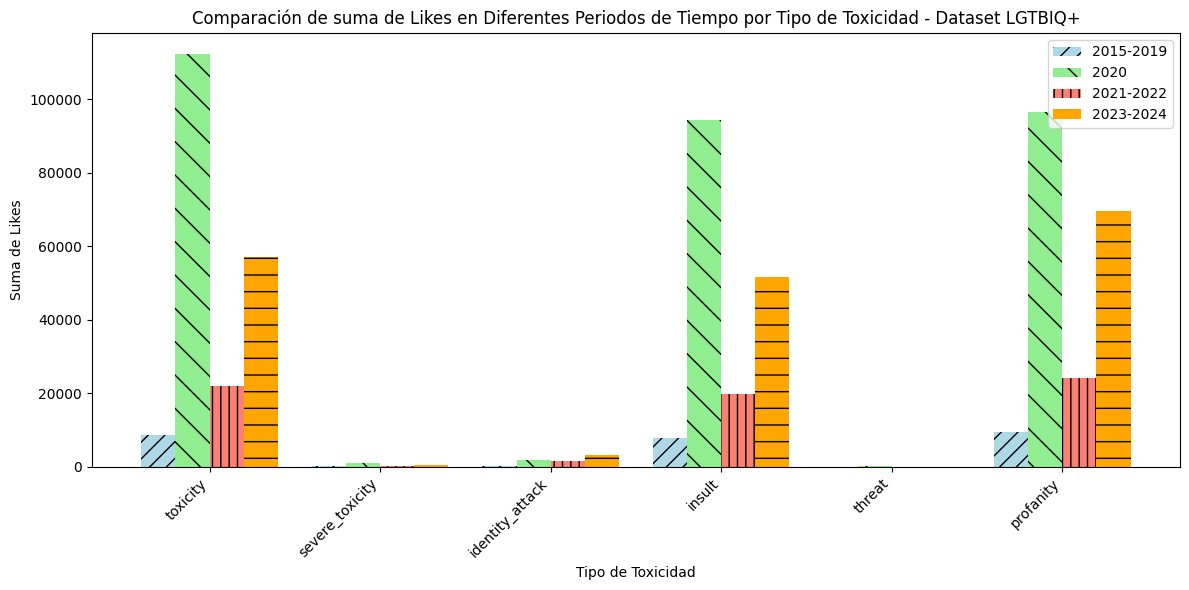

In [83]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s = []
mgs_2020_s = []
mgs_2021_2022_s = []
mgs_2023_2024_s = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s.append(df_2015_2019[column]['likeCount'].sum()/5)
    mgs_2020_s.append(df_2020[column]['likeCount'].sum())
    mgs_2021_2022_s.append(df_2021_2022[column]['likeCount'].sum()/2)
    mgs_2023_2024_s.append(df_2023_2024[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [84]:
# Calcular el aumento en los likes entre los diferentes periodos
aumento_2015_2019_vs_2020 = [(mgs_2020_s[i] - mgs_2015_2019_s[i]) / mgs_2015_2019_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022 = [(mgs_2021_2022_s[i] - mgs_2020_s[i]) / mgs_2020_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024 = [(mgs_2023_2024_s[i] - mgs_2021_2022_s[i]) / mgs_2021_2022_s[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de likes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020)

print("\nAumento de likes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022)

print("\nAumento de likes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024)

Aumento de likes entre 2015-2019 y 2020:
[1193.863788063618, 799.0147783251232, 604.1116005873715, 1082.3767927314593, 235.4898336414048, 920.6097173705938]

Aumento de likes entre 2020 y 2021-2022:
[-80.4289818463208, -66.57534246575342, -22.732012513034412, -79.1149355941532, -75.48209366391184, -74.79282699109078]

Aumento de likes entre 2021-2022 y 2023-2024:
[159.20194514509058, 10.92896174863388, 110.25641025641026, 161.53963105615244, 5.056179775280898, 186.13602699144172]


ahora lo mismo pero con los retuits

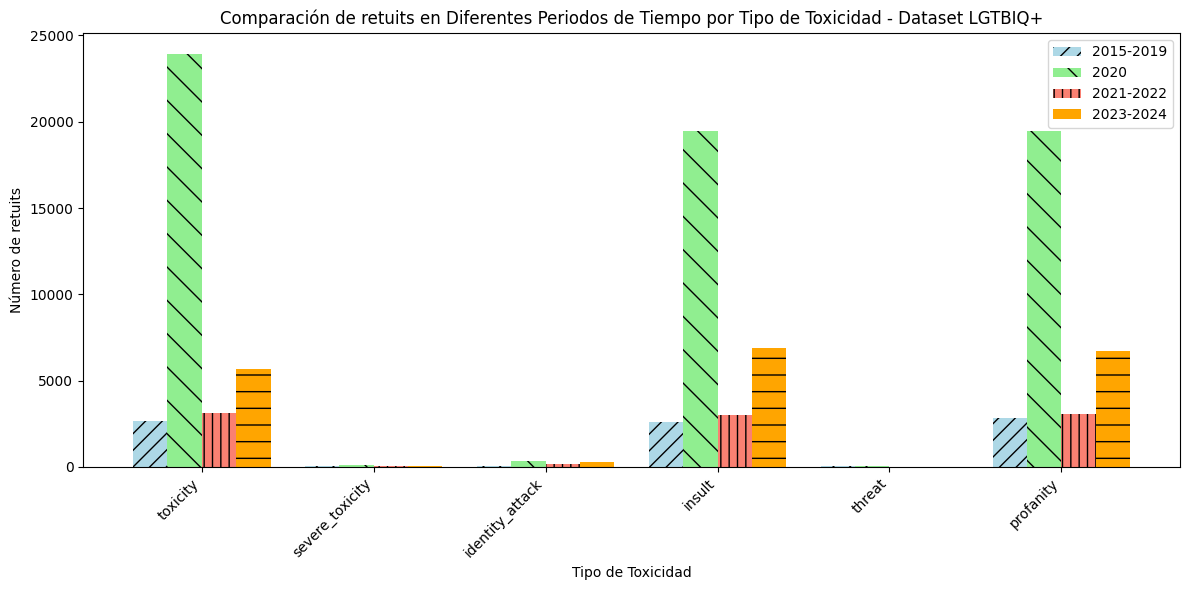

In [85]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s = []
rts_2020_s = []
rts_2021_2022_s = []
rts_2023_2024_s = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s.append(df_2015_2019[column]['retweetCount'].sum()/5)
    rts_2020_s.append(df_2020[column]['retweetCount'].sum())
    rts_2021_2022_s.append(df_2021_2022[column]['retweetCount'].sum()/2)
    rts_2023_2024_s.append(df_2023_2024[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [86]:
# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts = [(rts_2020_s[i] - rts_2015_2019_s[i]) / rts_2015_2019_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_rts = [(rts_2021_2022_s[i] - rts_2020_s[i]) / rts_2020_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_rts = [(rts_2023_2024_s[i] - rts_2021_2022_s[i]) / rts_2021_2022_s[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos de retuits
print("Aumento de retuits entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_rts)

print("\nAumento de retuits entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_rts)

print("\nAumento de retuits entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_rts)

Aumento de retuits entre 2015-2019 y 2020:
[807.2110286320253, 171.11111111111111, 451.72413793103453, 642.325901038485, 178.62595419847327, 590.8838993889441]

Aumento de retuits entre 2020 y 2021-2022:
[-86.89989145862904, -54.50819672131148, -49.00568181818182, -84.40312708944093, -87.67123287671232, -84.29834935979844]

Aumento de retuits entre 2021-2022 y 2023-2024:
[81.59655831739961, -4.504504504504505, 44.28969359331476, 127.25474031327289, -27.77777777777778, 120.2390699197642]


ahora para apoyo

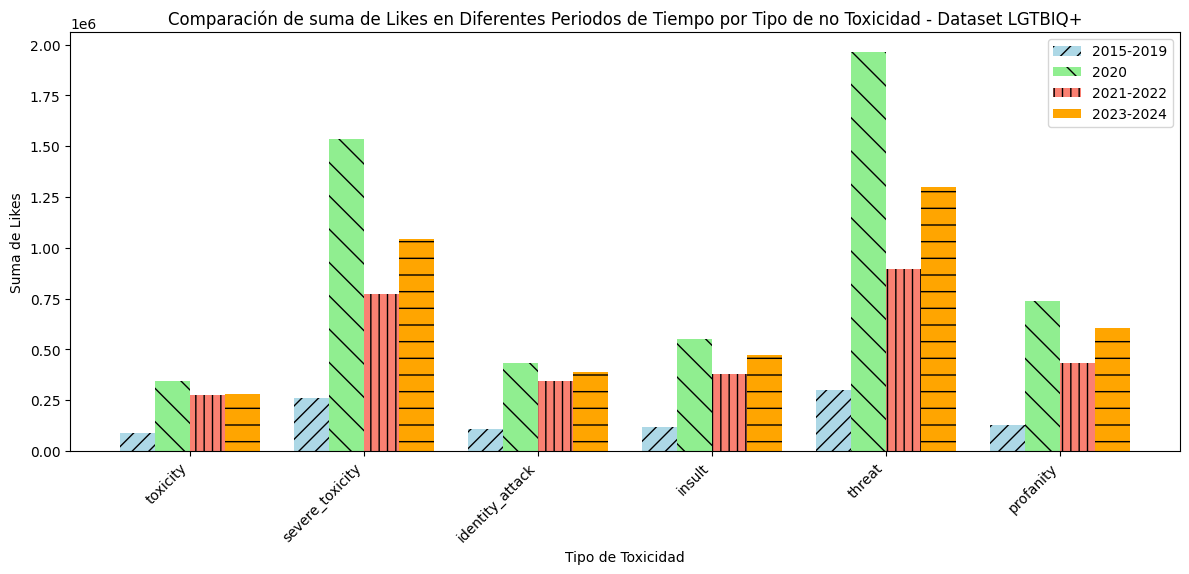

In [87]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s_apoyo = []
mgs_2020_s_apoyo = []
mgs_2021_2022_s_apoyo = []
mgs_2023_2024_s_apoyo = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s_apoyo.append(df_2015_2019_apoyo[column]['likeCount'].sum()/5)
    mgs_2020_s_apoyo.append(df_2020_apoyo[column]['likeCount'].sum())
    mgs_2021_2022_s_apoyo.append(df_2021_2022_apoyo[column]['likeCount'].sum()/2)
    mgs_2023_2024_s_apoyo.append(df_2023_2024_apoyo[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de no Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

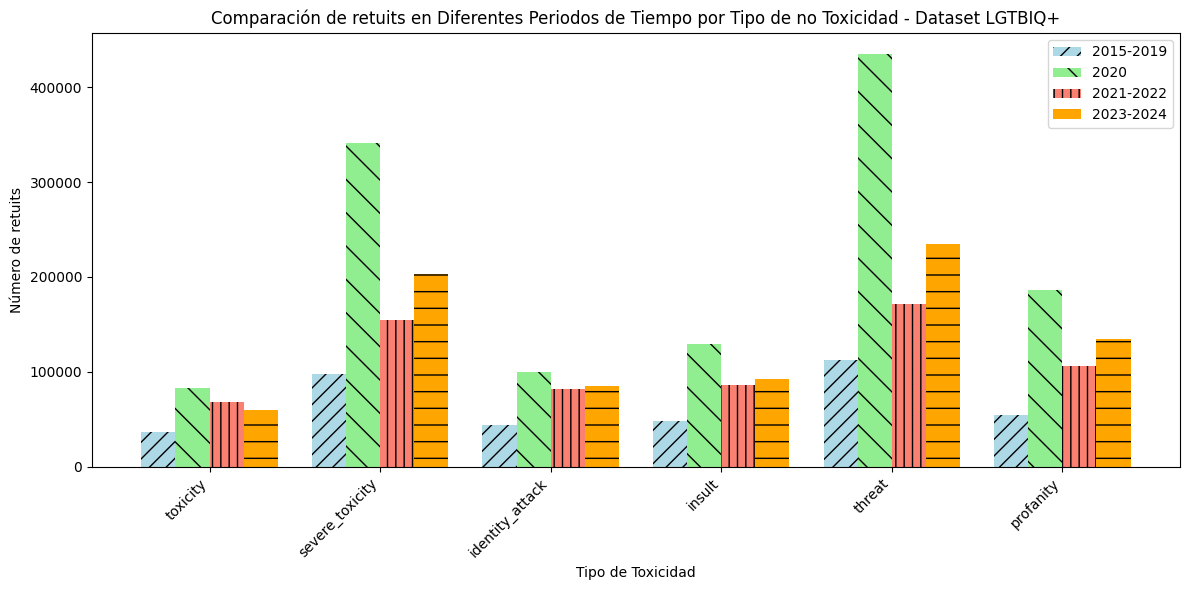

In [88]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s_apoyo = []
rts_2020_s_apoyo = []
rts_2021_2022_s_apoyo = []
rts_2023_2024_s_apoyo = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s_apoyo.append(df_2015_2019_apoyo[column]['retweetCount'].sum()/5)
    rts_2020_s_apoyo.append(df_2020_apoyo[column]['retweetCount'].sum())
    rts_2021_2022_s_apoyo.append(df_2021_2022_apoyo[column]['retweetCount'].sum()/2)
    rts_2023_2024_s_apoyo.append(df_2023_2024_apoyo[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de no Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Tóxico aleatorio

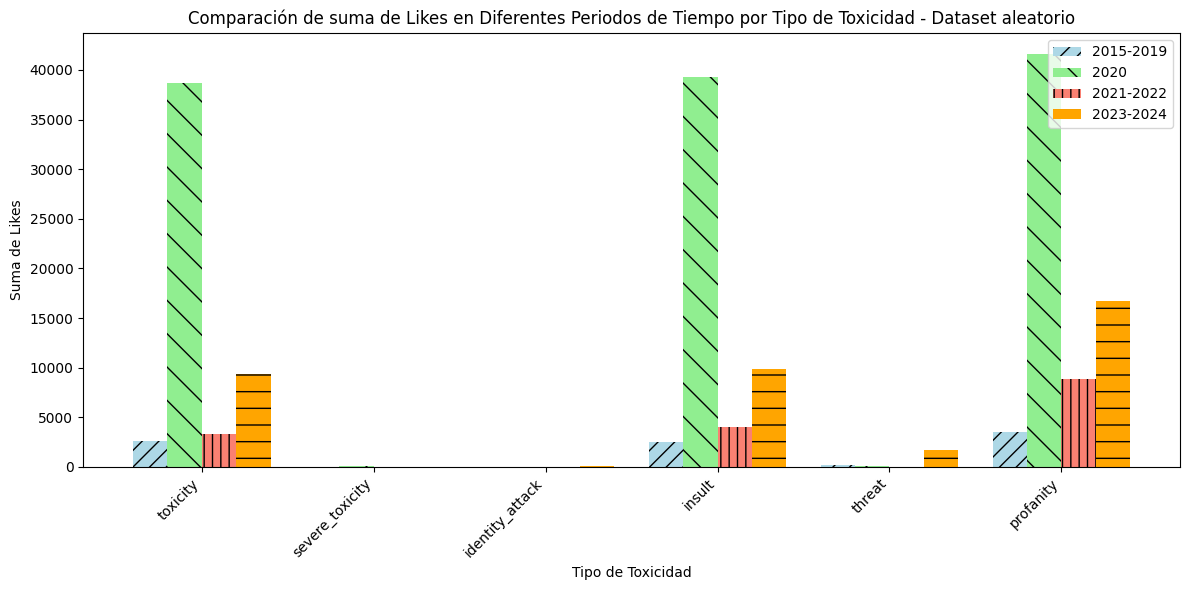

In [89]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s_toe = []
mgs_2020_s_toe = []
mgs_2021_2022_s_toe = []
mgs_2023_2024_s_toe = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s_toe.append(df_2015_2019_toe[column]['likeCount'].sum()/5)
    mgs_2020_s_toe.append(df_2020_toe[column]['likeCount'].sum())
    mgs_2021_2022_s_toe.append(df_2021_2022_toe[column]['likeCount'].sum()/2)
    mgs_2023_2024_s_toe.append(df_2023_2024_toe[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [90]:
# Calcular el aumento en los likes entre los diferentes periodos
aumento_2015_2019_vs_2020_toe = [(mgs_2020_s_toe[i] - mgs_2015_2019_s_toe[i]) / mgs_2015_2019_s_toe[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_toe = [(mgs_2021_2022_s_toe[i] - mgs_2020_s_toe[i]) / mgs_2020_s_toe[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_toe = [(mgs_2023_2024_s_toe[i] - mgs_2021_2022_s_toe[i]) / mgs_2021_2022_s_toe[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de likes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_toe)

print("\nAumento de likes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_toe)

print("\nAumento de likes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_toe)

Aumento de likes entre 2015-2019 y 2020:
[1386.0983102918588, 771.4285714285714, 12.5, 1464.671660822442, -56.403269754768395, 1071.6455696202531]

Aumento de likes entre 2020 y 2021-2022:
[-91.39490412941237, -68.85245901639344, 22.22222222222222, -89.83497593399036, -70.3125, -78.82814750792278]

Aumento de likes entre 2021-2022 y 2023-2024:
[180.64564564564566, 102.63157894736842, 540.9090909090909, 148.2775898784918, 5854.3859649122805, 89.07977547201905]


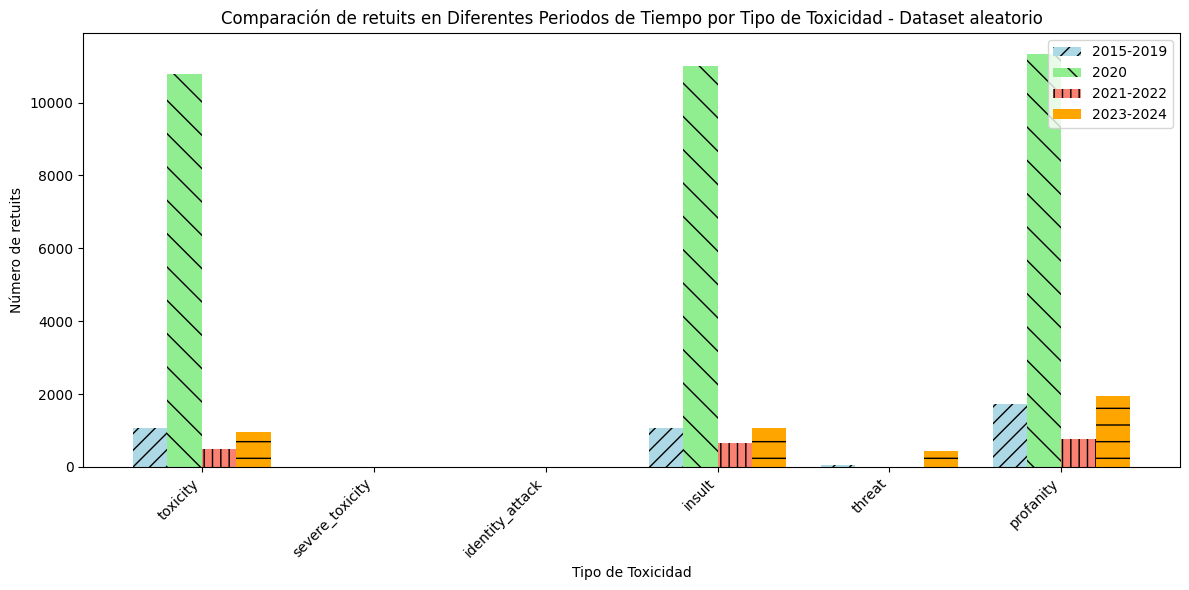

In [91]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s_toe = []
rts_2020_s_toe = []
rts_2021_2022_s_toe = []
rts_2023_2024_s_toe = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s_toe.append(df_2015_2019_toe[column]['retweetCount'].sum()/5)
    rts_2020_s_toe.append(df_2020_toe[column]['retweetCount'].sum())
    rts_2021_2022_s_toe.append(df_2021_2022_toe[column]['retweetCount'].sum()/2)
    rts_2023_2024_s_toe.append(df_2023_2024_toe[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset aleatorio')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [92]:
# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts_toe = [(rts_2020_s_toe[i] - rts_2015_2019_s_toe[i]) / rts_2015_2019_s_toe[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_rts_toe = [(rts_2021_2022_s_toe[i] - rts_2020_s_toe[i]) / rts_2020_s_toe[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_rts_toe = [(rts_2023_2024_s_toe[i] - rts_2021_2022_s_toe[i]) / rts_2021_2022_s_toe[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos de retuits
print("Aumento de retuits entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_rts_toe)

print("\nAumento de retuits entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_rts_toe)

print("\nAumento de retuits entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_rts_toe)

Aumento de retuits entre 2015-2019 y 2020:
[922.1927162367223, 233.33333333333334, -44.44444444444445, 921.5413184772515, -82.92682926829268, 558.961551864328]

Aumento de retuits entre 2020 y 2021-2022:
[-95.34236407496752, 0.0, 50.0, -94.01017996727867, -71.42857142857143, -93.36329984135378]

Aumento de retuits entre 2021-2022 y 2023-2024:
[90.0398406374502, -25.0, 633.3333333333333, 61.38088012139605, 21325.0, 158.5657370517928]


Dataset LGTBIQ+ en general

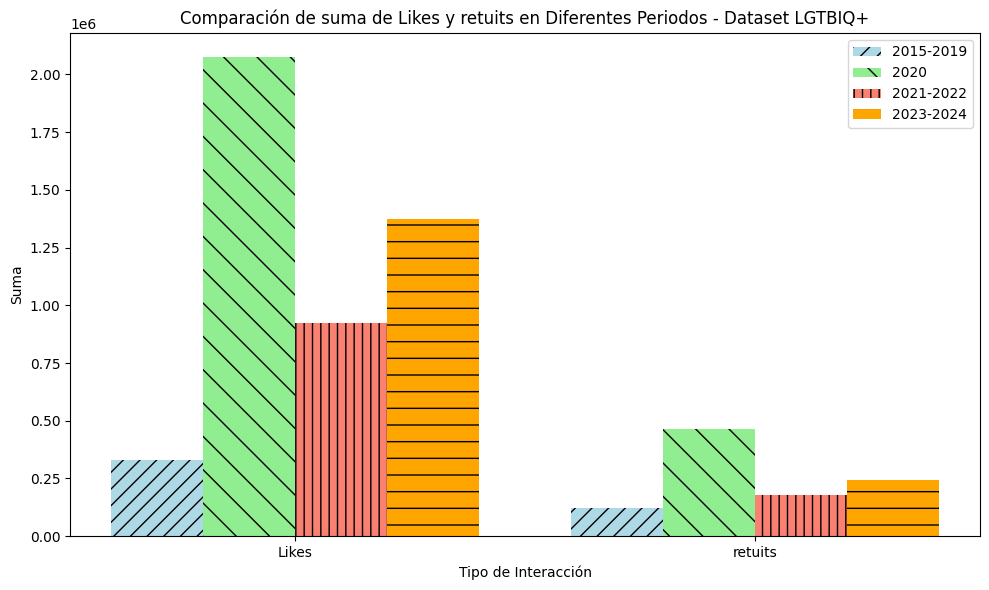

In [93]:
# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_o_sum = df_2015_2019_o['likeCount'].sum() / 5
mgs_2020_o_sum = df_2020_o['likeCount'].sum()
mgs_2021_2022_o_sum = df_2021_2022_o['likeCount'].sum() / 2
mgs_2023_2024_o_sum = df_2023_2024_o['likeCount'].sum() / 2

rts_2015_2019_o_sum = df_2015_2019_o['retweetCount'].sum() / 5
rts_2020_o_sum = df_2020_o['retweetCount'].sum() 
rts_2021_2022_o_sum = df_2021_2022_o['retweetCount'].sum() / 2
rts_2023_2024_o_sum = df_2023_2024_o['retweetCount'].sum() / 2

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o_sum, rts_2015_2019_o_sum], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_o_sum, rts_2020_o_sum], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_o_sum, rts_2021_2022_o_sum], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o_sum, rts_2023_2024_o_sum], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Suma')
ax2.set_title('Comparación de suma de Likes y retuits en Diferentes Periodos - Dataset LGTBIQ+')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()

In [94]:
aumento_2015_2019_vs_2020_likes = (mgs_2020_o_sum - mgs_2015_2019_o_sum) / mgs_2015_2019_o_sum * 100
aumento_2020_vs_2021_2022_likes = (mgs_2021_2022_o_sum - mgs_2020_o_sum) / mgs_2020_o_sum * 100
aumento_2021_2022_vs_2023_2024_likes = (mgs_2023_2024_o_sum - mgs_2021_2022_o_sum) / mgs_2021_2022_o_sum * 100

# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts = (rts_2020_o_sum - rts_2015_2019_o_sum) / rts_2015_2019_o_sum * 100
aumento_2020_vs_2021_2022_rts = (rts_2021_2022_o_sum - rts_2020_o_sum) / rts_2020_o_sum * 100
aumento_2021_2022_vs_2023_2024_rts = (rts_2023_2024_o_sum - rts_2021_2022_o_sum) / rts_2021_2022_o_sum * 100

# Imprimir los aumentos
print("Aumento de Likes entre 2015-2019 y 2020:")
print(f"{aumento_2015_2019_vs_2020_likes:.2f}%")

print("\nAumento de Likes entre 2020 y 2021-2022:")
print(f"{aumento_2020_vs_2021_2022_likes:.2f}%")

print("\nAumento de Likes entre 2021-2022 y 2023-2024:")
print(f"{aumento_2021_2022_vs_2023_2024_likes:.2f}%")

print("\nAumento de Retuits entre 2015-2019 y 2020:")
print(f"{aumento_2015_2019_vs_2020_rts:.2f}%")

print("\nAumento de Retuits entre 2020 y 2021-2022:")
print(f"{aumento_2020_vs_2021_2022_rts:.2f}%")

print("\nAumento de Retuits entre 2021-2022 y 2023-2024:")
print(f"{aumento_2021_2022_vs_2023_2024_rts:.2f}%")

Aumento de Likes entre 2015-2019 y 2020:
527.64%

Aumento de Likes entre 2020 y 2021-2022:
-55.59%

Aumento de Likes entre 2021-2022 y 2023-2024:
49.12%

Aumento de Retuits entre 2015-2019 y 2020:
273.69%

Aumento de Retuits entre 2020 y 2021-2022:
-61.96%

Aumento de Retuits entre 2021-2022 y 2023-2024:
38.66%


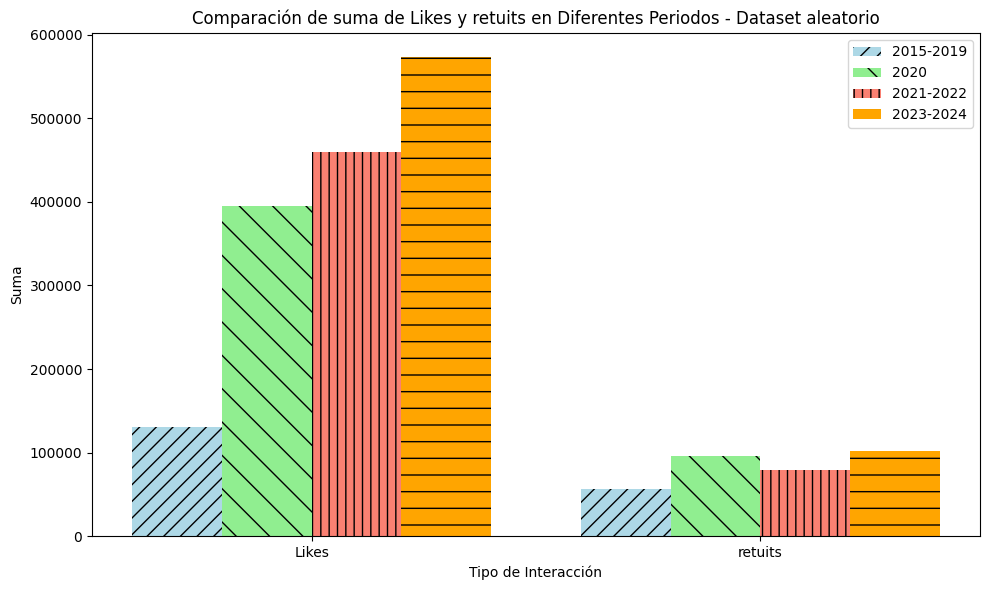

In [95]:
# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_e_sum = df_2015_2019_e['likeCount'].sum() / 5
mgs_2020_e_sum = df_2020_e['likeCount'].sum()
mgs_2021_2022_e_sum = df_2021_2022_e['likeCount'].sum() / 2
mgs_2023_2024_e_sum = df_2023_2024_e['likeCount'].sum() / 2

rts_2015_2019_e_sum = df_2015_2019_e['retweetCount'].sum() / 5
rts_2020_e_sum = df_2020_e['retweetCount'].sum() 
rts_2021_2022_e_sum = df_2021_2022_e['retweetCount'].sum() / 2
rts_2023_2024_e_sum = df_2023_2024_e['retweetCount'].sum() / 2

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_e_sum, rts_2015_2019_e_sum], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_e_sum, rts_2020_e_sum], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_e_sum, rts_2021_2022_e_sum], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_e_sum, rts_2023_2024_e_sum], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Suma')
ax2.set_title('Comparación de suma de Likes y retuits en Diferentes Periodos - Dataset aleatorio')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()

In [96]:
# Calcular el aumento en los likes entre los diferentes periodos
aumento_2015_2019_vs_2020_likes_e = (mgs_2020_e_sum - mgs_2015_2019_e_sum) / mgs_2015_2019_e_sum * 100
aumento_2020_vs_2021_2022_likes_e = (mgs_2021_2022_e_sum - mgs_2020_e_sum) / mgs_2020_e_sum * 100
aumento_2021_2022_vs_2023_2024_likes_e = (mgs_2023_2024_e_sum - mgs_2021_2022_e_sum) / mgs_2021_2022_e_sum * 100

# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts_e = (rts_2020_e_sum - rts_2015_2019_e_sum) / rts_2015_2019_e_sum * 100
aumento_2020_vs_2021_2022_rts_e = (rts_2021_2022_e_sum - rts_2020_e_sum) / rts_2020_e_sum * 100
aumento_2021_2022_vs_2023_2024_rts_e = (rts_2023_2024_e_sum - rts_2021_2022_e_sum) / rts_2021_2022_e_sum * 100

# Imprimir los aumentos de likes y retuits
print("Aumento de Likes entre 2015-2019 y 2020 (Dataset aleatorio):")
print(f"{aumento_2015_2019_vs_2020_likes_e:.2f}%")

print("\nAumento de Likes entre 2020 y 2021-2022 (Dataset aleatorio):")
print(f"{aumento_2020_vs_2021_2022_likes_e:.2f}%")

print("\nAumento de Likes entre 2021-2022 y 2023-2024 (Dataset aleatorio):")
print(f"{aumento_2021_2022_vs_2023_2024_likes_e:.2f}%")

print("\nAumento de Retuits entre 2015-2019 y 2020 (Dataset aleatorio):")
print(f"{aumento_2015_2019_vs_2020_rts_e:.2f}%")

print("\nAumento de Retuits entre 2020 y 2021-2022 (Dataset aleatorio):")
print(f"{aumento_2020_vs_2021_2022_rts_e:.2f}%")

print("\nAumento de Retuits entre 2021-2022 y 2023-2024 (Dataset aleatorio):")
print(f"{aumento_2021_2022_vs_2023_2024_rts_e:.2f}%")

Aumento de Likes entre 2015-2019 y 2020 (Dataset aleatorio):
203.22%

Aumento de Likes entre 2020 y 2021-2022 (Dataset aleatorio):
16.42%

Aumento de Likes entre 2021-2022 y 2023-2024 (Dataset aleatorio):
24.76%

Aumento de Retuits entre 2015-2019 y 2020 (Dataset aleatorio):
69.97%

Aumento de Retuits entre 2020 y 2021-2022 (Dataset aleatorio):
-17.21%

Aumento de Retuits entre 2021-2022 y 2023-2024 (Dataset aleatorio):
29.47%


# datos verificados azules

atributos toxicidad

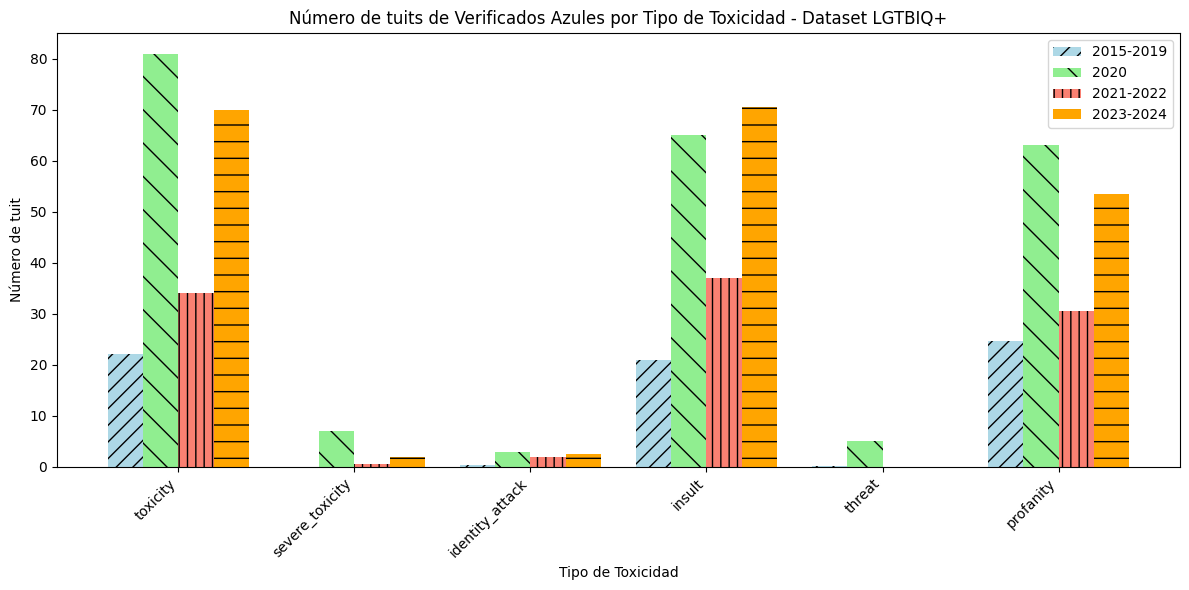

In [97]:
# Inicializar listas para almacenar el número de tuits por periodo
tuit_2015_2019 = []
tuit_2020 = []
tuit_2021_2022 = []
tuit_2023_2024 = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Contar los tuit para cada columna en los dataframes de los diferentes periodos
    tuit_2015_2019.append(df_2015_2019[column][df_2015_2019[column]['author_blue_verified'] == True].shape[0] / 5)
    tuit_2020.append(df_2020[column][df_2020[column]['author_blue_verified'] == True].shape[0])
    tuit_2021_2022.append(df_2021_2022[column][df_2021_2022[column]['author_blue_verified'] == True].shape[0] / 2)
    tuit_2023_2024.append(df_2023_2024[column][df_2023_2024[column]['author_blue_verified'] == True].shape[0] / 2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para tuit
rects1 = ax.bar(x - width*1.5, tuit_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, tuit_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, tuit_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, tuit_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuit')
ax.set_title('Número de tuits de Verificados Azules por Tipo de Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [98]:
tuits_por_año = df_filtered_toxicity[df_filtered_toxicity['author_blue_verified'] == True].groupby('year').size()

In [99]:
tuits_por_año[2015]

21

In [100]:
# Agrupar los datos por año
tuits_por_año_blue_toxicos = df_filtered_toxicity[df_filtered_toxicity['author_blue_verified'] == True].groupby('year').size()

# Crear las listas para la prueba de Kruskal-Wallis
data_for_kruskal = [
    [tuits_por_año_blue_toxicos[2015], tuits_por_año_blue_toxicos[2016], tuits_por_año_blue_toxicos[2017], tuits_por_año_blue_toxicos[2018], tuits_por_año_blue_toxicos[2019]],  # 2015-2019
    [tuits_por_año_blue_toxicos[2020]],  # 2020
    [tuits_por_año_blue_toxicos[2021], tuits_por_año_blue_toxicos[2022]],  # 2021-2022
    [tuits_por_año_blue_toxicos[2023], tuits_por_año_blue_toxicos[2024]]  # 2023-2024
]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")



Estadística H: 7.317987804878049
Valor p: 0.062424252072474144
No hay diferencias significativas entre los periodos en términos de toxicidad.


apoyo

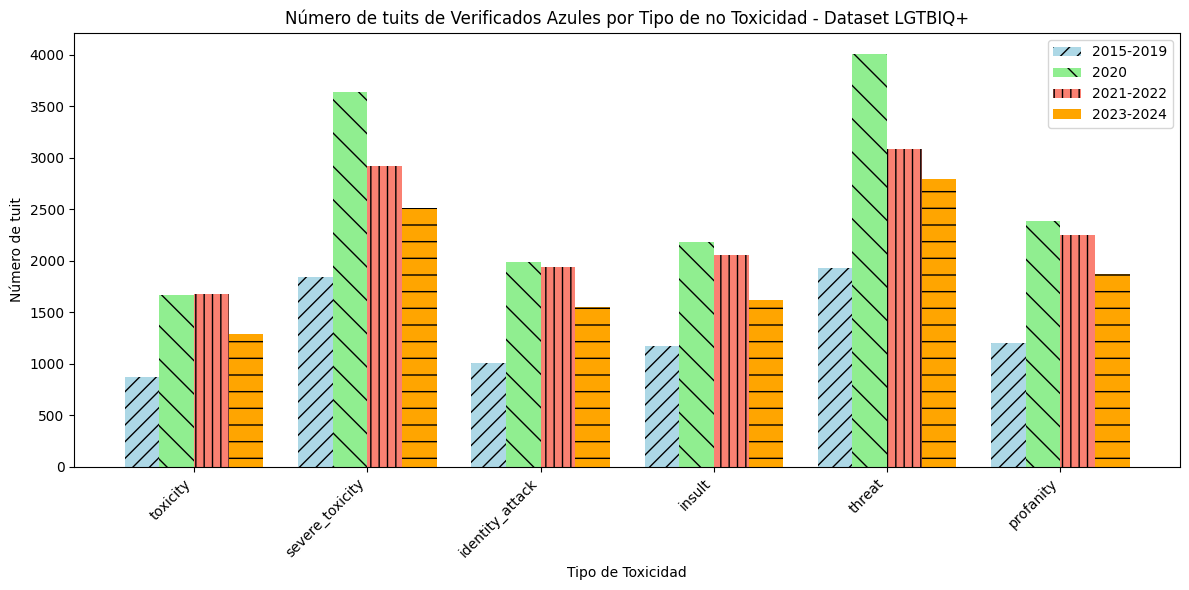

In [101]:
# Inicializar listas para almacenar el número de tuit por periodo
tuit_2015_2019_apoyo = []
tuit_2020_apoyo = []
tuit_2021_2022_apoyo = []
tuit_2023_2024_apoyo = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Contar los tuit para cada columna en los dataframes de los diferentes periodos
    tuit_2015_2019_apoyo.append(df_2015_2019_apoyo[column][df_2015_2019_apoyo[column]['author_blue_verified'] == True].shape[0] / 5)
    tuit_2020_apoyo.append(df_2020_apoyo[column][df_2020_apoyo[column]['author_blue_verified'] == True].shape[0])
    tuit_2021_2022_apoyo.append(df_2021_2022_apoyo[column][df_2021_2022_apoyo[column]['author_blue_verified'] == True].shape[0] / 2)
    tuit_2023_2024_apoyo.append(df_2023_2024_apoyo[column][df_2023_2024_apoyo[column]['author_blue_verified'] == True].shape[0] / 2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para tuit
rects1 = ax.bar(x - width*1.5, tuit_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, tuit_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, tuit_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, tuit_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuit')
ax.set_title('Número de tuits de Verificados Azules por Tipo de no Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [102]:
# Agrupar los datos por año
tuits_por_año_blue_apoyo = df_filtered_apoyo['toxicity'][df_filtered_apoyo['toxicity']['author_blue_verified'] == True].groupby('year').size()


colectivo y aleatorio comparacion

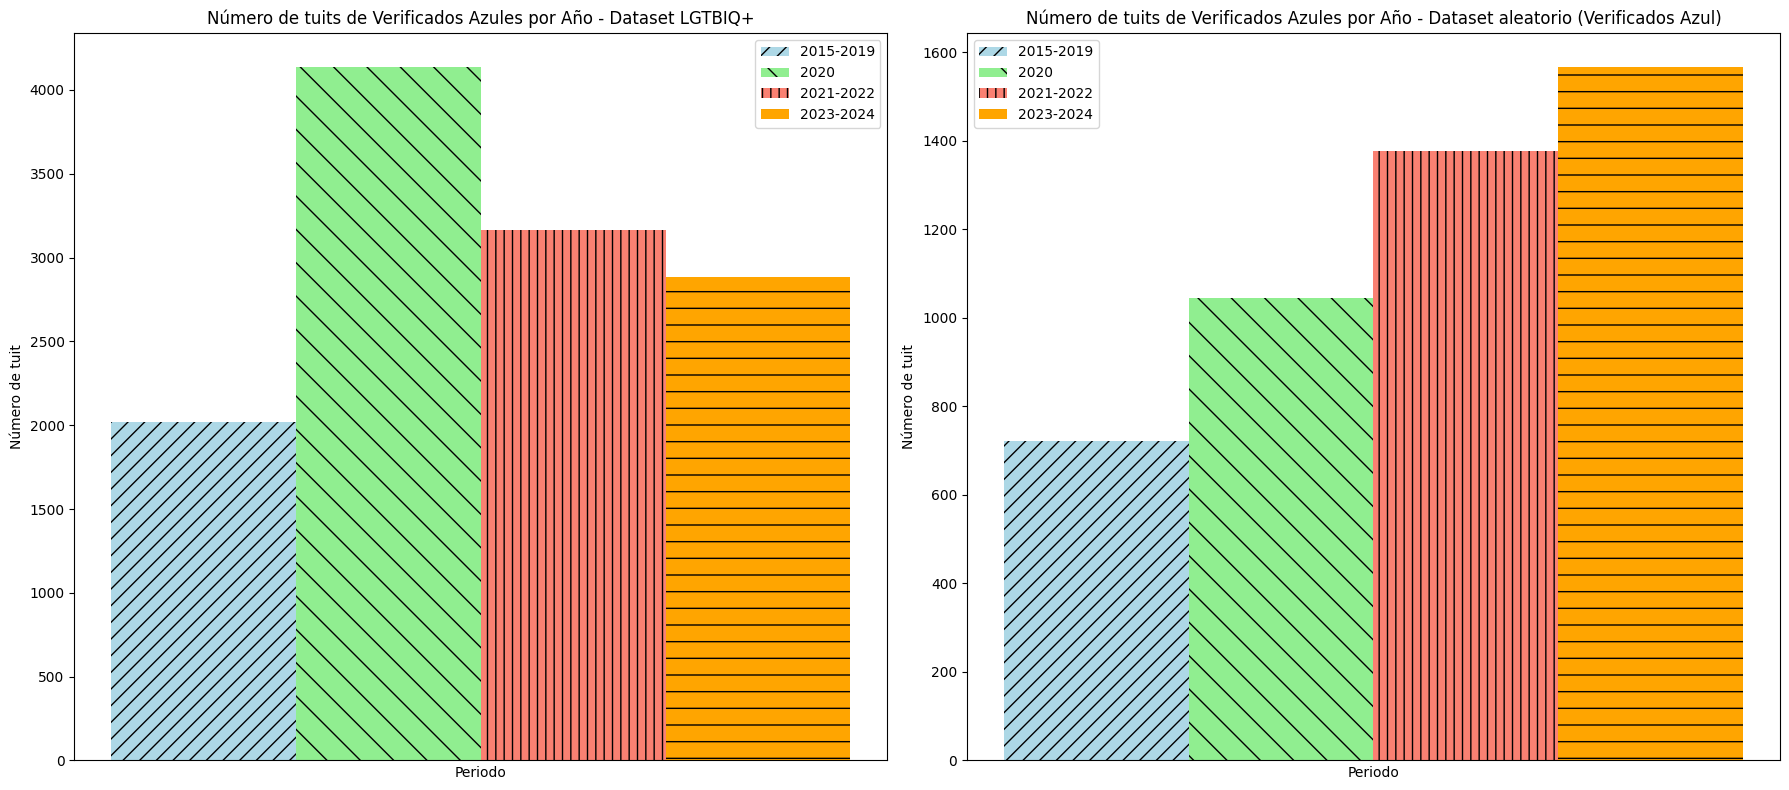

In [103]:
# Filtrar los tuit con verificación azul para los diferentes periodos de tiempo (pre y post Musk)
tuit_per_year_blue_2015_2019_o = df_2015_2019_o[df_2015_2019_o['author_blue_verified'] == True].shape[0] / 5
tuit_per_year_blue_2020_o = df_2020_o[df_2020_o['author_blue_verified'] == True].shape[0]
tuit_per_year_blue_2021_2022_o = df_2021_2022_o[df_2021_2022_o['author_blue_verified'] == True].shape[0] / 2
tuit_per_year_blue_2023_2024_o = df_2023_2024_o[df_2023_2024_o['author_blue_verified'] == True].shape[0] / 2

# Filtrar los tuit con verificación azul para df_aleatorio
tuit_per_year_blue_2015_2019_e = df_2015_2019_e[df_2015_2019_e['author_blue_verified'] == True].shape[0] / 5
tuit_per_year_blue_2020_e = df_2020_e[df_2020_e['author_blue_verified'] == True].shape[0] 
tuit_per_year_blue_2021_2022_e = df_2021_2022_e[df_2021_2022_e['author_blue_verified'] == True].shape[0] / 2
tuit_per_year_blue_2023_2024_e = df_2023_2024_e[df_2023_2024_e['author_blue_verified'] == True].shape[0] / 2

# Crear la figura comparativa con 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
x = np.arange(1)

# Graficar para df_orgullo (primer gráfico en la posición 1) - pre vs post Musk
axes[0].bar(x - 0.2, tuit_per_year_blue_2015_2019_o, width=0.4, label='2015-2019', color='lightblue', hatch='//')
axes[0].bar(x + 0.2, tuit_per_year_blue_2020_o, width=0.4, label='2020', color='lightgreen', hatch='\\')
axes[0].bar(x + 0.6, tuit_per_year_blue_2021_2022_o, width=0.4, label='2021-2022', color='salmon', hatch='||')
axes[0].bar(x + 1.0, tuit_per_year_blue_2023_2024_o, width=0.4, label='2023-2024', color='orange', hatch='-')
axes[0].set_title('Número de tuits de Verificados Azules por Año - Dataset LGTBIQ+')
axes[0].set_xlabel('Periodo')
axes[0].set_ylabel('Número de tuit')
axes[0].set_xticks([])  # Ocultar ticks en el eje x
axes[0].legend()

# Graficar para df_aleatorio (segundo gráfico en la posición 2) - pre vs post Musk
axes[1].bar(x - 0.2, tuit_per_year_blue_2015_2019_e, width=0.4, label='2015-2019', color='lightblue', hatch='//')
axes[1].bar(x + 0.2, tuit_per_year_blue_2020_e, width=0.4, label='2020', color='lightgreen', hatch='\\')
axes[1].bar(x + 0.6, tuit_per_year_blue_2021_2022_e, width=0.4, label='2021-2022', color='salmon', hatch='||')
axes[1].bar(x + 1.0, tuit_per_year_blue_2023_2024_e, width=0.4, label='2023-2024', color='orange', hatch='-')
axes[1].set_title('Número de tuits de Verificados Azules por Año - Dataset aleatorio (Verificados Azul)')
axes[1].set_xlabel('Periodo')
axes[1].set_ylabel('Número de tuit')
axes[1].set_xticks([])  # Ocultar ticks en el eje x
axes[1].legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

In [104]:
# Agrupar los datos por año
tuits_por_año_blue_o = df_orgullo[df_orgullo['author_blue_verified'] == True].groupby('year').size()

In [105]:
# Agrupar los datos por año
tuits_por_año_blue_e = df_aleatorio[df_aleatorio['author_blue_verified'] == True].groupby('year').size()

# Crear las listas para la prueba de Kruskal-Wallis
data_for_kruskal = [
    [tuits_por_año_blue_e[2015], tuits_por_año_blue_e[2016], tuits_por_año_blue_e[2017], tuits_por_año_blue_e[2018], tuits_por_año_blue_e[2019]],  # 2015-2019
    [tuits_por_año_blue_e[2020]],  # 2020
    [tuits_por_año_blue_e[2021], tuits_por_año_blue_e[2022]],  # 2021-2022
    [tuits_por_año_blue_e[2023], tuits_por_año_blue_e[2024]]  # 2023-2024
]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")



Estadística H: 7.799999999999997
Valor p: 0.05033109785985342
No hay diferencias significativas entre los periodos en términos de toxicidad.


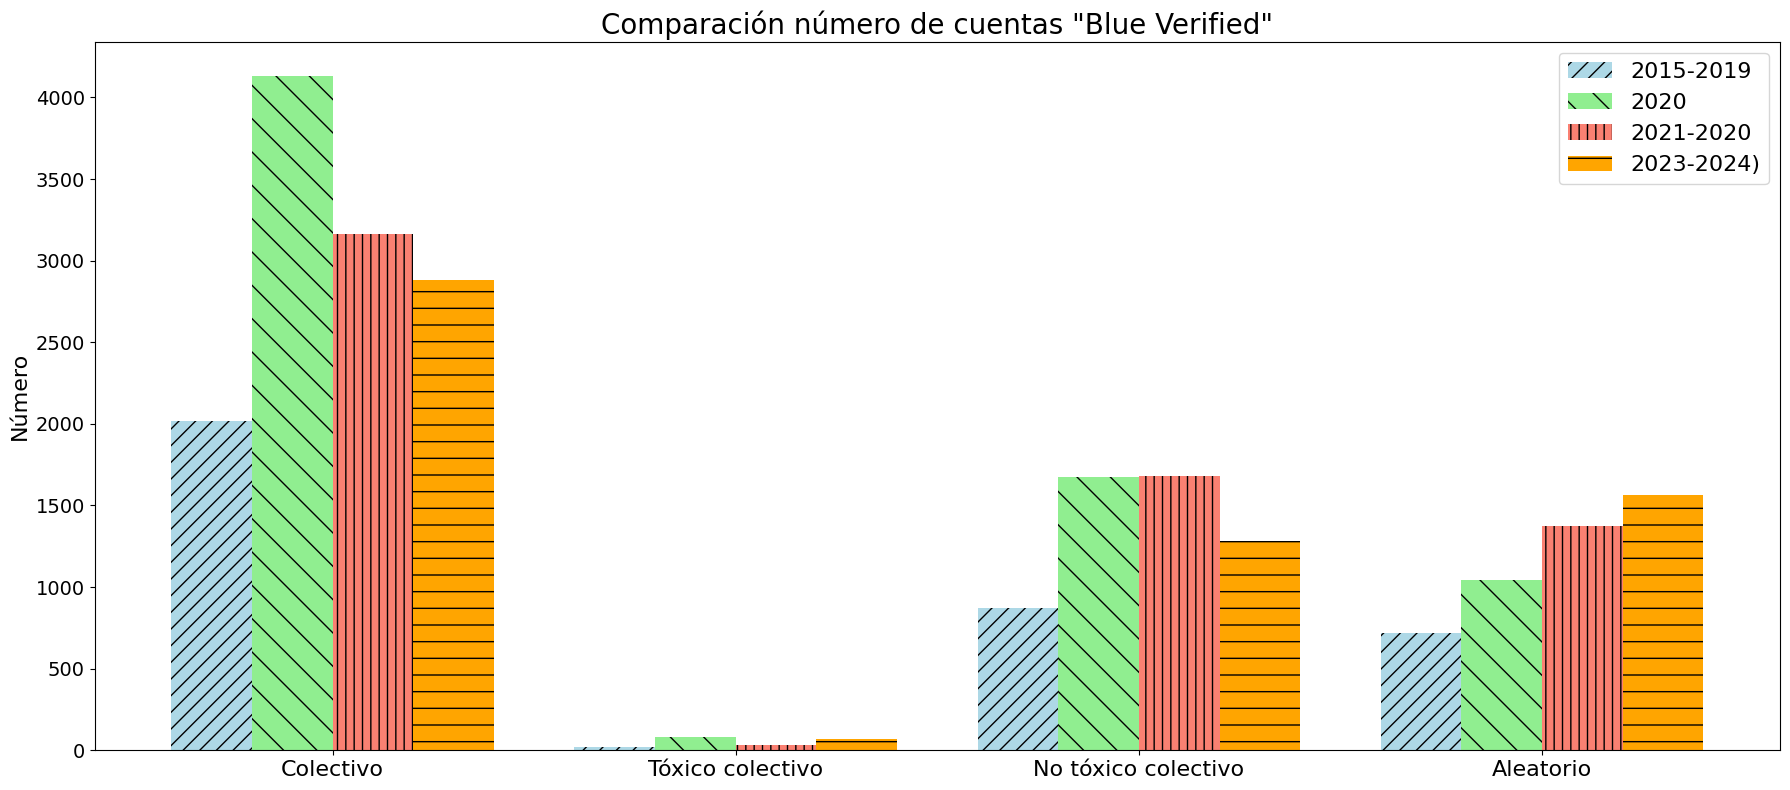

In [106]:
# Crear la figura para la comparación de likes y retuits
fig2, ax2 = plt.subplots(figsize=(18, 8))

x2 = np.arange(4)  # Dos barras para Likes y Retuits

# Crear las barras para cada grupo de años para likes y retuits (Dataset LGTBIQ+)
rects9 = ax2.bar(x2 - width*1.5, [tuit_per_year_blue_2015_2019_o, tuit_2015_2019[0], tuit_2015_2019_apoyo[0], tuit_per_year_blue_2015_2019_e], width, label='2015-2019', color='lightblue', hatch='//')
rects10 = ax2.bar(x2 - width/2, [tuit_per_year_blue_2020_o, tuit_2020[0], tuit_2020_apoyo[0], tuit_per_year_blue_2020_e], width, label='2020', color='lightgreen', hatch='\\')
rects11 = ax2.bar(x2 + width/2, [tuit_per_year_blue_2021_2022_o, tuit_2021_2022[0], tuit_2021_2022_apoyo[0], tuit_per_year_blue_2021_2022_e], width, label='2021-2020', color='salmon', hatch='||')
rects12 = ax2.bar(x2 + width*1.5, [tuit_per_year_blue_2023_2024_o, tuit_2023_2024[0], tuit_2023_2024_apoyo[0], tuit_per_year_blue_2023_2024_e], width, label='2023-2024)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de likes y retuits
ax2.set_xlabel(None)
ax2.set_ylabel('Número', fontsize=16)
ax2.set_title('Comparación número de cuentas "Blue Verified"', fontsize=20)
ax2.set_xticks(x2)
ax2.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax2.set_xticklabels(['Colectivo', 'Tóxico colectivo', 'No tóxico colectivo', 'Aleatorio'], fontsize=16)
ax2.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()

In [107]:
# Cálculo del aumento en el número de tuits (datos 'o')
aumento_2020_vs_2015_2019_tuits_o = calcular_aumento(tuit_per_year_blue_2015_2019_o, tuit_per_year_blue_2020_o)
aumento_2021_2022_vs_2020_tuits_o = calcular_aumento(tuit_per_year_blue_2020_o, tuit_per_year_blue_2021_2022_o)
aumento_2023_2024_vs_2021_2022_tuits_o = calcular_aumento(tuit_per_year_blue_2021_2022_o, tuit_per_year_blue_2023_2024_o)

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits = calcular_aumento(tuit_2015_2019[0], tuit_2020[0])
aumento_2021_2022_vs_2020_tuits = calcular_aumento(tuit_2020[0], tuit_2021_2022[0])
aumento_2023_2024_vs_2021_2022_tuits = calcular_aumento(tuit_2021_2022[0], tuit_2023_2024[0])

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_apoyo = calcular_aumento(tuit_2015_2019_apoyo[0], tuit_2020_apoyo[0])
aumento_2021_2022_vs_2020_tuits_apoyo = calcular_aumento(tuit_2020_apoyo[0], tuit_2021_2022_apoyo[0])
aumento_2023_2024_vs_2021_2022_tuits_apoyo = calcular_aumento(tuit_2021_2022_apoyo[0], tuit_2023_2024_apoyo[0])

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_e = calcular_aumento(tuit_per_year_blue_2015_2019_e, tuit_per_year_blue_2020_e)
aumento_2021_2022_vs_2020_tuits_e = calcular_aumento(tuit_per_year_blue_2020_e, tuit_per_year_blue_2021_2022_e)
aumento_2023_2024_vs_2021_2022_tuits_e = calcular_aumento(tuit_per_year_blue_2021_2022_e, tuit_per_year_blue_2023_2024_e)

In [108]:
# Imprimir los porcentajes de aumento
print("Porcentaje de aumento de Blue Verified - Dataset LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_o:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_o:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_o:.2f}%")

print("\nPorcentaje de aumento de Blue Verified - Dataset Tóxico LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits:.2f}%")

print("\nPorcentaje de aumento de Blue Verified - Dataset No Tóxico LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_apoyo:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_apoyo:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_apoyo:.2f}%")

print("\nPorcentaje de aumento de Blue Verified - Dataset aleatorio:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_e:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_e:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_e:.2f}%")

Porcentaje de aumento de Blue Verified - Dataset LGTBIQ+:
2020 vs 2015-2019: 104.82%
2021-2022 vs 2020: -23.42%
2023-2024 vs 2021-2022: -8.99%

Porcentaje de aumento de Blue Verified - Dataset Tóxico LGTBIQ+:
2020 vs 2015-2019: 264.86%
2021-2022 vs 2020: -58.02%
2023-2024 vs 2021-2022: 105.88%

Porcentaje de aumento de Blue Verified - Dataset No Tóxico LGTBIQ+:
2020 vs 2015-2019: 91.61%
2021-2022 vs 2020: 0.48%
2023-2024 vs 2021-2022: -23.51%

Porcentaje de aumento de Blue Verified - Dataset aleatorio:
2020 vs 2015-2019: 44.82%
2021-2022 vs 2020: 31.77%
2023-2024 vs 2021-2022: 13.73%
